In [101]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [102]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\hWFH_COMBINE.csv',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [103]:
df.head(20)

created_at                                               text  \
0   30-01-2022 09:08  b'Giveaway of the Day : PDF Mixer Pro 1.4.1 ht...   
1   30-01-2022 09:04  b'#Russia #HomeOffice UK urged to suspend \xe2...   
2   30-01-2022 09:00  b'Have you tried adding greenery to your desk?...   
3   30-01-2022 08:49  b'Calls for UK to suspend \xe2\x80\x98golden v...   
4   30-01-2022 08:40  b'NBR Yoga Set 7 Pcs\n\xe2\x9e\xa2\xe2\x9e\xa2...   
5   30-01-2022 08:30  b'my #etsy shop: #Antique #Numbering #Machines...   
6   30-01-2022 08:10  b'Choose The Best Folding Desks Design Ideas F...   
7   30-01-2022 07:58  b'Adjustable Folding Laptop Stand\n\n$ 29.99\n...   
8   30-01-2022 07:50  b'Chair ELLY \n \n#moderndesign #OfficeSpace #...   
9   30-01-2022 07:47  b'\xf0\x9f\x92\xbc  HURRY! - 25% OFF Lazada Ho...   
10  30-01-2022 05:50  b'Chair ELLY - MS8101\n \n#moderndesign #Offic...   
11  30-01-2022 05:25  b'#DeuxMontagnes #BakerLake #California, This ...   
12  30-01-2022 04:25  b'#BiancoAris\nFasa Stone build a natural, foc...   
13  30-01-2022 03:57  b'Handcrafted Office sign antiqued distressed ...   
14  30-01-2022 03:06  b'My #Twister movie posters hung in my home of...   
15  30-01-2022 02:44  b'Chair ELLY - MS8101\n \n#moderndesign #Offic...   
16  30-01-2022 01:33  b'Hardworking Dining Rooms https://t.co/WxOL8T...   
17  30-01-2022 00:22  b'Get my art printed on awesome products. Supp...   
18  30-01-2022 00:02  b'#Daschunds in a nutshell\n#dog #homeoffice h...   
19  29-01-2022 23:18  b'Four inter-link #hearts, represents #love an...   

           screen_name                     location  
0          b'KostNixx'                          b''  
1    b'videoactualize'  b'Somerset, United Kingdom'  
2        b'FlexispotU'           b'London, England'  
3   b'UKVisaBarrister'                b'London, UK'  
4    b'make_home_cozy'                          b''  
5     b'bleakhouse302'             b'Delaware, USA'  
6        b'KreateCube'                     b'India'  
7    b'Zubair_Mukadam'                          b''  
8     b'Officechairs6'                          b''  
9       b'TipidNation'               b'Philippines'  
10          b'addy_fu'                          b''  
11      b'PengNewWest'           b'New Westminster'  
12        b'FasaStone'                     b'china'  
13     b'BusterJustis'                b'California'  
14     b'JDHuffmanHWS'      b'Charlotte-Metro Area'  
15    b'Officechairs6'                          b''  
16     b'RoryClipsham'                 b'BC Canada'  
17    b'PawsInProfile'                          b''  
18     b'MedussaSolar'                          b''  
19    b'HectorCantres'                       b'USA'

In [104]:
df.shape

(6719, 4)

In [105]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [106]:
df.head(30)

created_at                                               text  \
0   30-01-2022 09:08  b giveaway of the day   pdf mixer pro     via ...   
1   30-01-2022 09:04  b  russia  homeoffice uk urged to suspend  xe ...   
2   30-01-2022 09:00  b have you tried adding greenery to your desk ...   
3   30-01-2022 08:49  b calls for uk to suspend  xe x xgolden visas ...   
4   30-01-2022 08:40  b nbr yoga set  pcs n xe xe xa xe xe xa xe xe ...   
5   30-01-2022 08:30  b my  etsy shop   antique  numbering  machines...   
6   30-01-2022 08:10  b choose the best folding desks design ideas f...   
7   30-01-2022 07:58  b adjustable folding laptop stand n n    n n s...   
8   30-01-2022 07:50  b chair elly  n  n moderndesign  officespace  ...   
9   30-01-2022 07:47  b  xf xf x xbc  hurry      off lazada home off...   
10  30-01-2022 05:50  b chair elly   ms n  n moderndesign  officespa...   
11  30-01-2022 05:25  b  deuxmontagnes  bakerlake  california  this ...   
12  30-01-2022 04:25  b  biancoaris nfasa stone build a natural  foc...   
13  30-01-2022 03:57  b handcrafted office sign antiqued distressed ...   
14  30-01-2022 03:06  b my  twister movie posters hung in my home of...   
15  30-01-2022 02:44  b chair elly   ms n  n moderndesign  officespa...   
16  30-01-2022 01:33  b hardworking dining rooms  serve as an agalle...   
17  30-01-2022 00:22  b get my aprinted on awesome products  suppome...   
18  30-01-2022 00:02       b  daschunds in a nutshell n dog  homeoffice   
19  29-01-2022 23:18  b four inter link  hearts  represents  love an...   
20  29-01-2022 23:10  b woman tattooed with  xe x xthe garden of ear...   
21  29-01-2022 22:40  b my office is slowly but surely getting there...   
22  29-01-2022 22:30  b what s on your list for the perfect  homeoff...   
23  29-01-2022 22:05  b  cedarpark  texas  california  this might be...   
24  29-01-2022 22:04  b perpetual    every year     gifts  school  o...   
25  29-01-2022 22:02  b almost  years  workingfromhome with  adsrepa...   
26  29-01-2022 22:00  b a home office space that keeps you focused  ...   
27  29-01-2022 21:55  b would you like to call this your home office...   
28  29-01-2022 21:47  b   off squishy kawaii animals zodiac gel pen ...   
29  29-01-2022 21:43  b what s your favorite standing desk option   ...   

           screen_name                               location  
0          b'KostNixx'                                    b''  
1    b'videoactualize'            b'Somerset, United Kingdom'  
2        b'FlexispotU'                     b'London, England'  
3   b'UKVisaBarrister'                          b'London, UK'  
4    b'make_home_cozy'                                    b''  
5     b'bleakhouse302'                       b'Delaware, USA'  
6        b'KreateCube'                               b'India'  
7    b'Zubair_Mukadam'                                    b''  
8     b'Officechairs6'                                    b''  
9       b'TipidNation'                         b'Philippines'  
10          b'addy_fu'                                    b''  
11      b'PengNewWest'                     b'New Westminster'  
12        b'FasaStone'                               b'china'  
13     b'BusterJustis'                          b'California'  
14     b'JDHuffmanHWS'                b'Charlotte-Metro Area'  
15    b'Officechairs6'                                    b''  
16     b'RoryClipsham'                           b'BC Canada'  
17    b'PawsInProfile'                                    b''  
18     b'MedussaSolar'                                    b''  
19    b'HectorCantres'                                 b'USA'  
20           b'ruyame'                           b'worldwide'  
21     b'ShankNasties'                                    b''  
22      b'DynabookANZ'                           b'Australia'  
23   b'BradPorcellato'                b'New Westminster, BC.'  
24  b'wildlife_ranger'                           b'Yorkshire'  
25  b'PeterStaceeJax

In [107]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
df.shape[0]

6719

In [109]:
df['text'][10]

'b chair elly   ms n  n moderndesign  officespace  workspace  furnituredesign  officefurniture  manufacturers  chair xe x xa'

In [110]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [111]:
df['text'][10]

'b chair elly ms n n moderndesign officespace workspace furnituredesign officefurniture manufacturers chair xe x xa'

In [112]:
df.head(10)

created_at                                               text  \
0  30-01-2022 09:08  b giveaway day pdf mixer pro via kostnixx spar...   
1  30-01-2022 09:04  b russia homeoffice uk urged suspend xe x xgol...   
2  30-01-2022 09:00  b tried adding greenery desk xf xf xd x n gree...   
3  30-01-2022 08:49  b calls uk suspend xe x xgolden visas xe x x f...   
4  30-01-2022 08:40  b nbr yoga set pcs n xe xe xa xe xe xa xe xe x...   
5  30-01-2022 08:30  b etsy shop antique numbering machines stamper...   
6  30-01-2022 08:10  b choose best folding desks design ideas space...   
7  30-01-2022 07:58  b adjustable folding laptop stand n n n n smar...   
8  30-01-2022 07:50  b chair elly n n moderndesign officespace work...   
9  30-01-2022 07:47  b xf xf x xbc hurry lazada home office desks a...   

          screen_name                     location  
0         b'KostNixx'                          b''  
1   b'videoactualize'  b'Somerset, United Kingdom'  
2       b'FlexispotU'           b'London, England'  
3  b'UKVisaBarrister'                b'London, UK'  
4   b'make_home_cozy'                          b''  
5    b'bleakhouse302'             b'Delaware, USA'  
6       b'KreateCube'                     b'India'  
7   b'Zubair_Mukadam'                          b''  
8    b'Officechairs6'                          b''  
9      b'TipidNation'               b'Philippines'

In [113]:
df['text'] = df['text'].str.replace('' 'x' '','')

In [114]:
df.head(10)

created_at                                               text  \
0  30-01-2022 09:08  b giveaway day pdf mier pro via kostni spartip...   
1  30-01-2022 09:04  b russia homeoffice uk urged suspend e  golden...   
2  30-01-2022 09:00  b tried adding greenery desk f f d  n green de...   
3  30-01-2022 08:49  b calls uk suspend e  golden visas e   fast tr...   
4  30-01-2022 08:40  b nbr yoga set pcs n e e a e e a e e a e e a e...   
5  30-01-2022 08:30  b etsy shop antique numbering machines stamper...   
6  30-01-2022 08:10  b choose best folding desks design ideas space...   
7  30-01-2022 07:58  b adjustable folding laptop stand n n n n smar...   
8  30-01-2022 07:50  b chair elly n n moderndesign officespace work...   
9  30-01-2022 07:47  b f f  bc hurry lazada home office desks amp c...   

          screen_name                     location  
0         b'KostNixx'                          b''  
1   b'videoactualize'  b'Somerset, United Kingdom'  
2       b'FlexispotU'           b'London, England'  
3  b'UKVisaBarrister'                b'London, UK'  
4   b'make_home_cozy'                          b''  
5    b'bleakhouse302'             b'Delaware, USA'  
6       b'KreateCube'                     b'India'  
7   b'Zubair_Mukadam'                          b''  
8    b'Officechairs6'                          b''  
9      b'TipidNation'               b'Philippines'

In [115]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

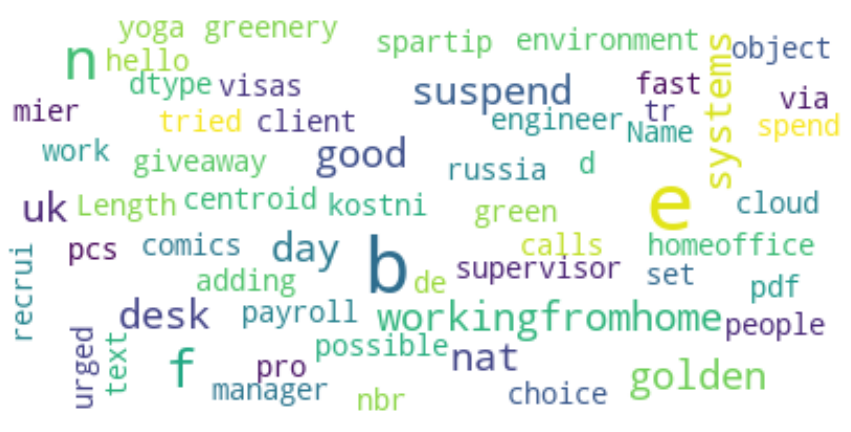

In [116]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [117]:
df.shape

(6719, 4)

In [118]:
df.isna().sum
tweet=df.copy()

In [119]:
tweet.head()

created_at                                               text  \
0  30-01-2022 09:08  b giveaway day pdf mier pro via kostni spartip...   
1  30-01-2022 09:04  b russia homeoffice uk urged suspend e  golden...   
2  30-01-2022 09:00  b tried adding greenery desk f f d  n green de...   
3  30-01-2022 08:49  b calls uk suspend e  golden visas e   fast tr...   
4  30-01-2022 08:40  b nbr yoga set pcs n e e a e e a e e a e e a e...   

          screen_name                     location  
0         b'KostNixx'                          b''  
1   b'videoactualize'  b'Somerset, United Kingdom'  
2       b'FlexispotU'           b'London, England'  
3  b'UKVisaBarrister'                b'London, UK'  
4   b'make_home_cozy'                          b''

In [120]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

created_at                                               text  \
0  30-01-2022 09:08  b giveaway day pdf mier pro via kostni spartip...   
1  30-01-2022 09:04  b russia homeoffice uk urged suspend e  golden...   
2  30-01-2022 09:00  b tried adding greenery desk f f d  n green de...   
3  30-01-2022 08:49  b calls uk suspend e  golden visas e   fast tr...   
4  30-01-2022 08:40  b nbr yoga set pcs n e e a e e a e e a e e a e...   

          screen_name                     location sentiment  polarity  
0         b'KostNixx'                          b''   neutral       0.0  
1   b'videoactualize'  b'Somerset, United Kingdom'  positive  0.166667  
2       b'FlexispotU'           b'London, England'  negative      -0.2  
3  b'UKVisaBarrister'                b'London, UK'  positive  0.166667  
4   b'make_home_cozy'                          b''   neutral       0.0

In [121]:
tweet['sentiment'].value_counts()

positive    3162
neutral     2524
negative    1033
Name: sentiment, dtype: int64

In [122]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\hWFH_COMBINE pol sent.csv")

In [123]:

sentiment_df.head(10)

text  polarity sentiment
0  b giveaway day pdf mier pro via kostni spartip...       0.0   neutral
1  b russia homeoffice uk urged suspend e  golden...  0.166667  positive
2  b tried adding greenery desk f f d  n green de...      -0.2  negative
3  b calls uk suspend e  golden visas e   fast tr...  0.166667  positive
4  b nbr yoga set pcs n e e a e e a e e a e e a e...       0.0   neutral
5  b etsy shop antique numbering machines stamper...       0.0   neutral
6  b choose best folding desks design ideas space...       1.0  positive
7  b adjustable folding laptop stand n n n n smar...       0.0   neutral
8  b chair elly n n moderndesign officespace work...       0.0   neutral
9  b f f  bc hurry lazada home office desks amp c...       0.0   neutral

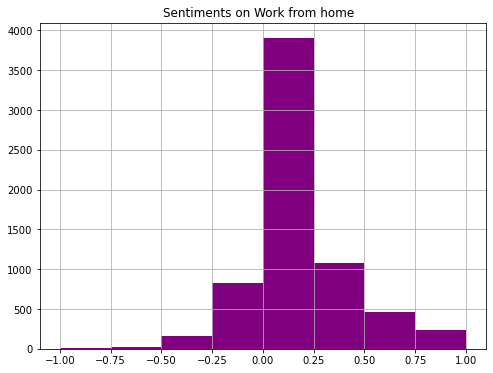

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on Work from home  ")
plt.show()

In [125]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(6719,)

In [126]:
x=tweet['text'].values
x.shape

(6719,)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(5375,)
(5375,)
(1344,)


(1344,)

positive    3162
neutral     2524
negative    1033
Name: sentiment, dtype: int64


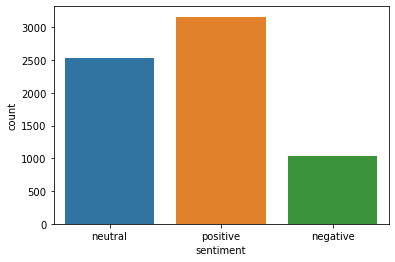

In [129]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

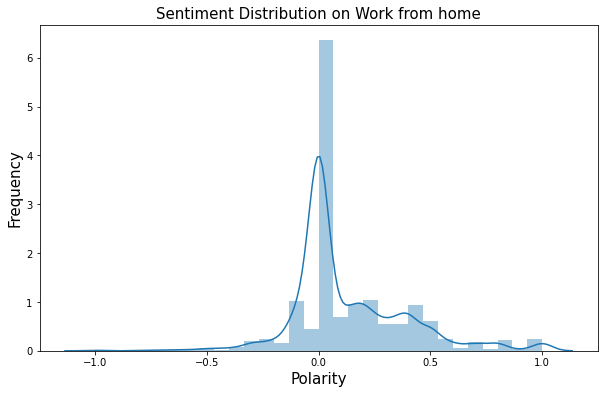

In [130]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on Work from home',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

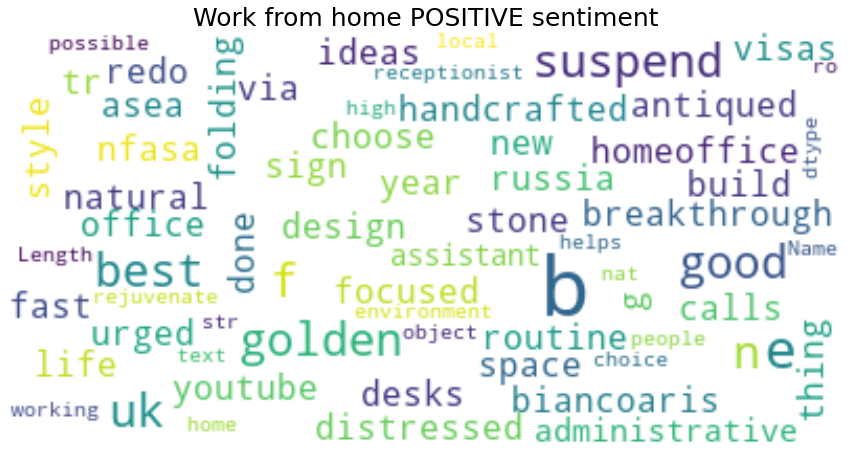

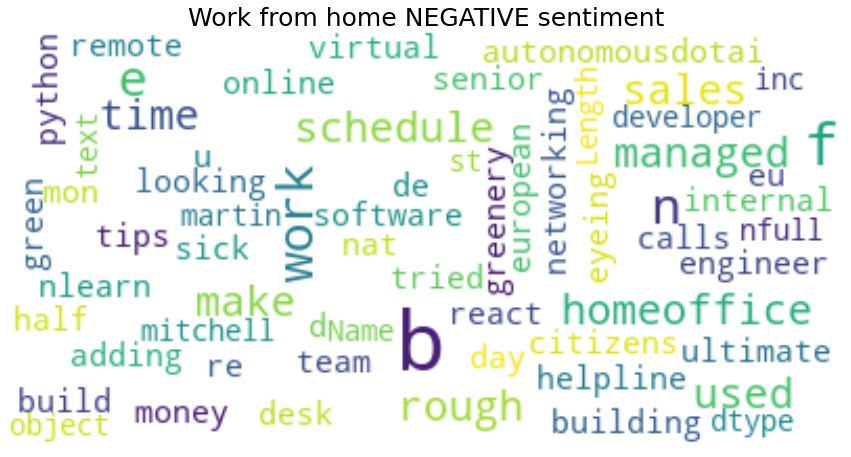

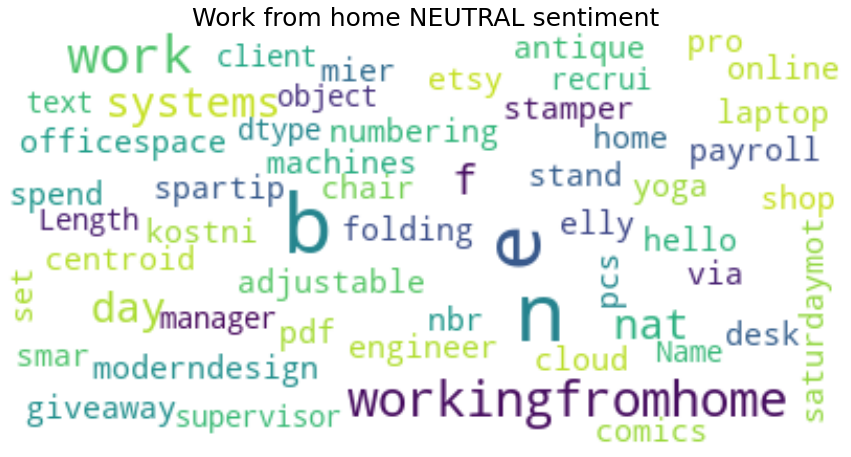

In [131]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'Work from home POSITIVE sentiment')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'Work from home NEGATIVE sentiment')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'Work from home NEUTRAL sentiment')

In [132]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

created_at  \
sentiment                                                      
negative   30-01-2022 09:0029-01-2022 19:0029-01-2022 19:...   
neutral    30-01-2022 09:0830-01-2022 08:4030-01-2022 08:...   
positive   30-01-2022 09:0430-01-2022 08:4930-01-2022 08:...   

                                                        text  \
sentiment                                                      
negative   b tried adding greenery desk f f d  n green de...   
neutral    b giveaway day pdf mier pro via kostni spartip...   
positive   b russia homeoffice uk urged suspend e  golden...   

                                                 screen_name  \
sentiment                                                      
negative   b'FlexispotU'b'ProdVoice'b'apinaud'b'fhlcreati...   
neutral    b'KostNixx'b'make_home_cozy'b'bleakhouse302'b'...   
positive   b'videoactualize'b'UKVisaBarrister'b'KreateCub...   

                                                    location     polarity  
sentiment                                                                  
negative   b'London, England'b'New Jersey, USA'b'New Jers...  -173.266190  
neutral    b''b''b'Delaware, USA'b''b''b'Philippines'b''b...     0.000000  
positive   b'Somerset, United Kingdom'b'London, UK'b'Indi...  1025.189614

In [133]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [134]:
words

['b',
 'giveaway',
 'day',
 'pdf',
 'mier',
 'pro',
 'via',
 'kostni',
 'spartipp',
 'software',
 'tools',
 'tool',
 'e',
 'a',
 'b',
 'russia',
 'homeoffice',
 'uk',
 'urged',
 'suspend',
 'e',
 'golden',
 'visas',
 'e',
 'fast',
 'tracking',
 'russian',
 'millionaires',
 'liberal',
 'democra',
 'e',
 'a',
 'b',
 'tried',
 'adding',
 'greenery',
 'desk',
 'f',
 'f',
 'd',
 'n',
 'green',
 'desksetup',
 'homeoffice',
 'officedesk',
 'homedecor',
 'plants',
 'b',
 'calls',
 'uk',
 'suspend',
 'e',
 'golden',
 'visas',
 'e',
 'fast',
 'tracking',
 'russian',
 'millionaires',
 'russia',
 'e',
 'a',
 'b',
 'nbr',
 'yoga',
 'set',
 'pcs',
 'n',
 'e',
 'e',
 'a',
 'e',
 'e',
 'a',
 'e',
 'e',
 'a',
 'e',
 'e',
 'a',
 'e',
 'e',
 'a',
 'e',
 'e',
 'a',
 'massage',
 'rela',
 'makehomecozy',
 'home',
 'homeliving',
 'e',
 'a',
 'b',
 'etsy',
 'shop',
 'antique',
 'numbering',
 'machines',
 'stamper',
 'numberedstamper',
 'homeoffice',
 'decor',
 'b',
 'choose',
 'best',
 'folding',
 'desks',
 '

In [135]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

word  frequency
0                 b       7306
1                 e       7033
2                 a       6429
3                 f       5275
4                 n       4649
5      workfromhome       1411
6              home        898
7              work        819
8            remote        817
9                 d        744
10  workingfromhome        696
11       homeoffice        586
12              new        544
13          working        511
14                c        501
15           office        468
16              job        379
17              get        331
18              nat        326
19            today        319

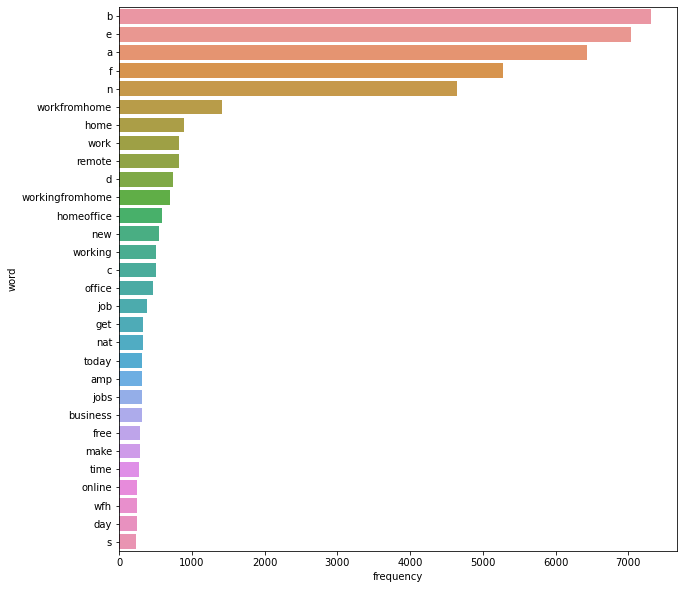

In [136]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [137]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_Final_sent_analysis.csv',index=False)

In [138]:
sentiment_df.head()

text  polarity sentiment
0  b giveaway day pdf mier pro via kostni spartip...       0.0   neutral
1  b russia homeoffice uk urged suspend e  golden...  0.166667  positive
2  b tried adding greenery desk f f d  n green de...      -0.2  negative
3  b calls uk suspend e  golden visas e   fast tr...  0.166667  positive
4  b nbr yoga set pcs n e e a e e a e e a e e a e...       0.0   neutral

In [139]:
sentiment_df.describe()

text  polarity sentiment
count                                                6719    6719.0      6719
unique                                               5922     563.0         3
top     b new underground affiliate marketing system g...       0.0  positive
freq                                                   76    2524.0      3162

In [140]:
sentiment_df.groupby('sentiment').size()

sentiment
negative    1033
neutral     2524
positive    3162
dtype: int64

In [141]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000000      7
-0.800000      4
-0.766667      1
-0.714286      1
-0.700000      2
            ... 
 0.850000      4
 0.900000     10
 0.916667      1
 0.925000      1
 1.000000    109
Length: 563, dtype: int64


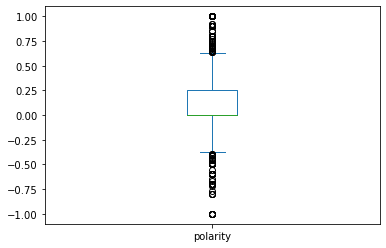

In [142]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [143]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

sentiment  polarity                                               text
0   neutral       0.0  b giveaway day pdf mier pro via kostni spartip...
1  positive  0.166667  b russia homeoffice uk urged suspend e  golden...
2  negative      -0.2  b tried adding greenery desk f f d  n green de...
3  positive  0.166667  b calls uk suspend e  golden visas e   fast tr...
4   neutral       0.0  b nbr yoga set pcs n e e a e e a e e a e e a e...
5   neutral       0.0  b etsy shop antique numbering machines stamper...
6  positive       1.0  b choose best folding desks design ideas space...
7   neutral       0.0  b adjustable folding laptop stand n n n n smar...
8   neutral       0.0  b chair elly n n moderndesign officespace work...
9   neutral       0.0  b f f  bc hurry lazada home office desks amp c...

In [144]:
dataset2.describe()#dataset2.hist()
#plt.show()

sentiment  polarity                                               text
count       6719    6719.0                                               6719
unique         3     563.0                                               5922
top     positive       0.0  b new underground affiliate marketing system g...
freq        3162    2524.0                                                 76

In [145]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [146]:
df1.head()

text
0  b nightlife gokarna eciting filled euberant fu...
1  b full stack software engineer nat compass pat...
2  b ways staa business without tech savvy n nsee...
3  b business world rapidly changed operating mod...
4  b javascript developer hybrid model office vs ...

In [147]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [148]:
df_train.head()

text sentiment
0  b nightlife gokarna eciting filled euberant fu...  positive
1  b full stack software engineer nat compass pat...  positive
2  b ways staa business without tech savvy n nsee...   neutral
3  b business world rapidly changed operating mod...  positive
4  b javascript developer hybrid model office vs ...  negative

In [149]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [150]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [151]:
df_test.head()

text sentiment
0  b wears pants nwife e  cwhat think e  re good ...  positive
1  b keep desk comfy cozy winter desk lights comp...  positive
2  b since remote new normal offices become occas...   neutral
3  b simplicity ultimate sophistication f f   n n...  positive
4  b customer service agent jazz airline njob des...  negative

In [152]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [153]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [154]:
df_train.head()
#punctuations are removed from news column in train dataset

text sentiment
0  b nightlife gokarna eciting filled euberant fu...  positive
1  b full stack software engineer nat compass pat...  positive
2  b ways staa business without tech savvy n nsee...   neutral
3  b business world rapidly changed operating mod...  positive
4  b javascript developer hybrid model office vs ...  negative

In [155]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [157]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [158]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'nightlife', 'gokarna', 'eciting', 'filled', 'euberant', 'fun', 'entertainment', 'one', 'best', 'ways', 'e', '']
Sentence after removing stopwords: ['b', 'full', 'stack', 'software', 'engineer', 'nat', 'compass', 'pathways', 'nthe', 'full', 'stack', 'software', 'engineer', 'responsible', 'deliverin', 'e', '']
Sentence after removing stopwords: ['b', 'business', 'world', 'rapidly', 'changed', 'operating', 'models', 'response', 'pandemic', 'many', 'employees', 'needed', 'e', '']
Sentence after removing stopwords: ['b', 'cio', 'helena', 'nimmo', 'shares', 'thoughts', 'businesses', 'make', 'hybrid', 'work', 'success', 'best', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'full', 'stack', 'developer', 'unbounce', 'nare', 'passionate', 'building', 'reliable', 'scalable', 'systems', 'tackling', 'e', '']
Sentence after removing stopwords: ['b', 'much', 'wood', 'cozy', 'f', 'f', '', 'interesting', 'approach', 'layout', 'e', '', 'ef', 'b', '

Sentence after removing stopwords: ['b', 'looking', 'financial', 'success', 'f', 'f', 'c', '', 'sabio', 'help', 'get', 'check', 'one', 'success', 'stories', 'marty', 'e', '']
Sentence after removing stopwords: ['b', 'smarthome', 'solutions', 'make', 'workingfromhome', 'easy']
Sentence after removing stopwords: ['b', 'looking', 'unique', 'outdoor', 'space', 'gym', 'office', 'bit', 'etra', 'room', 'set', 'virtua', 'e', '']
Sentence after removing stopwords: ['b', 'primary', 'junior', 'teacher', 'ridley', 'college', 'noverview', 'ridley', 'college', 'eciting', 'opportunity', 'fulltime', 'primary', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'view', 'homeoffice', 'lovewhatido']
Sentence after removing stopwords: ['b', 'customer', 'suppooperations', 'specialist', 'full', 'time', 'hybrid', 'remote', 'nat', 'calabrio', 'inc', 'n', 'n', 'customerservice', 'e', '']
Sentence after removing stopwords: ['b', 'discover', 'best', 'ways', 'successful', 'freelance', 'earn', 'full', 'time

Sentence after removing stopwords: ['b', 'free', 'video', 'reveals', 'break', 'massive', 'opportunity', 'online', 'marketing', 'advance', 'tech', 'skills', 'required', 'e', '']
Sentence after removing stopwords: ['b', 'grab', 'total', 'commission', 'system', 'right', 'get', 'worth', 'bonuses', 'gt', 'gt', 'gt']
Sentence after removing stopwords: ['b', 'people', 'already', 'early', 'bird', 'wow', 'f', 'f', '', 'b', 'ad', 'digitalasset', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'chill', 'lounge', 'lofi', 'focus', 'study', 'work', 'night', 'drive', 'mi', 'via', 'youtube', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'full', 'stack', 'developer', 'rbc', 'nwhat', 'opportunity', 'rbc', 'business', 'financial', 'services', 'technology', 'operations', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'nif', 'thinking', 'upgrading', 'home', 'office', 'steer', 'clear', 'time', 'money', 'wasting', 'e', '']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'biztips', 'workfromhome', 'time', 'easy', 'get', 'large', 'number', 'best', 'quality', 'potential', 'buyers', 'fo', 'e', '']
Sentence after removing stopwords: ['b', 'guessed', 'far', 'away', 'covid', 'years', 'workfromhome', 'n', 'fifthharmony']
Sentence after removing stopwords: ['b', 'fresh', 'assistant', 'manager', 'management', 'nat', 'walmacanada', 'nposition', 'summaryto', 'suppothe', 'store', 'manager', 'manage', 'e', '']
Sentence after removing stopwords: ['b', 'last', 'days', 'e', '', 'wfh', 'due', 'positive', 'case', 'within', 'household', 'yesterday', 'virtually', 'taught', 'e', '']
Sentence after removing stopwords: ['b', 'let', 'us', 'know', 'thread', 'love', 'hear', 'n', 'n', 'workfromhome', 'wfh', 'stayhome', 'entrepreneur', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'residualincome', 'workfromhome', 'networkmarketingrecruiting', 'follow', 'effective', 'traffic', 'building', 'strategies', 'e', '']
Sentence aft

Sentence after removing stopwords: ['b', 'always', 'ask', 'anything', 'e', '', 'happy', 'help', 'built', 'website', 'eplain', 'teach', 'e', '']
Sentence after removing stopwords: ['b', 'desk', 'booking', 'system', 'gives', 'employees', 'certainty', 'need', 'desk', 'available', 'arrive', 'wor', 'e', '']
Sentence after removing stopwords: ['b', 'let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['b', 'today', 'choose', 'positive', 'thoughts', 'room', 'negativity', 'period', 'n', 'n', 'repost', 'strongwoman', 'woman', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'clet', 'new', 'india', 'arise', 'peasants', 'e', '', '', 'cottage', 'grasping', 'plough', 'huts', 'cobbler', 'sweeper', 'e', '', 'n', 'e', '', '', 'swami', 'viv', 'e', '']
Sentence after removing stopwords: ['b', 'jaysus', 'leovaradkar', 'wordsalad', 'read', 'loud', 'without', 'laughing', 'remotework', 'e', '']
Sentence after removing stopwords: ['b', 'vmaya', 'j

Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'enjoy', 'writing', 'journal', 'pretty', 'notebooks', 'would', 'work', 'perfectly', 'f', 'f', '', '', 'n', 'takenotes', 'e', '']
Sentence after removing stopwords: ['b', 'emphasis', 'professional', 'amp', 'personal', 'growth', 'n', 'nwhen', 'employers', 'show', 'empathy', 'care', 'compassion', 'employ', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'truly', 'free', 'starting', 'online', 'business', 'since', 'business', 'earn', 'well', 'per', 'e', '']
Sentence after removing stopwords: ['b', 'week', 'still', 'see', 'jobs', 'today', 'workfromhome', 'jobsfair', 'right', 'f', 'f', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'youtube', 'vid', 'might', 'like', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'four

Sentence after removing stopwords: ['b', 'free', 'video', 'generate', 'viral', 'social', 'media', 'content', 'click', 'join']
Sentence after removing stopwords: ['b', 'full', 'stack', 'developer', 'nat', 'advisor', 'perspectives', 'nyou', 'work', 'team', 'members', 'accomplish', 'projects', 'help', 'build', 'e', '']
Sentence after removing stopwords: ['b', 'much', 'needed', 'new', 'homeoffice', 'gaming', 'chair', 'arozzi', 'f', 'f', 'b', 'f', 'f', '', 'ba']
Sentence after removing stopwords: ['b', 'great', 'saturday', 'pamelafoland', 'selfie', 'smile', 'homewithmypets', 'workingfromhome', 'fiverrseller', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'writing', 'resumes', 'net', 'weeks', 'bea', 'beahired', 'com', 'e', '', 'interested', 'lookingforwork', 'unemployed', 'e', '']
Sentence after removing stopwords: ['b', 'every', 'step', 'prefabrica

Sentence after removing stopwords: ['b', 'cowork', 'series', 'milesightiot', 'ideal', 'use', 'officespace', 'times', 'presence', 'homeoffice', 'well', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'working', 'new', 'normal', 'employees', 'prefer', 'working', 'home', 'study', 'remoteworking', 'employees', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'multi', 'tasking', 'fine', 'n', 'nwould', 'feel', 'productive', 'home', 'office', 'space', 'e', '']
Sentence after removing stopwords: ['b', 'struggling', 'make', 'every', 'month', 'side', 'hustles', 'great', 'way', 'make', 'etra', 'income', 'n', 'n', 'workfromhome', 'sidehustles', 'e', '']
Sentence after removing stopwords: ['b', 'creative', 'writer', 'bell', 'media', 'nat', 'bell', 'media', 'inc', 'nreq', 'id', 'bell', 'build', 'worldclass', 'networks', 'deve', 'e', '']
Sentence after removing stopwords: ['b', 'live', 'laptop', 'lifestyle', 'n', 'makemoneyonline', 'singlemom', 'stayathomejobs', 'passi

Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'aget', 'chance', 'win', 'upto', 'f', 'f', '', 'n', 'e', '', 'b', 'ef', 'b', 'fjust', 'sign', 'site', 'participate', 'contest', 'n', 'njust', 'follow', 'link', 'e', '']
Sentence after removing stopwords: ['b', 'asynchronous', 'communication', 'easily', 'fi', 'zoom', 'fatigue', 'motivation', 'e', '']
Sentence after removing stopwords: ['b', 'coworker', 'zoey', 'happy', 'friday', 'supermutt', 'dogsoftwitter', 'dogs', 'workingfromhome']
Sentence after removing stopwords: ['b', 'things', 'never', 'seen', 'thanks', 'self', 'healing', 'bios', 'lenovo', 'back', 'business', 'f', 'f', '', '', 'lenovoin', 'e', '']
Sentence after removing stopwords: ['b', 'seo', 'manager', 'publicis', 'groupe', 'njob', 'description', 'publicis', 'toronto', 'unique', 'data', 'pr

Sentence after removing stopwords: ['b', 'daughter', 'dressed', 'nice', 'nme', 'looking', 'leggings', 'amp', 'oversized', 'flannel', 'shirt', 'e', '', 'n', 'nclearly', 'two', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'read', 'narrate', 'audiobooks', 'home', 'wahmrevolution', 'workathome', 'workfromhome', 'jobs', 'moms']
Sentence after removing stopwords: ['b', 'ready', 'spring', 'f', 'f', 'c', 'bf', 'f', 'f', '', '', 'n', 'n', 'onemanshop', 'girlboss', 'stamp', 'chinesenewyear', 'deutschland', 'handmade', 'watercolor', 'e', '']
Sentence after removing stopwords: ['b', 'today', 'e', '', 'progress', 'old', 'carpet', 'underlay', 'taken', 'dpc', 'insulation', 'started', 'laying', 'new', 'oak', 'floor', 'e', '']
Sentence after removing stopwords: ['b', 'look', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post',

Sentence after removing stopwords: ['b', 'best', 'online', 'business', 'sta', 'nread', 'f', 'f', '', '', 'online', 'business', 'freelancing', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'dream', 'come', 'true', 'nightmare', 'wfh']
Sentence after removing stopwords: ['b', 'boris', 'letting', 'priti', 'patel', 'indiscretion', 'e', '', 'breaking', 'ministerial', 'code', 'e', '', '', 'makes', 'complete', 'sense', 'f', 'f', '', 'f', 'n', 'met', 'n', 'homeoffice', 'n', 'handy']
Sentence after removing stopwords: ['b', 'interesting', 'debate', 'gbnews', 'working', 'home', 'still', 'work', 'home', 'back', 'workplace', 'yet', 'workingfromhome']
Sentence after removing stopwords: ['b', 'hey', 'looking', 'launch', 'business', 'online', 'sure', 'start', 'check', 'join']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingsponsoring', 'affiliatemarketing', 'reveal', 'obtaining', 'huge', 'selection', 'e', '']
Sentence after removing stopwords: ['b', 'cr

Sentence after removing stopwords: ['b', 'refugees', 'mainly', 'women', 'children', 'could', 'barred', 'home', 'office', 'e', '', 'proposed', 'changes', 'n', 'nmore', 'th', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'payroll', 'specialist', 'bdo', 'nbdo', 'firm', 'built', 'foundation', 'positive', 'relationships', 'people', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'workingfromhome', 'one', 'reasons', 'havanese']
Sentence after removing stopwords: ['b', 'youtube', 'vid', 'might', 'like', 'free', 'make', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'eposed', 'new', 'e', '', 'csecret', 'system', 'e', '', 'pays', 'us', 'n', 'e', '', '', 'completing', 'simple', 'online', 'tasks', 'clicks', 'e', '']
Sentence after removing stopwords: ['b', 'lunch', 'everyone', 'f', 'f', '', 'nwho', 'indian', 'f', 'f', '', 'b', 'n', 'nsome', 'days', 'really', 'miss', 'proper', 'lunch', 'breaks', 'colleagues', 'f', 'f

Sentence after removing stopwords: ['b', 'free', 'money', 'system', 'scam', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e', '']
Sentence after removing stopwords: ['b', 'look', 'cat', 'gives', 'knows', 'work', 'chair', 'cute', 'likely', 'get', 'away', 'e', '']
Sentence after removing stopwords: ['b', 'newcouch', 'amp', 'easychair', 'arrived', 'week', 'ago', 'amp', 'make', 'new', 'addition', 'feel', 'like', 'home', 'time', 'remove', 'tags', 'amp', 'order', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'helps', 'rejuvenate', 'local', 'high', 'streets', 'n', 'nconveoffices', 'homes', 'encourage', 'businesses', 'move', 'e', '']
Sentence after removing stopwords: ['b', 'affiliate', 'marketing', 'fast', 'way', 'multiple', 'streams', 'income', 'n', 'njust', 'take', 'first', 'step', 'e', '']
Sentence after removing stopwords: ['b', 'eposed', 'new', 'e', '', 'csecret', 'system', 'e', '', 'pays', 'us', 'n', 'e', '', '', 'comple

Sentence after removing stopwords: ['b', 'noted', 'need', 'keep', 'mind', 'easy', 'bring', 'laptop', 'bed', 'try', 'get', 'work', 'done', 'much', 'e', '']
Sentence after removing stopwords: ['b', 'still', 'looking', 'amazing', 'contentcreator', 'become', 'tiktok', 'manager', 'n', 'npass', 'along', 'hit', 'link', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'read', 'narrate', 'audiobooks', 'home', 'via', 'wahmrevolution', 'booklovers', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'free', 'earn', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'eclusive', 'e', '', 'n', 'na', 'sneak', 'peak', 'neopod', 'e', '', 'information', 'come', 'f', 'f', '', '', 'n', 'nyou', 'get', 'vivid', 'pods', 'f', 'f', '', 'e', '']
Sentence after removing stopwords: ['b', 'welcome', 'professional', 'meeting', 'setup', 'f', 'f', 'c', 'b', 'homeoffice']
Sentence after removing stopwords: ['b', 'quickly', 'learn', 'construct', 're

Sentence after removing stopwords: ['b', 'putting', 'wow', 'homeoffice', 'n', 'n', 'wowfactor']
Sentence after removing stopwords: ['b', 'dollarbiz', 'dollar', 'proven', 'year', 'paying', 'program', 'may', 'think', 'dollar', 'program', 'much', 'e', '']
Sentence after removing stopwords: ['b', 'craft', 'good', 'open', 'rate', 'email', 'campaigns', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e', '']
Sentence after removing stopwords: ['b', 'find', 'surprising', 'tool', 'made', 'joyce', 'days', 'line', 'c', 'join', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'top', 'reasons', 'get', 'medical', 'billing', 'amp', 'coding', 'medicalcoding', 'medicalbilling', 'workfromhome', 'jobs', 'wahm', 'moms', 'e', '']
Sentence after removing stopwords: ['b', 'winter', 'm

Sentence after removing stopwords: ['b', 'never', 'thought', 'paof', 'getting', 'ready', 'work', 'routine', 'would', 'include', 'grabbing', 'blanket', 'making', 'hot', 'wate', 'e', '']
Sentence after removing stopwords: ['b', 'deuteronomy', 'nnew', 'international', 'version', 'n', 'drive', 'nations', 'great', 'strong', 'e', '']
Sentence after removing stopwords: ['b', 'great', 'afor', 'office', 'home', 'n', 'e', '', 'b', 'houseandhome']
Sentence after removing stopwords: ['b', 'leovaradkar', 'u', 'make', 'sound', 'like', 'public', 'reality', 'u', 'got', 'complaints', 'biz', 'men', 'amp', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'free', 'get', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'production', 'jobs', 'available', 'careerbarn', 'apply', 'production', 'production', 'associate', 'packaging', 'operator', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'free', 'earn', 'daily', 'workathom

Sentence after removing stopwords: ['b', 'e', '', 'favorite', 'gadget', 'home', 'office', 'e', '', 'social', 'media', 'specialist', 'e', '', 'must', 'picks', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'woman', 'original', 'workingmom', 'workingfromhome', 'workingwomen', 'contemporarypainting', 'e', '']
Sentence after removing stopwords: ['b', 'high', 'couhas', 'ruled', 'age', 'assessments', 'unlawful', 'lack', 'safeguards', 'h', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'admin', 'assistant', 'nat', 'hays', 'specialist', 'recruitment', 'limited', 'nadministrator', 'required', 'heham', 'primary', 'school', 'new', 'sc', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'home', 'n', 'nif', 'still', 'invest', 'nice', 'vehicle', 'drive', 'something', 'economical', 'n', 'nmy', 'brain', 'canno', 'e', '']
Sentence after removing st

Sentence after removing stopwords: ['b', 'inside', 'new', 'garden', 'office', 'f', 'f', '', '', 'n', 'nit', 'inviting', 'light', 'private', 'spacious', 'efficient', 'highly', 'insulated', 'n', 'nsee', 'mor', 'e', '']
Sentence after removing stopwords: ['b', 'announced', 'company', 'wide', 'slack', 'channel', 'quitting', 'strong', 'urge', 'add', 'yo', 'e', '']
Sentence after removing stopwords: ['b', 'net', 'week', 'likely', 'see', 'end', 'thr', 'workingfromhome', 'rule', 'f', 'f', '', 'f', 'f', '', 'ad', 'interesting', 'watch', 'employees', 'e', '', '', 'amp', 'emp', 'e', '']
Sentence after removing stopwords: ['b', 'perfect', 'work', 'home', 'setup', 'ei', 'n', 'nok', 'fully', 'board', 'f', 'f', '', 'f', 'f', '', 'b', 'f', 'f', '', 'bb', 'n', 'nwhat', 'wo', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'node', 'agiledevelopment', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'bold', 'in

Sentence after removing stopwords: ['b', 'beautiful', 'orange', 'rose', 'home', 'garden', 'enjoy', 'n', 'beautiful', 'flowers', 'gardeners', 'homeoffice', 'plant', 'orange', 'e', '']
Sentence after removing stopwords: ['b', 'need', 'smartphone', 'computer', 'smarttv', 'good', 'internet', 'connection', 'e', '', 'nyou', 'e', '', 'need', 'hig', 'e', '']
Sentence after removing stopwords: ['b', 'legal', 'counsel', 'wonderfi', 'nabout', 'wonderfi', 'wonderfi', 'mission', 'simplify', 'streamline', 'access', 'assets', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'best', 'things', 'freelancing', 'opportunity', 'create', 'workspace', 'n', 'nif', 'need', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'back', 'work', 'tomorrow', 'e', '', 'fancy', 'new', 'monitor', 'make', 'productive', 'great', 'guide', 'work', 'hom', 'e', '']
Sentence after removing stopwords: ['b', 'dinning', 'sets', 'available', 'nfor', 'enquiries', 'dm', 'barackobama', 'interior', 'homeoffice', 'china']

Sentence after removing stopwords: ['b', 'f', 'f', '', 'f', 'f', 'f', 'f', 'bdwotd', 'f', 'f', '', 'f', 'f', 'f', 'f', 'bd', 'e', '', '', 'ef', 'b', 'fgratitude', 'e', '', '', 'ef', 'b', 'f', 'n', 'grateful', 'appreciationpost', 'lovestay', 'amen', 'thanksgiving', 'january', 'blessed', 'live', 'laugh', 'e', '']
Sentence after removing stopwords: ['b', 'parsehub', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'pleased', 'announce', 'dspencecomedy', 'speaking', 'things', 'health', 'comedy', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'medical', 'careers', 'work', 'life', 'balance', 'medical', 'careers', 'workfromhome', 'jobs', 'wahm', 'moms', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'working', 'new', 'normal', 'employees', 'prefer', 'workingfromhome', 'study', 'n', 'n']
Sentence after removing stopwords: ['b', 'eposed', 

Sentence after removing stopwords: ['b', 'let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['b', 'makeshift', 'standing', 'desk', 'e', '', 'sure', 'harold', 'bloom', 'would', 'understand', 'along', 'late', 'time', 'trial', 'best', 'e', '']
Sentence after removing stopwords: ['b', 'good', 'news', 'e', '', 'workingfromhome', 'remotework', 'remotejobs']
Sentence after removing stopwords: ['b', 'taking', 'stress', 'whole', 'body', 'offering', 'comfortable', 'suppoduring', 'long', 'sitting', 'sessions', 'e', '']
Sentence after removing stopwords: ['b', 'pretty', 'snow', 'day', 'behappy', 'workfromhome', 'momlife']
Sentence after removing stopwords: ['b', 'hey', 'joined', 'network', 'called', 'savvyconnectvy', 'earned', 'get', 'paid', 'testing', 'new', 'free', 'apps', 'post', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '

Sentence after removing stopwords: ['b', 'heard', 'instagram', 'highlight', 'covers', 'e', '', 'love', 'share', 'discuss', 'e', '']
Sentence after removing stopwords: ['b', 'wifemomcpa', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'back', 'work', 'tomorrow', 'e', '', 'want', 'new', 'monitor', 'make', 'productive', 'great', 'guide', 'work', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'real', 'workfromhome', 'money', 'making', 'program', 'f', 'f', '', '', 'sta', 'makingmoneyonline', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'meet', 'office', 'buddy', 'e', '', 'mastered', 'aof', 'cup', 'tea', 'yet', 'provides', 'lovely', 'view', 'always', 'pleased', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'absolutely', 'love', 'wa', 'melts', 'ready', 'working', 'tomorrow', 'morning', 'wa', 'melts', 'smell', 'nice', 'e', '']
S

Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'simple', 'home', 'office', 'upgrades', 'make', 'huge', 'difference', 'wfh', 'n', 'gt', 'workfromhome']
Sentence after removing stopwords: ['b', 'mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'important', 'distinct', 'site', 'traffic', 'generation', 'scheme', 'r', 'e', '']
Sentence after removing stopwords: ['b', 'covid', 'crushed', 'company', 'culture', 'e', '', 'something', 'good', 'take', 'place', 'via', 'quartzatwork', 'wfh', 'workingfromhome']
Sentence after removing stopwords: ['b', 'bi', 'question', 'bearish', 'beautiful', 'n', 'small', 'account', 'trading', 'challenge', 'e', '']
Sentence after removing stopwords: ['b', 'painting', 'trim', 'work', 'office', 'new', 'furniture', 'comes', 'week', 'e', '', 'weekendwarrior', 'painting', 'e', '']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'controversial', 'video', 'reveals', 'steps', 'make', 'big', 'profits', 'trading', 'penny', 'cryptocurrencies', 'join', 'e', '']
Sentence after removing stopwords: ['b', 'return', 'office', '', 'hour', 'drive', 'two', 'years', 'working', 'effectively', 'home', 'cost', 'e', '']
Sentence after removing stopwords: ['b', 'youtube', 'vid', 'might', 'like', 'free', 'earn', 'daily', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'aare', 'looking', 'fully', 'remote', 'position', 'f', 'f', 'c', 'e', 'n', 'f', 'f', '', 'aa', 'f', 'f', '', 'b', 'craving', 'sunny', 'weather', 'easy', 'going', 'lifestyle', 'tapas', 'pael', 'e', '']
Sentence after removing stopwords: ['b', 'jobale', 'workfromhome', 'n', 'naftermetoo', 'developing', 'website', 'include', '

Sentence after removing stopwords: ['b', 'wish', 'could', 'fast', 'forward', 'time', 'remotework', 'workfromhome']
Sentence after removing stopwords: ['b', 'honor', 'data', 'privacy', 'day', 'remember', 'use', 'best', 'practices', 'comes', 'security', 'home', 'work', 'office', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'suppoengineer', 'amer', 'gitlab', 'n', 'vacancy', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'follow', 'us', 'updated', 'new', 'products', 'sales', 'n']
Sentence after removing stopwords: ['b', 'electrical', 'engineer', 'global', 'standards', 'nat', 'meta', 'nmeta', 'seeking', 'electrical', 'engineer', 'strong', 'project', 'management', 'e', '']
Sentence after removing stopwords: ['b', 'let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['b', 'surprising', 'surprising', 'signals', 'story', 'thegreatresignation', 'lack', 'workingfromhome', 'shows', 'e', '']
Sentenc

Sentence after removing stopwords: ['b', 'solicitor', 'employment', 'law', 'award', 'winning', 'firm', 'nat', 'recruitment', 'genius', 'npedigree', 'legal', 'top', 'tier', 'awardwinning', 'e', '']
Sentence after removing stopwords: ['b', 'comfortable', 'ergonomic', 'amp', 'high', 'quality', 'office', 'seating', 'designed', 'suppoyour', 'sit', 'contact', 'sales', 'zonman', 'cn', 'mor', 'e', '']
Sentence after removing stopwords: ['b', 'kawvalley', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'modern', 'single', 'handle', 'bathroom', 'faucet', 'n', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'makehomecozy', 'home', 'homeliving', 'e', '']
Sentence after removing stopwords: ['b', 'even', 'working', 'home', 'becomes', 'much', 'needed', 'slack', 'offices', 'e', '']
Sentence after removing stopwords: ['b', 'mental', 'health', 'needs', 'good', 'understoo

Sentence after removing stopwords: ['b', 'got', 'selected', 'second', 'round', 'first', 'remote', 'interview', 'really', 'happy', 'f', 'f', '', 'c', 'need', 'work', 'hard', 'also', 'e', '']
Sentence after removing stopwords: ['b', 'sgr', 'seeks', 'fill', 'recruitment', 'coordinator', 'positions', 'ideal', 'candidates', 'work', 'home', 'staying', 'organized', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'melon', 'con', 'vino', 'f', 'f', '', 'e', 'ef', 'b', 'f', 'n', 'melonconvino', 'homemade', 'homeoffice', 'buenlunes']
Sentence after removing stopwords: ['b', 'azure', 'printed', 'home', 'studios', 'ideal', 'home', 'fitness', 'routines', 'printed', 'recycled', 'materials', 'deliv', 'e', '']
Sentence after removing stopwords: ['b', 'yesterday', 'e', '', 'bad', 'day', 'e', '', 'awesome', 'day', 'e', '', 'workingfromhome', 'work', 'business', 'perspective', 'truth', 'memes', 'diversityandinclusion']
Sentence after removing stopwords: ['b', 'tell', 'us', 'far', 'commute', 'work

Sentence after removing stopwords: ['b', 'remote', 'principal', 'engineer', 'kotlin', 'java', 'high', 'load', 'marketplace', 'f', '', 'avantgarde', 'e', '', '', 'e', '', 'ccreating', 'fans', 'e', '', 'allows', 'e', '']
Sentence after removing stopwords: ['b', 'many', 'people', 'workingfromhome', 'music', 'background', 'great', 'favourite', 'listen']
Sentence after removing stopwords: ['b', 'highly', 'recommend', 'album', 'listen', 'whilst', 'work', 'e', '', 'partial', 'good', 'acoustic', 'rock', 'music', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'collection', 'meet', 'dinah', 'womensfashion', 'giftsforher', 'giftidea', 'workingfromhome', 'shoppingday', 'e', '']
Sentence after removing stopwords: ['b', 'lifevantage', 'mlm', 'review', 'really', 'make', 'money', 'lifevantage']
Sentence after removing stopwords: ['b', 'else', 'wants', 'free', 'cash', 'generating', 'websites', 'month', 'pay', 'daily', 'join', 'e', '']
Sentence after removing stopwords: ['b', 'characteristics'

Sentence after removing stopwords: ['b', 'although', 'prefer', 'omnifocus', 'anything', 'really', 'work', 'know', 'need', 'accomplish', 'n', 'n', 'nooffice', 'e', '']
Sentence after removing stopwords: ['b', 'google', 'searches', 'popular', 'homeoffice', 'products', 'skyrocketed', 'reveal', 'essentials', 'demand', 'e', '']
Sentence after removing stopwords: ['b', 'risapesapane', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'content', 'management', 'epeat', 'moduscreate', 'n', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'critical', 'marketing', 'real', 'estate', 'lives', 'online', 'remote', 'economy', 'make', 'claim', 'di', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'enjoying', 'new', 'job', 'n', 'n', 'jobs', 'worklife', 'workfromhome', 'alumni', 'uncgalumni', 'workworkwork']
Sentence after removing s

Sentence after removing stopwords: ['b', 'remoteworking', 'jobs', 'shown', 'good', 'employee', 'retention', 'rates', 'workfromhome']
Sentence after removing stopwords: ['b', 'make', 'money', 'earn', 'free', 'traffic', 'buying', 'traffic', 'affiliate', 'marketing', 'via', 'e', '']
Sentence after removing stopwords: ['b', 'feng', 'shui', 'home', 'office', 'working', 'home', 'become', 'standard', 'many', 'people', 'pandemic', 'make', 'e', '']
Sentence after removing stopwords: ['b', 'spend', 'evening', 'clearing', 'qc', 'tasks', 'lots', 'work', 'available', 'right', 'n', 'n', 'remoteqc', 'audiofiles', 'workfromhome', 'crowdsurf']
Sentence after removing stopwords: ['b', 'curly', 'maple', 'professional', 'medium', 'weight', 'wood', 'professional', 'pen', 'homeoffice']
Sentence after removing stopwords: ['b', 'rookie', 'mistake', 'e', '', 'aeating', 'cheesesteak', 'lunch', 'special', 'right', 'pm', 'meeting', 'sooooo', 'tired', 'f', 'f', 'f', 'f', 'f', 'e', '', 'e', '', '', 'ef', 'b', 'f', 

Sentence after removing stopwords: ['b', 'e', '', 'ready', 'covid', 'quarantine', 'debates', 'vaccinations', 'n', 'covid', 'quarantine', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'save', 'information', 'internet', 'evernote', 'web', 'clipper', 'handy', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'systems', 'engineer', 'windows', 'virtualization', 'nat', 'toyota', 'north', 'america', 'nwho', 'collaborative', 'respectful', 'place', 'e', '']
Sentence after removing stopwords: ['b', 'wondering', 'cheap', 'way', 'stay', 'warm', 'working', 'home', 'use', 'handy', 'calculator', 'freelance', 'e', '']
Sentence after removing stopwords: ['b', 'happy', 'sunday', 'f', 'f', '', 'n', 'tupac', 'f', 'f', '', '', 'tshi', 'workfromhomelife', 'f', 'f', '', 'b', 'f', 'f', 'e', 'af', 'f', 'f', '', '', 'f', 'f', '', 'f', 'f', '']
Sentence after removing stopwords: ['b', 'virtual', 'assistant', 'finally', 'give', 'fleibility', 'create', 'perfect', 'balanced', 'lifestyle', 'lo

Sentence after removing stopwords: ['b', 'reasons', 'workingfromhome', 'awesome']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingrecruiting', 'homebusiness', 'modern', 'times', 'able', 'connect', 'hundreds', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'else', 'love', 'blankets', 'much', 'nif', 'e', '', 'crocheted', 'blanket', 'e', '', 'sewn', 'blanket', 'f', 'f', 'b', 'n', 'blanket', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'year', 'new', 'setup', 'n', 'n', 'streamer', 'homeoffice']
Sentence after removing stopwords: ['b', 'makemoneyonline', 'workfromhome', 'simple', 'way', 'grow', 'organization', 'produce', 'great', 'deal', 'ever', 'e', '']
Sentence after removing stopwords: ['b', 'timothydclark', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'coworker', 'woke', 'years', 'decided', 'e', '', 'job', 'right

Sentence after removing stopwords: ['b', 'everyone', 'needs', 'stress', 'free', 'home', 'office', 'tips', 'get', 'rid', 'right', 'make', 'home', 'offi', 'e', '']
Sentence after removing stopwords: ['b', 'alfa', 'furnishing', 'offers', 'office', 'furniture', 'high', 'end', 'moderate', 'enhances', 'impressive', 'productive', 'office', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'medical', 'careers', 'work', 'life', 'balance', 'medical', 'careers', 'workfromhome', 'jobs', 'wahm', 'moms', 'e', '']
Sentence after removing stopwords: ['b', 'free', 'weekly', 'marketing', 'training', 'lead', 'generation', 'social', 'media', 'marketing', 'everything', 'need', 'grow', 'onlin', 'e', '']
Sentence after removing stopwords: ['b', 'hire', 'right', 'virtualassistant', 'check', 'email', 'first', 'thing', 'morning', 'e', '']
Sentence after removing stopwords: ['b', 'need', 'organization', 'overhaul', 'organizationhacks', 'help', 'best', 'self', 'e', '']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['b', 'another', 'day', 'home', 'office', 'f', 'f', '', 'favorite', 'office', 'organization', 'item', 'wfh', 'homeoffice']
Sentence after removing stopwords: ['b', 'diy', 'automated', 'hoops', 'n', 'n', 'photooftheday', 'instagram', 'picoftheday', 'likelike', 'repost', 'innovation', 'india', 'creative', 'e', '']
Sentence after removing stopwords: ['b', 'achieving', 'healthy', 'worklife', 'balance', 'means', 'enough', 'time', 'energy', 'everyone', 'everything', 'else', 'e', '']
Sentence after removing stopwords: ['b', 'appreciate', 'beautiful', 'place', 'work', 'home', 'wfh', 'workingfromhome', 'donegal', 'wildatlanticway', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'look', 'much', 'fun', 'learning', 'virtual', 'event', 'last', 'night', 'love', 'still', 'e

Sentence after removing stopwords: ['b', 'earn', 'money', 'online', 'timebucks', 'f', 'f', '', 'f', 'f', '', 'b', 'n', 'n', 'f', 'f', '', '', 'f', 'f', '', '', 'n', 'n', 'e', 'c', '', 'stay', 'safe', 'amp', 'workfromhome', 'n', 'e', 'c', '', 'guaranteed', 'weekl', 'e', '']
Sentence after removing stopwords: ['b', 'take', 'free', 'career', 'test', 'make', 'right', 'career', 'choice', 'get', 'career', 'guidance', 'career', 'counselling', 'online', 'top', 'lea', 'e', '']
Sentence after removing stopwords: ['b', 'many', 'years', 'people', 'looking', 'apply', 'principles', 'personal', 'productivity', 'organizations', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingrecruiting', 'internetmarketing', 'specific', 'guideline', 'proving', 'much', 'leads', 'yo', 'e', '']
Sentence after removing stopwords: ['b', 'ready', 'full', 'day', 'webinars', 'teams', 'meetings', 'training', 'session', 'workingfromhome']
Sentence after removing stopwords: ['b', 'join', 'nerep

Sentence after removing stopwords: ['b', 'chair', 'easy', 'n', 'n', 'moderndesign', 'officespace', 'workspace', 'furnituredesign', 'officefurniture', 'manufacturers', 'chair', 'e', '']
Sentence after removing stopwords: ['b', 'washpostlife', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'software', 'development', 'engineer', 'amazon', 'ndescription', 'want', 'work', 'new', 'epansion', 'initiatives', 'within', 'sponsored', 'bran', 'e', '']
Sentence after removing stopwords: ['b', 'see', 'build', 'bridge', 'local', 'businesses', 'customers', 'types', 'easy', 'page', 'bridge', 'e', '']
Sentence after removing stopwords: ['b', 'employees', 'fleing', 'right', 'work', 'remotely', 'n', 'n', 'remotework', 'e', '']
Sentence after removing stopwords: ['b', 'modern', 'kitchen', 'countertop', 'f', 'f', '', 'adwith', 'f', 'f', 'e', '', 'granite', 'nplease', 'visit', 'website'

Sentence after removing stopwords: ['b', 'still', 'workingfromhome', 'still', 'important', 'dress', 'pato', 'keep', 'motivation', 'bring', 'suits', 'shirts', 'e', '']
Sentence after removing stopwords: ['b', 'today', 'day', 'speak', 'lines', 'every', 'morning', 'discover', 'powerful', 'omnipotent', 'yo', 'e', '']
Sentence after removing stopwords: ['b', 'totally', 'free', 'video', 'generate', 'viral', 'social', 'media', 'content', 'within', 'click', 'join']
Sentence after removing stopwords: ['b', 'senior', 'net', 'c', 'developer', 'full', 'time', 'immediate', 'hire', 'nat', 'upwork', 'nknow', 'customer', 'opening', 'senior', 'e', '']
Sentence after removing stopwords: ['b', 'chaeciii', 'check', 'automated', 'free', 'way', 'troubleshoot', 'problems', 'f', 'f', '', 'c', 'userops', 'workfromhome']
Sentence after removing stopwords: ['b', 'writers', 'anyone', 'else', 'works', 'desk', 'important', 'layout', 'tidiness', 'organisation', 'desk', 'e', '']
Sentence after removing stopwords: ['b

Sentence after removing stopwords: ['b', 'truly', 'great', 'way', 'advertise', 'business', 'via', 'classified', 'ad', 'sites', 'keep', 'posting', 'ads', 'keep', 'making', 'profits', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'member', 'try', 'getresponse', 'free', 'forever', 'software', 'ultimate', 'list', 'building', 'marketing', 'tool']
Sentence after removing stopwords: ['b', 'claim', 'provide', 'superior', 'quick', 'services', 'also', 'stick', 'words', 'log', 'onto', 'website', 'appl', 'e', '']
Sentence after removing stopwords: ['b', 'build', 'bridge', 'seeking', 'hot', 'prospects', 'building', 'free', 'training', 'build', 'connection', 'custom', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'backend', 'software', 'engineer', 'l', 'twilio', 'n', 'vacancy', 'workfromhome']
Sentence after removing stopwords: ['b', 'carb', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfr

Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'luury', 'lamp', 'clock', 'stood', 'available', 'interiors', 'beautifying', 'akurehowfar', 'futaradiofm', 'gistreel', 'e', '']
Sentence after removing stopwords: ['b', 'got', 'acorn', 'vase', 'today', 'delighted', 'treatyourself', 'trees', 'homeoffice', 'edspurr']
Sentence after removing stopwords: ['b', 'checklist', 'buying', 'estate', 'n', 'nread', 'full', 'article', 'n', 'n']
Sentence after removing stopwords: ['b', 'nice', 'video', 'related', 'free', 'make', 'daily', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'jacksonville', 'system', 'engineer', 'major', 'accounts', 'nat', 'fortinet', 'nposition', 'systems', 'engineer', 'major', 'accounts', 'objective', 'e', '']
Sentence after removing stopwords: ['b', 'pro

Sentence after removing stopwords: ['b', 'surveyjunkie', 'one', 'best', 'ways', 'make', 'money', 'home', 'taking', 'quick', 'surveys', 'join', 'millions', 'others', 'e', '']
Sentence after removing stopwords: ['b', 'webe', 'desk', 'camera', 'camera', 'need', 'complete', 'office', 'setup', 'n', 'ncontact', 'sales', 'team', 'inform', 'e', '']
Sentence after removing stopwords: ['b', 'get', 'paying', 'traffic', 'affiliate', 'website', 'fast', 'n', 'makemoneyonline', 'e', '']
Sentence after removing stopwords: ['b', 'look', 'free', 'get', 'paid', 'seconds', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'displate', 'game', 'room', 'office', 'coming', 'along', 'nicely', 'n', 'gameroom', 'homeoffice']
Sentence after removing stopwords: ['b', 'good', 'ideas', 'stawith', 'brainstorming', 'ngreat', 'ideas', 'stawith', 'cup', 'coffee', 'n', 'fourva', 'virtualstaffing', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'ebook', 'maker', 'be

Sentence after removing stopwords: ['b', 'discover', 'beautiful', 'wall', 'clocks', 'redbubble', 'ashop', 'n', 'nft', 'clock', 'minimalist', 'large', 'classic', 'white', 'grid', 'pattern', 'e', '']
Sentence after removing stopwords: ['b', 'safe', 'say', 'remotework', 'stay', 'least', 'capacity', 'businesses', 'workers', 'h', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'gt', 'gt', 'net', 'time', 'remember', 'talking', 'client', 'anyone', 'okay', 'f', 'f', '', 'e', 'c', 'c', 'f', 'f', 'f', 'bb', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'growth', 'risky', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'wide', 'range', 'printers', 'coming', 'soon', 'n', 'n', 'f', 'f', '', 'free', 'fast', 'delivery', 'amp', 'huge', 'savings', 'ink', 'n', 'n', 'printers', 'hp', 'epson', 'e', '']
Sentence after removing stopwords: ['b', 'ne

Sentence after removing stopwords: ['b', 'wfh', 'tip', 'dress', 'ngetting', 'ready', 'going', 'office', 'makes', 'feel', 'confident', 'helps', 'draw', 'line', 'e', '']
Sentence after removing stopwords: ['b', 'bookkeeping', 'easy', 'way', 'n', 'naccountancy', 'easy', 'way', 'n', 'nta', 'consultancy', 'easy', 'way', 'n', 'n', 'full', 'training', 'given', 'message', 'e', '']
Sentence after removing stopwords: ['b', 'tempting', 'times', 'online', 'meetings', 'invite', 'large', 'number', 'participants', 'two', 'problems', 'e', '']
Sentence after removing stopwords: ['b', 'finally', 'product', 'sales', 'money', 'making', 'opportunities', 'hear', 'available', 'personally', 'join', 'e', '']
Sentence after removing stopwords: ['b', 'c', 'aremote', 'licensed', 'realtor', 'role', 'available', 'amazing', 'candidates', 'ready', 'demonstrate', 'knowledge', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'customer', 'eperience', 'agent', 'admin', 'services', 'nat', 'salesforce', 'nto', '

Sentence after removing stopwords: ['b', 'read', 'deals', 'items', 'designed', 'make', 'working', 'home', 'little', 'easy']
Sentence after removing stopwords: ['b', 'shoutout', 'jc', 'applesuppoteam', 'westfieldvtc', 'working', 'magic', 'repairing', 'macbook', 'overnight', 'f', 'f', '', 'c', 'f', 'f', 'f', 'bd', 'workfromhome']
Sentence after removing stopwords: ['b', 'freedom', 'ultimate', 'fle', 'ability', 'work', 'anywhere', 'e', '', 'huge', 'paof', 'n', 'nwe', 'help', 'mak', 'e', '']
Sentence after removing stopwords: ['b', 'minute', 'warning', 'workshops', 'starting', 'soon', 'sensitive', 'information', 'revealed']
Sentence after removing stopwords: ['b', 'power', 'nbuild', 'ideal', 'ergonomic', 'home', 'office', 'say', 'e', '', 'cgood', 'bye', 'e', '', 'stiffness', 'body', 'aches', 'nshop', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', ''

Sentence after removing stopwords: ['b', 'welcome', 'f', 'f', '', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'n', 'affiliatemarketing', 'cryptonews', 'networking', 'workingfromhome', 'unlimited', 'money', 'entrepreneur', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'franchise', 'system', 'nown', 'home', 'based', 'business', 'even', 'rewarding', 'owning', 'franchise', 'n', 'nl', 'e', '']
Sentence after removing stopwords: ['b', 'need', 'good', 'chair', 'talk', 'us', 'today', 'know', 'sell', 'n', 'whatsapp', 'n', 'whatsapp', 'newyear', 'kot', 'sell', 'e', '']
Sentence after removing stopwords: ['b', 'soothing', 'relaation', 'meditative', 'instrumental', 'music', 'perfect', 'music', 'use', 'background', 'music', 'e', '']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'stephennolan', 'bbclive', 'working', 'home', 'massive', 'positive', 'green', 'change', 'enabled', 'huge', 'e', '']
Sentence after removing stopwords: ['b', 'powerful', 'techniques', 'ntransform', 'clients', 'lives', 'n']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'enterprise', 'solution', 'sales', 'manager', 'japan', 'github', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'kerrysherinpr', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'senior', 'product', 'designer', 'plan', 'gitlab', 'n', 'remotejob', 'workfromhome']
Sentence after removing stopwords: ['b', 'nice', 'california', 

In [159]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'javascript', 'developer', 'hybrid', 'model', 'office', 'vs', 'remote', 'nat', 'summit', 'group', 'solutions', 'llc', 'njavascript', 'developer', 'locat', 'e', '']
Sentence after removing stopwords: ['b', 'morning', 'f', 'f', '', 'homeoffice', 'realized', 'small', 'desk']
Sentence after removing stopwords: ['b', 'forsage', 'illegal', 'ndo', 'check', 'video', 'clear', 'doubts', 'also', 'information', 'contact', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'dark', 'side', 'hustling', 'n', 'n', 'bloggingcommunity', 'writingcommunity', 'workingfromhome', 'digitalnomad']
Sentence after removing stopwords: ['b', 'shes', 'right', 'nand', 'theres', 'nothing', 'wrong', 'n', 'n', 'solidity', 'web', 'blockchaingaming', 'softwaredevelopment', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'late', 'medium', 'piece', 'impact', 'working', 'grubhub', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'actively', 'seeking

Sentence after removing stopwords: ['b', 'tatiptuesday', 'n', 'nif', 'work', 'home', 'regular', 'basis', 'even', 'due', 'covid', 'may', 'eligible', 'rel', 'e', '']
Sentence after removing stopwords: ['b', 'casana', 'gmbh', 'hiring', 'senior', 'golang', 'backend', 'developer', 'freelance', 'remotework', 'f', 'f', '', 'aa', 'f', 'f', '', 'ba', 'remote', 'remotejob', 'workfromhome']
Sentence after removing stopwords: ['b', 'single', 'task', 'inside', 'nozbe', 'teams', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'small', 'businesses', 'spine', 'economy', 'know', 'begin', 'one', 'laptop', 'learn', 'favori', 'e', '']
Sentence after removing stopwords: ['b', 'fullstack', 'developer', 'envato', 'meico', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e', '']
Sentence after removing stopwords: ['b', 'activate', 'c', 'e', '', 'cmultiple', 'streams', 'e', '', 'autopilot', 'traffic', 'amp', 

Sentence after removing stopwords: ['b', 'people', 'earn', 'remotely', 'digitalmarketing', 'socialmedia', 'graphic', 'fiverr', 'fiverrgigpromotion', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'skynews', 'progress', 'career', 'even', 'working', 'remotely']
Sentence after removing stopwords: ['b', 'weekly', 'review', 'hard', 'thing', 'people', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'get', 'paid', 'post', 'subject', 'hobby', 'niche', 'interests', 'get', 'free', 'guide', 'shows', 'secret', 'cl', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'workfromhome', 'happened', 'long', 'time', 'ago', 'january', 'hkt', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', '', 'algolia', 'hiring', 'remote', 'senior', 'front', 'end', 'engineer', 'search', 'platform', 'algolia', 'remotework', 'remotejob', 'e', '']
Sentence after removing stopwords: ['b', 'sp

Sentence after removing stopwords: ['b', 'senior', 'software', 'engineer', 'python', 'nat', 'european', 'recruitment', 'nsenior', 'software', 'engineer', 'python', 'remote', 'client', 'one', 'e', '']
Sentence after removing stopwords: ['b', 'data', 'protection', 'amp', 'compliance', 'analyst', 'fullscript', 'allows', 'remote', 'remotejobs', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'else', 'find', 'frustrating', 'business', 'via', 'email', 'tet', 'dms', 'across', 'multiple', 'platforms', 'video', 'cha', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'accounting', 'clerk', 'nat', 'parker', 'staffing', 'services', 'nremote', 'accounting', 'clerk', 'needed', 'real', 'estate', 'tech', 'firm', 'job', 'e', '']
Sentence after removing stopwords: ['b', 'hard', 'life', 'sophie', 'looking', 'mummy', 'e', '', 'workingfromhome', 'jellybellyfriday', 'f', 'f', '', '', 'e', '', 'looking', 'forwa', 'e', '']
Sentence after removing stopwords: ['b', 'officialmangta

Sentence after removing stopwords: ['b', 'home', 'office', 'signed', 'c', 'long', 'term', 'deal', 'capgemini', 'department', 'hopes', 'suppoand', 'enable', 'infra', 'e', '']
Sentence after removing stopwords: ['b', 'would', 'like', 'know', 'remote', 'employees', 'productivity', 'compares', 'employees', 'n', 'nclick', 'e', '']
Sentence after removing stopwords: ['b', 'year', 'likely', 'bad', 'record', 'cyber', 'crime', 'casualties', 'due', 'covid', 'n', 'n', 'cybersecurity', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'python', 'javascript', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'loadsmart', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '', 'remote', 'n', 'napply', 'e', '']
Sentence after removing stopwords: ['b', 'australian', 'retailers', 'association', 'growing', 'team', 'ara', 'actively', 'promotes', 'fleible', 'working', 'e', '']
Sentence after remov

Sentence after removing stopwords: ['b', 'fullstack', 'develper', 'node', 'react', 'cosuno', 'remote', 'workfromhome', 'remotework']
Sentence after removing stopwords: ['b', 'late', 'work', 'via', 'youtube', 'actor', 'youtube', 'youtuber', 'filmtwitter', 'filmmaking', 'subscribenow', 'e', '']
Sentence after removing stopwords: ['b', 'jesuschrist', 'workfromhome', 'naturalimmunity', 'smartlink', 'bodybuilding', 'healing', 'f', 'f', '', '', 'f', 'f', 'f', 'bb', 'e', 'c', 'ef', 'b', 'f', 'e', '', 'f', 'f', 'f', 'bb', 'n', 'nagainst', 'center', 'disease', 'co', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', 'c', 'dmindbowser', 'info', 'solutions', 'pvt', 'ltd', 'hiring', 'mern', 'mean', 'stack', 'developer', 'yrs', 'n', 'nfully', 'remote', 'based', 'f', 'f', '', 'ae', 'f', 'f', '', 'b', 'e', '']
Sentence after removing stopwords: ['b', 'discover', 'small', 'business', 'owners', 'like', 'using', 'nsimple', 'online', 'sales', 'funnels', 'fill', 'thei', 'e', '']
Sentence after re

Sentence after removing stopwords: ['b', 'remote', 'work', 'make', 'per', 'week', 'working', 'home', 'classified', 'ad', 'homeworkslave', 'workingfromhome']
Sentence after removing stopwords: ['b', 'work', 'travel', 'situation', 'blending', 'since', 'implementation', 'remote', 'work', 'become', 'choice', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'regional', 'coordinator', 'se', 'offender', 'community', 'supervision', 'via', 'youtube', 'remotework', 'e', '']
Sentence after removing stopwords: ['b', 'na', 'city', 'slick', 'nb', 'country', 'girl', 'hea', 'nc', 'mi', 'f', 'f', '', 'e', 'f', 'f', 'c', '', 'n', 'neplain', 'f', 'f', '', '', 'n', 'n', 'justforfun', 'popquiz', 'e', '']
Sentence after removing stopwords: ['b', 'medical', 'coding', 'jobs', 'home', 'leicode', 'get', 'remote', 'medical', 'coding', 'jobs', 'medicalcoding', 'medical', 'coding', 'e', '']
Sentence after removing stopwords: ['b', 'live', 'rebirth', 'clapping', 'cheeks', 'fazeclan', 'money', 'timein', '

Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'flow', 'react', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'queenslab', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '', 'remote', 'n', 'napply', 'e', '']
Sentence after removing stopwords: ['b', 'gcore', 'recycled', 'plastic', 'base', 'installed', 'ready', 'nordic', 'garden', 'building', 'n', 'n', 'gardenbuilding', 'gardenstudio', 'gardengym', 'e', '']
Sentence after removing stopwords: ['b', 'php', 'entwickler', 'onoffice', 'gmbh', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'senior', 'business', 'development', 'manager', 'france', 'remote', 'emea', 'shopify', 'n']
Sentence after removing stopwords: ['b', 'know', 'struggle', 'sue', 'e', '', 'hard', 'keep', 'focus', 'suegrayrepo', 'workingfromhome', 'deadline

Sentence after removing stopwords: ['b', 'find', 'ways', 'produce', 'passive', 'earnings', 'life', 'work', 'less', 'earn', 'escape', 'rat', 'race', 'c', 'join', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'work', 'remote', 'python', 'developer', 'python', 'django', 'generation', 'marketing', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'customer', 'service', 'agent', 'remote', 'home', 'working', 'nat', 'concept', 'resourcing', 'nconcept', 'resourcing', 'currently', 'recruiting', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'ios', 'engineer', 'e', '', '', 'u', 'video', 'smiledirectclub', 'allows', 'remote', 'remotejobs', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'weekly', 'review', 'hard', 'thing', 'people', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior

Sentence after removing stopwords: ['b', 'tribe', 'hiring', 'looking', 'remote', 'ui', 'developer', 'freelance', 'permanent', 'remotejobs', 'e', '']
Sentence after removing stopwords: ['b', 'corporate', 'commercial', 'solicitor', 'nat', 'hays', 'specialist', 'recruitment', 'limited', 'ncorporate', 'commercial', 'solicitor', 'bristo', 'e', '']
Sentence after removing stopwords: ['b', 'stocks', 'rise', 'pre', 'market', 'trading', 'live', 'coverage', 'trading', 'plain', 'english', 'uncle', 'bruce', 'e', '']
Sentence after removing stopwords: ['b', 'sr', 'manager', 'information', 'security', 'compliance', 'volusion', 'llc', 'allows', 'remote']
Sentence after removing stopwords: ['b', 'squid', 'game', 'play', 'day', 'tonight', 'reach', 'dms', 'purchase', 'n', 'gamblingtwiitter', 'workingfromhome']
Sentence after removing stopwords: ['b', 'would', 'e', '', 'cmany', 'americans', 'would', 'take', 'pay', 'cuts', 'give', 'social', 'media', 'year', 'put', 'long', 'hours', 'work', 'e', '']
Sentenc

Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'manager', 'technology', 'enablement', 'revenue', 'technology', 'amp', 'operations', 'remote', 'americas', 'shopify', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'software', 'developer', 'node', 'js', 'scotia', 'digital', 'remote', 'vancouver', 'hub', 'nat', 'scotiabank', 'nrequisition', 'id', 'e', '']
Sentence after removing stopwords: ['b', 'hit', 'point', 'e', '', 'staring', 'screen', 'wondering', 'wtf', 'e', '', 'n', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'read', 'review', 'remeet', 'total', 'game', 'changer', 'remote', 'work', 'software', 'application', 'new', 'way', 'add', 'e', '']
Sentence after removing stopwords: ['b', 'panther', 'looking', 'remote', 'operations', 'manager', 'remotejobs', 'techjobs', 'e', '']
Sentence after removing stopwords: ['b', 'think', 'e', '', 'wondering', 'mental', 'health', 'sitting', 'desk', 'hours', 'hacking', 'little', 'black', 'device', 'e', '']

Sentence after removing stopwords: ['b', 'home', 'businesses', 'succeed', 'others', 'fail', 'learn', 'secrets', 'people', 'actually', 'succeed', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'contact', 'center', 'fle', 'sales', 'specialist', 'twilio', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'got', 'fucking', 'pan', 'n', 'nvictory', 'sweet', 'af', 'n', 'n', 'workingfromhome', 'n', 'thursdaymorning', 'n', 'desserts']
Sentence after removing stopwords: ['b', 'digital', 'content', 'amp', 'seo', 'specialist', 'nat', 'refrigerative', 'supply', 'limited', 'nif', 'job', 'seeker', 'disability', 'requ', 'e', '']
Sentence after removing stopwords: ['b', 'northern', 'ireland', 'uk', 'government', 'e', '', 'immigration', 'bill', 'e', '', 'dehumanises', 'vulnerable', 'people', 'e', '', '', 'eecutiv', 'e', '']
Sentence after removing stopwords: ['b', 'even', 'general', 'introvei', 'felt', 'love', 'hate', 'relationship', 'working', 'home', 'always', 't

Sentence after removing stopwords: ['b', 'whose', 'naughty', 'secretary', 'boss', 'needs', 'spanking', 'c', 'n', 'n', 'n', 'n', 'n', 'n', 'wfh', 'workfromhome', 'dirumahaja', 'covid', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'f', 'litmus', 'hiring', 'remote', 'senior', 'product', 'designer', 'u', 'ui', 'litmus', 'remotework', 'remotejob', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'software', 'developer', 'react', 'native', 'remote', 'nat', 'cybercoders', 'nheadquartered', 'central', 'us', 'offices', 'acros', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'involve', 'uninteresting', 'furniture', 'pieces', 'antique', 'secretary', 'desks', 'commonly', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'help', 'desk', 'linu', 'remote', 'opportunity', 'nat', 'tkc', 'holdings', 'noverview', 'looking', 'career', 'premium', 'benefi', 'e', '']
Sentence after removing stopwords: ['b', 'kickstacompliance', 'amp', 'inv

Sentence after removing stopwords: ['b', 'lady', 'asked', 'mail', 'claim', 'form', 'asked', 'address', 'said', 'know', 'f', 'f', 'f', 'f', 'f', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'dead', 'si', 'e', '']
Sentence after removing stopwords: ['b', 'ubuntu', 'server', 'product', 'manager', 'canonical', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'water', 'samples', 'damaged', 'late', 'setback', 'honolulu', 'e', '', 'contamination', 'crisis', 'sat', 'dec', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'dotnet', 'continuousintegration', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', '', 'ellit', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '', 'remote', 'n', 'nappl', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'office', 'home', 'virtual', 'remote', 'office', 'homeoffice']
Sentence

Sentence after removing stopwords: ['b', 'events', 'membership', 'administrator', 'vacancy', 'essecc', 'remote', 'n', 'napply']
Sentence after removing stopwords: ['b', 'workingfromhome', 'forced', 'many', 'us', 'work', 'uncomfortable', 'spaces', 'lack', 'necessary', 'ergonomics', 'suffe', 'e', '']
Sentence after removing stopwords: ['b', 'inside', 'meet', 'single', 'mom', 'making', 'per', 'week', 'simply', 'helping', 'people', 'facebook', 'amp', 'twitter', 'accou', 'e', '']
Sentence after removing stopwords: ['b', 'medical', 'coding', 'jobs', 'home', 'leicode', 'get', 'remote', 'medical', 'coding', 'jobs', 'medicalcoding', 'medical', 'coding', 'e', '']
Sentence after removing stopwords: ['b', 'boy', 'wage', 'slave', 'owners', 'working', 'really', 'hard', 'sell', 'us', 'bullshit', 'stay', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'normalize', 'replying', 'emails', 'e', '', 'e', '', 'sorry', 'must', 'missed', 'meeting', 'invite', 'probably', 'cause', 'e', '', 'e', '']
Se

Sentence after removing stopwords: ['b', 'remeet', 'total', 'game', 'changer', 'remote', 'work', 'software', 'application', 'completely', 'novel', 'way', 'addressin', 'e', '']
Sentence after removing stopwords: ['b', 'hard', 'paabout', 'working', 'home', 'time', 'changing', 'work', 'clothes', 'trying', 'find', 'e', '']
Sentence after removing stopwords: ['b', 'tips', 'create', 'productive', 'remote', 'work', 'office', 'environment', 'motivation', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'hard', 'hours', 'day', 'helps', 'become', 'boss', 'works', 'hours', 'day', 'n', 'n']
Sentence after removing stopwords: ['b', 'technical', 'lead', 'engineering', 'remote', 'canada', 'fullscript', 'allows', 'remote', 'remotejobs', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'epansion', 'pack', 'finance', 'remote', 'est', 'ny', 'shopify', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'reality', 'things', 'life', 'commonly', 'observed', 've

In [160]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'ways', 'staa', 'business', 'without', 'tech', 'savvy', 'n', 'nsee', 'blog', 'post', 'n']
Sentence after removing stopwords: ['b', 'time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'mlm', 'networkmarketing', 'e', '']
Sentence after removing stopwords: ['b', 'corporate', 'development', 'associate', 'stitch', 'fi', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'project', 'administrator', 'secretary', 'nat', 'veritas', 'partnership', 'ltd', 'njob', 'title', 'project', 'administrator', 'secretary', 'location', 'hom', 'e', '']
Sentence after removing stopwords: ['b', 'learn', '', 'line', 'income', 'starting', 'today', 'join', 'workfromhome', 'earnonline', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'money', 'blog', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e', '']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'two', 'things', 'define', 'nozbe', 'teams', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'guest', 'bedroom', 'home', 'office', 'concept', 'board', 'homeoffice', 'workfromhome', 'interiordesign', 'decor', 'design', 'conceptboard', 'e', '']
Sentence after removing stopwords: ['b', 'dolo', 'also', 'eases', 'pain', 'caused', 'job', 'rejection', 'n', 'nasking', 'friend', 'f', 'f', '', '', 'n', 'n', 'jobseeker', 'tuesdayvibe', 'workingfromhome', 'hr']
Sentence after removing stopwords: ['b', 'might', 'counterintuitive', 'aspect', 'gtd', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'sign', 'share', 'petition', 'let', 'work', 'towards', 'signatures', 'n']
Sentence after removing stopwords: ['b', 'working', 'home', 'give', 'employees', 'etra', 'dose',

Sentence after removing stopwords: ['b', 'bore', 'home', 'workfromhome']
Sentence after removing stopwords: ['b', 'homeoffice', 'tweeting', 'occurs', 'f', 'f', '', 'e', 'f', 'f', '', 'nnew', 'f', 'f', '', '', 'e', 'c', 'ef', 'b', 'f', 'f', 'f', 'e', 'f', 'f', '', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'nfitness', 'f', 'f', '', '']
Sentence after removing stopwords: ['b', 'afternoons', 'office', 'n', 'n', 'wednesdayfeeling', 'collageartist', 'nftartist', 'womeninnfts', 'digitalartists', 'homeoffice']
Sentence after removing stopwords: ['b', 'software', 'development', 'job', 'openings', 'careerbarn', 'apply', 'software', 'development', 'java', 'entry', 'level', 'software', 'enginee', 'e', '']
Sentence after removing stopwords: ['b', 'watch', 'recycled', 'wood', 'target', 'bookcases', 'diy', 'sho', 'via', 'youtube', 'n', 'books', 'office', 'e', '']
Sentence after removing stopwords: ['b', 'freelance', 'writing', 'everything', 'need', 'launch', 'writing', 'career', 'sponsored', 'amazon', 'w

Sentence after removing stopwords: ['b', 'ahh', 'e', '', 'poured', 'steaming', 'cup', 'fave', 'coffee', 'local', 'roaster', 'would', 'settle', 'e', '']
Sentence after removing stopwords: ['b', 'world', 'ebook', 'creator', 'make', 'ebook', 'minutes', 'gt', 'earn', 'day', 'selling', 'e', '']
Sentence after removing stopwords: ['b', 'workplace', 'communications', 'stack', 'workfromanywhere', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'spending', 'days', 'self', 'solation', 'working', 'home', 'heading', 'back', 'office', 'morning', 'wi', 'e', '']
Sentence after removing stopwords: ['b', 'regional', 'director', 'operations', 'nat', 'shields', 'health', 'solutions', 'nat', 'shields', 'improving', 'lives', 'elevating', 'performance', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'courses', 'set', 'online', 'business', 'outsource', 'business', 'tasks', 'build', 'sales', 'e', '']
Sentence after removing stopwords: ['b', 'thought', 'day', 'contact', 'whatsappcall

Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'projectmanagement', 'artificialintelligence', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'contovista', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'perpetual', 'every', 'year', 'gifts', 'school', 'office', 'student', 'university', 'homeoffice', 'calendar', 'officestationary', 'e', '']
Sentence after removing stopwords: ['b', 'increased', 'fleibility', 'work', 'environments', 'seems', 'virtual', 'meetings', 'stay', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'onlinebusiness', 'n', 'nare', 'leader', 'servant', 'heart', 'n']
Sentence after removing stopwords: ['b', 'truth', 'f', 'f', '', 'n', 'n', 'va', 'virtualassistant', 'personalassistant', 'eecutiveassistant', 'workfromhome', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'work',

Sentence after removing stopwords: ['b', 'jesus', 'workfromhome', 'mentalhealthmatters', 'bible', 'personaltrainer', 'relationshipgoals', 'whoareyou', 'f', 'f', '', '', 'f', 'f', 'f', 'bb', 'f', 'f', 'b', 'e', '', 'f', 'f', 'f', 'bb', 'f', 'f', '', 'ba', 'f', 'f', '', 'b', 'f', 'f', '', 'f', 'f', '', '', 'f', 'f', '', 'f', 'n', 'e', '', 'f', 'f', 'f', 'bb', 'f', 'f', '', '', 'f', 'f', '', '', 'f', 'f', 'f', 'bb', 'n', 'e', '']
Sentence after removing stopwords: ['b', 'click', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e', '']
Sentence after removing stopwords: ['b', 'world', 'office', 'affiliatemarketing', 'online', 'side', 'hustle', 'n', 'nstalearning', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'home', 'earn', 'money', 'online', 'lock', 'retweet', 'please', 'lockdown', 'e', '']
Sentence after removing stopwords: ['b', 'staan', 'online', 'business', 'online', 'biz', 'must', 'haves', 'online', 'business', 'staups', 'ha', 'e', '']
Sentence after re

Sentence after removing stopwords: ['b', 'f', 'f', '', '', 'f', 'f', '', 'c', 'f', 'f', '', '', 'f', 'f', '', 'sell', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'bitcoin', 'f', 'f', '', 'b', 'save', 'f', 'f', '', 'f', 'f', '', 'af', 'f', 'f', '', 'f', 'e', '', 'b', 'use', 'f', 'f', '', '', 'collateral', 'f', 'f', '', 'f', 'f', '', 'c', 'f', 'f', '', 'f', 'f', '', 'af', 'loan', 'f', 'f', '', 'zigieqt', 'lending', 'e', '']
Sentence after removing stopwords: ['b', 'managed', 'walk', 'work', 'every', 'day', 'week', 'workingfromhome']
Sentence after removing stopwords: ['b', 'two', 'years', 'workingfromhome', 'employee', 'epectations', 'evolved', 'especially', 'workers', 'found', 'fleib', 'e', '']
Sentence after removing stopwords: ['b', 'perpetual', 'every', 'year', 'gifts', 'school', 'office', 'student', 'university', 'homeoffice', 'calendar', 'officestationary', 'e', '']
Sentence after removing stopwords: ['b', 'remotetopc', 'offers', 'affordable', 'zero', 'configuration', 'remote', 'computer

Sentence after removing stopwords: ['b', 'imagine', 'f', '', 'e', 'f', '', 'f', '', '', 'f', '', 'ae', 'f', '', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'aa', 'f', '', '', 'f', '', '', 'f', '', 'f', '', 'f', '', 'f', '', 'b', 'f', '', 'aa', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'aa', 'f', '', 'earn', 'f', '', 'f', '', 'aa', 'f', '', 'f', '', '', 'f', '', 'f', '', 'f', '', '', 'f', '', 'f', '', 'f', '', 'f', '', 'aa', 'f', '', 'f', '', '', 'f', '', 'f', '', '', 'f', '', 'even', 'f', '', 'f', '', 'e', 'f', '', 'f', '', 'f', '', 'e', 'f', '', 'f', '', 'f', '', 'n', 'nto', 'learn', 'e', '']
Sentence after removing stopwords: ['b', 'ohwhatthefunny', 'via', 'instagram', 'n', 'officememes', 'officememe', 'theofficememes', 'humanresources', 'e', '']
Sentence after removing stopwords: ['b', 'mrjamesob', 'billionaires', 'want', 'rent', 'business', 'premises', 'workfromhome']
Sentence after removing stopwords: ['b', 'da

Sentence after removing stopwords: ['b', 'remoteworks', 'freelancing', 'workfromhome', 'work', 'remotejob', 'remotework', 'wordpresswebsite', 'wordpressdesign', 'e', '']
Sentence after removing stopwords: ['b', 'earn', 'sleep', 'passive', 'income', 'sources', 'passiveincome', 'e', '']
Sentence after removing stopwords: ['b', 'oh', 'feels', 'like', 'back', 'early', 'days', 'pandemic', 'w', 'preschool', 'closed', 'week', 'last', 'week', 'stayed', 'e', '']
Sentence after removing stopwords: ['b', 'snow', 'day', 'today', 'office', 'homeoffice', 'e', '', 'e', '', '', 'f', 'f', '', 'bb']
Sentence after removing stopwords: ['b', 'information', 'delivery', 'administrator', 'scs', 'railways', 'london', 'workfromhome', 'n', 'napply', 'f', 'f', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'payroll', 'specialist', 'nat', 'neii', 'building', 'solutions', 'nabout', 'neii', 'meet', 'needs', 'future', 'earth', 'way', 'buil', 'e', '']
Sentence after removing stopwords: ['b', 'zigi', 'metav

Sentence after removing stopwords: ['b', 'lot', 'happen', 'believe', 'f', 'f', 'e', 'n', 'nwe', 'crossed', 'signatures', 'still', 'believe', 'n', 'nif', 'e', '']
Sentence after removing stopwords: ['b', 'email', 'marketing', 'make', 'money', 'e', '', '', 'make', 'money', 'sending', 'emails', 'affiliate', 'e', '']
Sentence after removing stopwords: ['b', 'lloyd', 'e', '', 'looks', 'relocate', 'three', 'decades', 'current', 'home', 'n', 'n']
Sentence after removing stopwords: ['b', 'tell', 'bias', 'heejin', 'without', 'telling', 'bias', 'heejin', 'n', 'n', 'loona', 'loonaversefrom', 'loonaclass', 'heejin', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'day', 'life', 'melbourne', 'work', 'home', 'vlog', 'via', 'youtube', 'vlogger', 'e', '']
Sentence after removing stopwords: ['b', 'starting', 'business', 'without', 'technical', 'know', 'n', 'ncheck', 'post', 'n', 'business']
Sentence after removing stopwords: ['b', 'morning', 'home', 'home', 'homeoffice', 'goodmorning', 'guten

Sentence after removing stopwords: ['b', 'video', 'show', 'create', 'tasks', 'lists', 'evernote', 'n', 'ncheck', 'e', '']
Sentence after removing stopwords: ['b', 'director', 'sales', 'jobs', 'pennsylvania', 'nat', 'cruickshank', 'sons', 'ndirector', 'sales', 'jobs', 'pennsylvania', 'people', 'se', 'e', '']
Sentence after removing stopwords: ['b', 'personal', 'productivity', 'system', 'evolved', 'towards', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'connectivity', 'used', 'challenge', 'years', 'ago', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'work', 'life', 'balance', 'tips', 'buzzfeed', 'readers', 'must', 'wfh', 'work', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'airtelpresence', 'airtelindia', 'airtelnews', 'ettelecom', 'vittalgopal', 'airtel', 'workingfromhome', 'sunil

Sentence after removing stopwords: ['b', 'psychologists', 'unibirmingham', 'found', 'staff', 'work', 'traumatic', 'material', 'need', 'additional', 'suppowh', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'show', 'access', 'files', 'using', 'google', 'drive', 'desktop', 'n', 'ncheck', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'show', 'access', 'onedrive', 'files', 'using', 'onedrive', 'pc', 'n', 'ncheck', 'e', '']
Sentence after removing stopwords: ['b', 'inspiration', 'mid', 'sized', 'transitional', 'built', 'desk', 'porcelain', 'tile', 'white', 'floor', 'craft', 'room', 'remodel', 'denver', 'e', '']
Sentence after removing stopwords: ['b', 'standing', 'desk', 'improve', 'health', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'ceo', 'revokes', 'work', 'home', 'option', 'everyone', 'starts', 'quitting', 'wfh', 'n', 'gt', 'workfromhome']
Sentence after removing stopwords: ['b', 'simple', 'step', 'method', 'changed', 'everything', 'n', 'n'

Sentence after removing stopwords: ['b', 'e', '', 'holding', 'leaders', 'back', 'empowering', 'virtual', 'teams', 'wfh', 'n', 'gt', 'workfromhome']
Sentence after removing stopwords: ['b', 'guion', 'uniontown', 'alaska', 'might', 'homeoffice', 'must', 'breville', 'besl', 'barista', 'epress', 'espresso', 'machin', 'e', '']
Sentence after removing stopwords: ['b', 'insanelyyyyyy', 'relatable', 'e', '', 'focuslaura', 'workingfromhome', 'quietseason']
Sentence after removing stopwords: ['b', 'dailynews', 'working', 'home', 'changed', 'us', 'forever', 'n', 'workingfromhome', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'without', 'lot', 'organization', 'restrictions', 'hybrid', 'e', '', 'work', 'risks', 'sacrificing', 'productivity', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'working', 'job', 'feel', 'supported', 'listened', 'changes', 'everything', 'worklifebalance', 'work', 'workfromhome']
Sentence after removing stopwords: ['b', 'e', '', 'hybrid', 'e',

Sentence after removing stopwords: ['b', 'working', 'home', 'stressful', 'reality', 'lot', 'us', 'used', 'nhere', 'tip', 'sc', 'e', '']
Sentence after removing stopwords: ['b', 'price', 'drop', 'e', 'ac', '', 'ef', 'b', 'f', 'n', 'tier', 'corner', 'shelf', 'n', 'f', 'f', '', 'nhighly', 'rated', 'f', 'f', 'c', 'f', 'n', 'deals', 'e', '']
Sentence after removing stopwords: ['b', 'hr', 'officer', 'leeds', 'nspcc', 'n', 'n', 'leedsjobs', 'workfromhome', 'hrjobs', 'n', 'nclick']
Sentence after removing stopwords: ['b', 'eating', 'lunch', 'bc', 'workingfromhome']
Sentence after removing stopwords: ['b', 'encourage', 'f', 'f', '', '', 'n', 'n', 'n', 'workculture', 'workpressure', 'workstress', 'workfromhome', 'wfh', 'lockdown', 'prlife', 'e', '']
Sentence after removing stopwords: ['b', 'seo', 'content', 'writer', 'apptopia', 'inc', 'napptopia', 'seeking', 'seo', 'content', 'writer', 'join', 'dynamic', 'datadriven', 'team', 'e', '']
Sentence after removing stopwords: ['b', 'click', 'onlinebus

Sentence after removing stopwords: ['b', 'hp', 'elitebook', 'aero', 'g', 'notebook', 'c', 'abuilt', 'handle', 'demands', 'today', 'multi', 'tasking', 'multi', 'location', 'enterprise', 'bu', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'elunch', 'house', 'e', '', 'c', 'en', 'f', 'f', 'c', 'dde', 'nudisco', 'deephouse', 'funkyhouse', 'e', '', '', 'ef', 'b', 'f', 'f', 'f', 'aa', 'work', 'n', 'lurk', 'wakeup', 'homeoffice', 'chillouttime', 'e', '', '', 'e', 'b', 'e', '', 'e', '', 'bf', 'e', '', 'e', '', '', 'e', '', '', 'e', '', '']
Sentence after removing stopwords: ['b', 'plastic', 'baseball', 'caps', 'organizer', 'n', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'gardening', 'makehomecozy', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'school', 'home', 'problem', 'got', 'covered', 'n', 'bnspringfieldmo', 'bnmidwest', 'bnbuzz', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'another', 'perk', 'working', 'home', '

Sentence after removing stopwords: ['b', 'web', 'assistant', 'mendipcouncil', 'sheptonmallet', 'workfromhome', 'n', 'ninfo', 'apply']
Sentence after removing stopwords: ['b', 'trip', 'dentist', 'workingfromhome', 'monday', 'one', 'f', 'f', '', '', 'f', 'f', 'guy', 'fitguy', 'guyswithbeards', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', 'aguys', 'shopee', 'lazada', 'sale', 'na', 'n', 'f', 'f', '', '', 'parttimejob', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'hybrid', 'work', 'emotionally', 'ehausting', 'longdistance', 'relationships', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'home', 'entry', 'level', 'sales', 'representative', 'nat', 'vector', 'marketing', 'nvector', 'marketing', 'currently', 'holding', 'virtu', 'e', '']
Sentence after removing stopwords: ['b', 'system', 'engineer', 'boston', 'metro', 'area', 'nat', 'dell', 'technologies', 'nsystems', 'engineer', 'field', 'sales', 'professionals', 'rely', 'tec', 'e', '']
Sentence a

Sentence after removing stopwords: ['b', 'never', 'vice', 'president', 'president', 'born', 'us', 'today', 'workfromhome', 'share']
Sentence after removing stopwords: ['b', 'growing', 'path', 'phygicart', 'n', 'arisingstars', 'phygitallife', 'teamcapital', 'teamolympian', 'bobychemmanur', 'e', '']
Sentence after removing stopwords: ['b', 'ask', 'workingfromhome', 'foretrading', 'makemoneyonline']
Sentence after removing stopwords: ['b', 'paid', 'time', 'declared', 'thursday', 'rejoiced', 'google', 'employees', 'check', 'perks', 'n', 'n', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'amp', 'mention', 'gaping', 'chasm', 'zerocovid', 'amp', 'e', '', 'clet', 'e', '', 'even', 'bother', 'try', 'e', '', 'strategy', 'e', '', 'e', '']
Sentence after removing stopwords: ['b', 'zigi', 'metaverse', 'f', 'f', '', 'c', 'combination', 'f', 'f', '', '', 'f', 'f', '', '', 'multiple', 'elements', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'technology', 'f', 'f', '', 'users', 'work', 'wit

Sentence after removing stopwords: ['b', 'miss', 'human', 'contact', 'lunches', 'annual', 'conferences', 'echange', 'ideas', 'peers', 'w', 'e', '']
Sentence after removing stopwords: ['b', 'need', 'fleibility', 'obtaining', 'current', 'position', 'please', 'apply', 'client', 'e', '']
Sentence after removing stopwords: ['b', 'sign', 'engage', 'pay', 'solutions', 'get', 'umbrella', 'services', 'one', 'roof', 'n', 'nto', 'get', 'e', '']
Sentence after removing stopwords: ['b', 'nothing', 'comple', 'mystery', 'productivity', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'python', 'developer', 'nat', 'reperio', 'human', 'capital', 'nsenior', 'python', 'developer', 'location', 'dublin', 'permanent', 'fulltime', 'job', 'des', 'e', '']
Sentence after removing stopwords: ['b', 'finance', 'admin', 'accounts', 'payable', 'specialist', 'nat', 'safariland', 'group', 'ntogether', 'save', 'lives', 'duties',

Sentence after removing stopwords: ['b', 'dog', 'bark', 'work', 'home', 'meetings', 'learn', 'share', 'home', 'office', 'pup', 'link', 'b', 'e', '']
Sentence after removing stopwords: ['b', 'agencyanalytics', 'sales', 'account', 'eecutive', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'media', 'planner', 'communicorp', 'uk', 'nas', 'campaign', 'eecutive', 'work', 'alongside', 'sales', 'content', 'solutions', 'tea', 'e', '']
Sentence after removing stopwords: ['b', 'chi', 'sono', 'dhost', 'n', 'n', 'dhost', 'tdesk', 'office', 'smartworking', 'covid', 'environnement', 'workingfromhome', 'work', 'milano']
Sentence after removing stopwords: ['b', 'second', 'income', 'source', 'interest', 'yes', 'answer', 'stahere', 'lt', 'e', '']
Sentence after removing stopwords: ['b', 'suffer', 'back', 'pain', 'nhere', 'simple', 'ways', 'relieve', 'back', 'pain', 'e', 'f', 'ac', 'n', 'sta', 'e', '']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['b', 'custodychange', 'hiring', 'content', 'researcher', 'latam', 'nearnative', 'english', 'workfromhome', 'allotherremote', 'n', 'n']
Sentence after removing stopwords: ['b', 'onpassive', 'ai', 'work', 'shares', 'profits', 'check', 'onpassive', 'e', '']
Sentence after removing stopwords: ['b', 'data', 'business', 'analyst', 'vacancy', 'theahdb', 'home', 'working', 'n', 'napply']
Sentence after removing stopwords: ['b', 'pensions', 'actuary', 'e', '', '', 'workfromhome', 'hybrid', 'c', 'aecellent', 'staractuarial', 'growing', 'niche', 'consultancy', 'seeks', 'qual', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'like', 'boss', 'f', 'f', '', 'e', 'n', 'n', 'n', 'workingfromhome', 'work', 'remotework', 'boss']
Sentence after removing stopwords: ['b', 'soscurtissigns', 'yep', 'still', 'happening', 'house', 'f', 'f', '', 'b', 'workingfromhome']
Sentence after removing stopwords: ['b', 'wish', 'e', '', 'n', 'n', 'ai', 'iot', 'g', 'healthcare',

Sentence after removing stopwords: ['b', 'facts', 'f', 'f', 'e', 'friday', 'january', 'fridayfun', 'n', 'life', 'fridayvibes', 'fridaymorning', 'workfromhomelife', 'newhome', 'relocate', 'e', '']
Sentence after removing stopwords: ['b', 'cedarpark', 'teas', 'california', 'might', 'homeoffice', 'must', 'breville', 'besl', 'barista', 'epress', 'espresso', 'e', '']
Sentence after removing stopwords: ['b', 'cost', 'staearning', 'subscriptions', 'ever', 'simply', 'register', 'start', 'obligation', 'credit', 'e', '']
Sentence after removing stopwords: ['b', 'thinking', 'changing', 'homeoffice', 'setup']
Sentence after removing stopwords: ['b', 'one', 'dedicated', 'momma', 'e', '', 'staying', 'home', 'babies', 'e', '', 'go', 'time', 'let', 'e', '', 'tap', 'sahm', 'va', 'mone', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'even', 'use', 'skype', 'anymore', 'lem', 'know', 'f', 'f', '', 'blacktechtwitter', 'zoom', 'u', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'us'

Sentence after removing stopwords: ['b', 'need', 'support', 'n', 'nsyedtasolutionspk', 'gmail', 'com', 'n', 'ta', 'incometa', 'fbr', 'registration', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'eecutive', 'technical', 'suppo', 'telecommute', 'nat', 'unitedhealthgroup', 'nprimary', 'responsibilities', 'work', 'eecutives', 'e', '']
Sentence after removing stopwords: ['b', 'people', 'middle', 'ground', 'productivity', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'rasayel', 'interim', 'head', 'growth', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'know', 'nyou', 'actually', 'struggle', 'alone', 'nyou', 'nwe', 'help', 'e', '']
Sentence after removing stopwords: ['b', 'vanda', 'made', 'k', 'days', 'still', 'working', 'job', 'n', 'nwatch', 'video']
Sentence after removing stopwords: ['b', 'staa', 'career', 'digital', 

Sentence after removing stopwords: ['b', 'end', 'praise', 'bcus', 'believe', 'motivation', 'keepgoing', 'gym', 'fitnessmodel', 'fitness', 'bodybuilding', 'get', 'back', 'e', '']
Sentence after removing stopwords: ['b', 'else', 'already', 'enough', 'homeoffice']
Sentence after removing stopwords: ['b', 'amp', 'year', 'olds', 'cambridge', 'age', 'check', 'surveys', 'food', 'delivery', 'company', 'amp', 'get', 'paid', 'c', 'per', 'survey', 'n', 'e', '']
Sentence after removing stopwords: ['b', 'contact', 'n', 'n', 'assignmentwriting', 'n', 'typingjob', 'n', 'typingonthecomputer', 'n', 'typingfast', 'n', 'cvdesign', 'n', 'pakistanzindabad', 'e', '']
Sentence after removing stopwords: ['b', 'still', 'working', 'home', 'follow', 'tips', 'help', 'stay', 'productive', 'f', 'f', '', 'f', 'e', 'ac', '', 'ef', 'b', 'f', 'workfromhome', 'jobs', 'code']
Sentence after removing stopwords: ['b', 'make', 'per', 'day', 'home', 'n', 'n', 'makemoney', 'makemoneyfromhome', 'workingfromhome']
Sentence afte

Sentence after removing stopwords: ['b', 'room', 'need', 'business', 'home', 'office', 'workstations', 'laboratory', 'accommodation', 'e', '']
Sentence after removing stopwords: ['b', 'uk', 'accused', 'leaving', 'eu', 'citizens', 'limbo', 'post', 'breit', 'residence', 'news', 'eucitizens', 'e', '']
Sentence after removing stopwords: ['b', 'zoom', 'returning', 'office', 'workers', 'coming', 'back']
Sentence after removing stopwords: ['b', 'people', 'middle', 'ground', 'productivity', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'head', 'trade', 'sales', 'balfour', 'winery', 'nwho', 'twentieth', 'year', 'balfour', 'winery', 'trailblazing', 'pro', 'e', '']
Sentence after removing stopwords: ['b', 'tandem', 'looking', 'principal', 'software', 'engineer', 'workfromhome', 'fullstackprogramming', 'n', 'n']
Sentence after removing stopwords: ['b', 'sr', 'graphic', 'designer', 'attabotics', 'nabout', 'want', '

Sentence after removing stopwords: ['b', 'congratulations', 'nikisha', 'madam', 'n', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'n', 'arisingstars', 'phygitallife', 'teamcapital', 'teamolympian', 'e', '']
Sentence after removing stopwords: ['b', 'ways', 'reinvigorate', 'level', 'home', 'office', 'n', 'freelance', 'l']
Sentence after removing stopwords: ['b', 'upscope', 'sales', 'engineer', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'avail', 'mouse', 'pad', 'n', 'f', 'f', '', 'apply', 'code', 'comeback', 'n', 'nft', 'abstract', 'yellow', 'lines', 'stripes', 'pattern', 'design', 'mouse', 'pad', 'e', '']
Sentence after removing stopwords: ['b', 'limit', 'mind', 'n', 'workfromhomel

Sentence after removing stopwords: ['b', 'use', 'clickfunnels', 'coaching', 'clients', 'e', '', '', 'clickfunnels', 'webinars', 'n', 'n', 'webinar', 'e', '']
Sentence after removing stopwords: ['b', 'join', 'fiverr', 'get', 'project', 'going', 'via', 'n', 'youtube', 'n']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'bc', 'hurry', 'lazada', 'home', 'office', 'desks', 'amp', 'chairs', 'n', 'n', 'homeoffice', 'n', 'nasalazadayan', 'n', 'legitsalazmall', 'n', 'n']
Sentence after removing stopwords: ['b', 'misuse', 'weekly', 'review', 'time', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'music', 'work', 'emails', 'chirping', 'n', 'jazz', 'homeoffice']
Sentence after removing stopwords: ['b', 'homeoffice', 'accused', 'e', '', '', 'bullying', 'e', '', '', 'asylumseekers', 'handing', 'phones']
Sentence after removing stopwords: ['b', 'build', 'massive', 'passive', 'residual', 'incom

Sentence after removing stopwords: ['b', 'working', 'home', 'someone', 'sharing', 'chair', 'nmeet', 'karloff', 'e', 'n', 'workingfromhome', 'socialmedia']
Sentence after removing stopwords: ['b', 'g', 'r', 'f', 'r', 'e', 'e', 'n', 'workfromhomejobs', 'workfromanywhere', 'cryptonews']
Sentence after removing stopwords: ['b', 'proven', 'steps', 'building', 'figure', 'online', 'business', 'scratch']
Sentence after removing stopwords: ['b', 'writing', 'e', '', 'ef', 'b', 'f', 'workingfromhome', 'workspace', 'procrastination']
Sentence after removing stopwords: ['b', 'heading', 'back', 'office', 'yet', 'another', 'zoom', 'meeting', 'n', 'nkeep', 'team', 'motivated', 'range', 'foodie', 'e', '']
Sentence after removing stopwords: ['b', 'wife', 'loves', 'mobile', 'work', 'station', 'created', 'way', 'working', 'wheel', 'th', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'benefits', 'course', 'miss', 'hanging', 'people', 'dogs', 'watchi', 'e', '']
Sentence after removing 

Sentence after removing stopwords: ['b', 'introverts', 'ecelled', 'working', 'home', 'via', 'bbcworklife', 'consulting', 'kuroken', 'e', '']
Sentence after removing stopwords: ['b', 'customer', 'advisors', 'bradford', 'currently', 'homeworking', 'present', 'epected', 'hybrid', 'working', 'arrangement', 'e', '']
Sentence after removing stopwords: ['b', 'onsite', 'operations', 'associate', 'lab', 'suppo', 'downtown', 'toronto', 'area', 'nat', 'avantor', 'njob', 'summary', 'operations', 'associate', 'wil', 'e', '']
Sentence after removing stopwords: ['b', 'open', 'home', 'today', 'january', 'n', 'ncall', 'register', 'view', 'online', 'opens', 'e', '']
Sentence after removing stopwords: ['b', 'think', 'organization', 'needs', 'productive', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'squishy', 'kawaii', 'animals', 'zodiac', 'gel', 'pen', 'sets', 'nhighly', 'rated', 'f', 'f', 'c', 'f', 'ndiscount', 'appli

Sentence after removing stopwords: ['b', 'mask', 'sil', 'gown', 'n', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'e', '']
Sentence after removing stopwords: ['b', 'know', 'believe', 'got', 'f', 'f', '', 'aa', 'makemoneyonline', 'makemoneyonlinefree', 'makemoneyonlinenow', 'makemoneyfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'use', 'gmail', 'filters', 'labels', 'affiliate', 'marketing', 'tutorial', 'gmailfilters', 'inbo', 'e', '']
Sentence after removing stopwords: ['b', 'saving', 'ten', 'minutes', 'daily', 'seem', 'like', 'big', 'like', 'big', 'thing', 'hour', 'per', 'week', 'n', 'n', 'nooffice', 'e', '']
Sentence after removing stopwords: ['b', 'mount', 'desired', 'height', 'f', 'f', 'aa', '', 'nfollow', 'like', 'f', 'f', '', 'f', 'basicwise', 'n', 'n', 'homeoffice', 'homeofficedecor', 'desk', 'deskdecor', 'e', '']
Sentence after removing stopwords: ['b', 'themone', 'get', 'ecited', 'take', 'walks', 'workfr

Sentence after removing stopwords: ['b', 'pros', 'cons', 'working', 'home', 'ncreating', 'work', 'home', 'policy', 'life', 'architect']
Sentence after removing stopwords: ['b', 'earn', 'st', 'online', 'guaranteed', 'find', 'n', 'makemoneyonline', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'bo', 'cupboard', 'designated', 'items', 'need', 'filed', 'returned', 'head', 'office', 'visit', 'regula', 'e', '']
Sentence after removing stopwords: ['b', 'p', 'photo', 'taken', 'emnify', 'berlin', 'office', 'rockettower', 'feel', 'like', 'miing', 'homeoffice', 'views', 'wit', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'workingfromhome', 'selfie']
Sentence after removing stopwords: ['b', 'work', 'home', 'causing', 'stress', 'back', 'pain', 'neck', 'pain', 'nsome', 'basic', 'asanas', 'keep', 'moving', 'ndon', 'let', 'stress', 'e', '']
Sentence after removing stopwords: ['b', 'wait', 'get', 'back', 'uk', 'pick', 'paintbrush', 'artwork', 'dota', 'homeoffi

Sentence after removing stopwords: ['b', 'lucerne', 'newmeico', 'washington', 'might', 'homeoffice', 'must', 'breville', 'besl', 'barista', 'epress', 'espresso', 'e', '']
Sentence after removing stopwords: ['b', 'black', 'red', 'classic', 'color', 'combo', 'contermporary', 'designers', 'designs', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'staa', 'career', 'today', 'work', 'anywhere', 'us', 'n', 'nyou', 'need', 'sign', 'want', 'job', 'nyou', 'get', 'e', '']
Sentence after removing stopwords: ['b', 'hurry', 'get', 'software', 'job', 'f', 'f', '', '', 'via', 'youtube', 'n', 'coronavirus', 'covid', 'e', '']
Sentence after removing stopwords: ['b', 'gret', 'home', 'office', 'ideas', 'homeoffice', 'langleycounselling', 'michaeldadson', 'counsellor']
Sentence after removing stopwords: ['b', 'congratulations', 'santhosh', 'sir', 'f', 'f', '', 'f', 'f', 'f', '', 'f', 'f', 'f', '', 'f', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f',

Sentence after removing stopwords: ['b', 'hey', 'use', 'code', 'e', 'c', 'abblovee', 'e', 'c', 'afor', 'ef', 'b', 'f', 'e', '', 'ef', 'b', 'f', 'e', '', 'interior', 'interiors', 'homeoffice', 'dearsam', 'e', '']
Sentence after removing stopwords: ['b', 'befindet', 'sich', 'c', 'amarcell', 'c', 'ad', 'avis', 'im', 'homeoffice', 'c', 'undservice']
Sentence after removing stopwords: ['b', 'stressful', 'situation', 'remember', 'stressed', 'desserts', 'spelled', 'backwards', 'n', 'nlet', 'talk', 'e', '']
Sentence after removing stopwords: ['b', 'lumas', 'gallery', 'lumasgallery', 'lumas', 'lumasgallery', 'n', 'walla', 'photoa', 'artyourwall', 'artlicense', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'nothing', 'f', 'f', '', 'b', 'n', 'modeling', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'make', 'money', 'blogging', 'shorts', 'months', 'workingfromhome', 'digitalnomad']
Sentence after removing stopwords: ['b', 'morning', 'cornwall', 'nocommute', 'wo

Sentence after removing stopwords: ['b', 'homeoffice', 'requires', 'similar', 'approach', 'one', 'undertaken', 'germany', 'post', 'thorough', 'les', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'crew', 'pai']
Sentence after removing stopwords: ['b', 'logistics', 'category', 'manager', 'interim', 'nat', 'bramwith', 'consulting', 'ninterim', 'category', 'manager', 'month', 'contract', 'logistics', 'c', 'e', '']
Sentence after removing stopwords: ['b', 'vacancy', 'environmentsmanager', 'home', 'office', 'working', 'occasional', 'meetings', 'customer', 'site', 'hybridworking', 'e', '']
Sentence after removing stopwords: ['b', 'dive', 'nhouse', 'hunters', 'international', 'n', 'premiere', 'n', 'loscabos', 'meico', 'n', 'c', 'hgtv', 'n', 'n', 'changeofpace', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'sorted', 'work', 'twitter', 'bits', 'got', 'login', 'nto', 'properly', 'password', 'work', 'nbut', 'e', '']
Sentence after removing stopwords: ['b', 'g

Sentence after removing stopwords: ['b', 'f', 'f', 'aa', 'chemical', 'bath', 'deposition', 'requires', 'metal', 'source', 'comple', 'agent', 'ph', 'regulator', 'chalcogen', 'source', 'water', 'e', '']
Sentence after removing stopwords: ['b', 'party', 'party', 'lie', 'lie', 'disgraced', 'prime', 'minister', 'brings', 'pain', 'every', 'day', 'bereaved', 'families', 'e', '']
Sentence after removing stopwords: ['b', 'wfh', 'fle', 'workingfromhome', 'n', 'n', 'wfhlife', 'wfhsetup', 'wfhhustle', 'e', '']
Sentence after removing stopwords: ['b', 'proimity', 'bias', 'unwise', 'tendency', 'give', 'preferential', 'treatment', 'immediate', 'vicinity', 'e', '']
Sentence after removing stopwords: ['b', 'blue', 'strawberry', 'makemoneyfast', 'affiliatetips', 'digital', 'workfromhome', 'biz', 'web', 'income', 'businesstips']
Sentence after removing stopwords: ['b', 'entrepreneurlife', 'business', 'youngentrepreneur', 'businessideas', 'startup', 'startupidea', 'workfromhome', 'dropshipping', 'e', '']


Sentence after removing stopwords: ['b', 'twister', 'movie', 'posters', 'hung', 'home', 'office', 'e', '', 'n', 'n', 'jdhuffmanhws', 'weather', 'meteorology', 'meteorologystudent', 'e', '']
Sentence after removing stopwords: ['b', 'thoughts', 'comment', 'entrepreneur', 'motivation', 'workfromhome', 'affiliatemarketing', 'e', '']
Sentence after removing stopwords: ['b', 'muhammadljunaid', 'work', 'home', 'e', '', '', 'ef', 'b', 'f', 'f', 'f', '', 'bb', 'f', 'f', '', 'aa', 'n', 'n', 'makeitpossible', 'journeyheroapp', 'workfromhome']
Sentence after removing stopwords: ['b', 'remote', 'working', 'e', '', 'completely', 'revive', 'e', '', '', 'rural', 'ireland', 'e', '', '', 'mep', 'wfh', 'n', 'gt', 'workfromhome']
Sentence after removing stopwords: ['b', 'work', 'buddy', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'usa', 'workingfromhome', 'perfume', 'n', 'nget', 'inbo']
Sentence after removing stopwords: ['b', 'distinctions', 'work', 'personal', 'life', 'vanished', 'over

Sentence after removing stopwords: ['b', 'though', 'coworking', 'spaces', 'taken', 'hit', 'covid', 'concerns', 'shifting', 'labor', 'force', 'business', 'owners', 'e', '']
Sentence after removing stopwords: ['b', 'time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'worklifebalance', 'e', '']
Sentence after removing stopwords: ['b', 'nomorehomeoffice', 'back', 'homeoffice', 'weeks', 'n', 'neplore', 'share', 'moments', 'e', 'e', 'c']
Sentence after removing stopwords: ['b', 'e', '', 'truth', 'womenworkharder', 'equality', 'women', 'workplace', 'workingfromhome', 'pandemic', 'covid', 'womenwin']
Sentence after removing stopwords: ['b', 'e', '', 'worn', 'one', 'bit', 'workfromhome']
Sentence after removing stopwords: ['b', 'homeoffice', 'immigrationandasylum', 'home', 'office', 'accused', 'e', '', 'bullying', 'e', '', '', 'asylum', 'seekers', 'handing', 'phones', 'judici', 'e', '']
Sentence after removing stopwords: ['b', 'oh', 'god', 'oh', 'god', 'oh', 'god', 'ope

In [161]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [162]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigramneutral.csv",mode='w',index=False,header=False)

In [163]:
df_positive.shape

(6258, 2)

In [164]:
df_negative.shape

(3238, 2)

In [165]:
df_neutral.shape

(5977, 2)

In [166]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",mode='a',index=False,header=False)

In [167]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

unigram  repetation
0     NaN        3191
1       b        2681
2       e        2616
3       n        1425
4       f        1324

In [168]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_unigram_combine.csv",index=False)

In [169]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [170]:
df3.shape

(15473, 2)

In [171]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [172]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

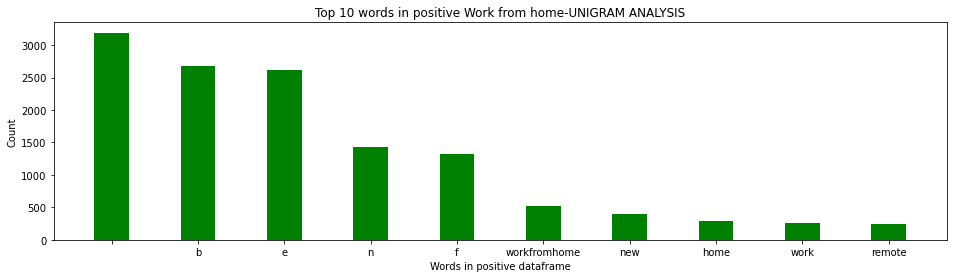

In [173]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive Work from home-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

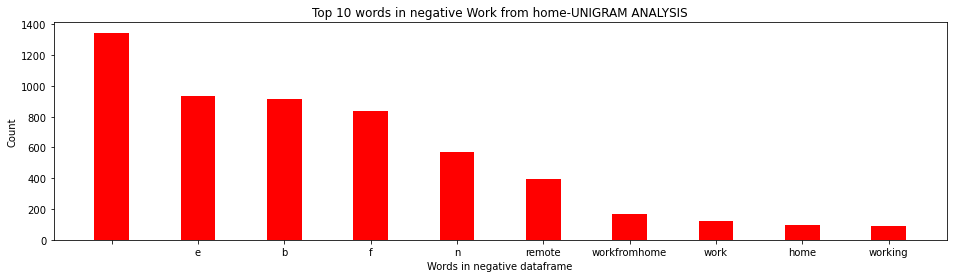

In [174]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative Work from home-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

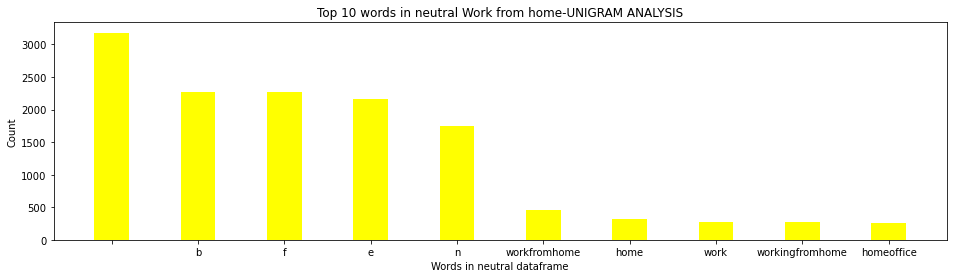

In [175]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral Work from home-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [176]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [177]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'nightlife', 'gokarna', 'eciting', 'filled', 'euberant', 'fun', 'entertainment', 'one', 'best', 'ways', 'e', '']
Sentence after removing stopwords: ['b', 'full', 'stack', 'software', 'engineer', 'nat', 'compass', 'pathways', 'nthe', 'full', 'stack', 'software', 'engineer', 'responsible', 'deliverin', 'e', '']
Sentence after removing stopwords: ['b', 'business', 'world', 'rapidly', 'changed', 'operating', 'models', 'response', 'pandemic', 'many', 'employees', 'needed', 'e', '']
Sentence after removing stopwords: ['b', 'cio', 'helena', 'nimmo', 'shares', 'thoughts', 'businesses', 'make', 'hybrid', 'work', 'success', 'best', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'full', 'stack', 'developer', 'unbounce', 'nare', 'passionate', 'building', 'reliable', 'scalable', 'systems', 'tackling', 'e', '']
Sentence after removing stopwords: ['b', 'much', 'wood', 'cozy', 'f', 'f', '', 'interesting', 'approach', 'layout', 'e', '', 'ef', 'b', '

Sentence after removing stopwords: ['b', 'cool', 'idea', 'nozbe', 'teams', 'future', 'section', 'resources', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'stop', 'youbelonghere', 'dedication', 'achieveyourgoals', 'motivated', 'success', 'doer', 'e', '']
Sentence after removing stopwords: ['b', 'thank', 'researchsquare', 'increase', 'congenital', 'syphilis', 'amp', 'number', 'pregnant', 'women', 'sero', 'positive', 'e', '']
Sentence after removing stopwords: ['b', 'c', 'aremote', 'real', 'estate', 'agent', 'e', '', '', 'role', 'available', 'amazing', 'candidates', 'ready', 'demonstrate', 'knowledge', 'e', '']
Sentence after removing stopwords: ['b', 'engage', 'pay', 'solutions', 'find', 'best', 'mortgage', 'deals', 'contractors', 'n']
Sentence after removing stopwords: ['b', 'best', 'ways', 'make', 'money', 'online', 'without', 'investment', 'n']
Sentence after removing stopwords: ['b', 'reaso

Sentence after removing stopwords: ['b', 'senior', 'full', 'stack', 'developer', 'rbc', 'nwhat', 'opportunity', 'rbc', 'business', 'financial', 'services', 'technology', 'operations', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'nif', 'thinking', 'upgrading', 'home', 'office', 'steer', 'clear', 'time', 'money', 'wasting', 'e', '']
Sentence after removing stopwords: ['b', 'statebarofnm', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'home', 'ends', 'tech', 'company', 'warns', 'talent', 'eodus', 'nread', 'full', 'story']
Sentence after removing stopwords: ['b', 'believe', 'make', 'haha', 'ohwhatthefunny', 'via', 'instagram', 'n', 'officememes', 'officememe', 'theofficememes', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'product', 'manager', 'high', 'education', 'nat', 'blackbaud', 'nsenior', 'product', 'manager', 'pr

Sentence after removing stopwords: ['b', 'list', 'today', 'e', '', '', 'ef', 'b', 'f', 'check', 'glass', 'dry', 'erase', 'notepads', 'give', 'clean', 'slate', 'time', 'wi', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'plans', 'available', 'good', 'ever', 'affordable', 'share', 'retweet', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'friday', 'f', 'f', 'today', 'got', 'collaborate', 'many', 'incredible', 'people', 'team', 'n', 'nhuman', 'engagement', 'gives', 'e', '']
Sentence after removing stopwords: ['b', 'dictionary', 'word', 'domain', 'looking', 'new', 'owner', 'pm', 'discuss', 'n', 'n', 'malinger', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', '

Sentence after removing stopwords: ['b', 'feeling', 'stuck', 'easy', 'strategies', 'get', 'back', 'track', 'n', 'n', 'midweekmotivation', 'contentcreator', 'webseries', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'looking', 'hire', 'remote', 'workers', 'company', 'use', 'pointers', 'find', 'top', 'candidates', 'n', 'hiring', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'midweight', 'u', 'ui', 'designer', 'kyero', 'n', 'vacancy', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'tools', 'need', 'effectively', 'work', 'remotely', 'employees', 'n', 'nhere', 'essent', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'catching', 'yesterday', 'early', 'music', 'show', 'bbcradio', 'lucieskeaping', 'orquestra', 'ba', 'e', '']
Sentence after removing stopwords: ['b', 'mindset', 'need', 'successful', 'remote', 'work', 'according', 'new', 'cambridge', 'study', 'wfh', 'n', 'gt', 'e', '']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'e', '', 'desk', 'today', 'fan', 'remote', 'working', 'ready', 'return', 'workplace', 'want', 'air', 'vie', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingsponsoring', 'internetmarketing', 'perfect', 'secrets', 'finding', 'potential', 'e', '']
Sentence after removing stopwords: ['b', 'go', 'space', 'hour', 'epic', 'futuristic', 'space', 'music', 'mi', 'epic', 'sci', 'fi', 'hy', 'via', 'youtube', 'e', '']
Sentence after removing stopwords: ['b', 'surprise', 'n', 'npeople', 'really', 'seen', 'benefit', 'work', 'life', 'balance', 'productivity', 'happin', 'e', '']
Sentence after removing stopwords: ['b', 'postly', 'fresh', 'new', 'method', 'designed', 'give', 'online', 'business', 'fast', 'proven', 'results', 'n', 'nget', 'today', 'plus', 'e', '']
Sentence after removing stopwords: ['b', 'looking', 'forward', 'owning', 'creative', 'studio', 'walk', 'custom', 'design', 'get', 'wor', 'e', '']
Sentence after removin

Sentence after removing stopwords: ['b', 'every', 'step', 'prefabricated', 'build', 'precisely', 'controlled', 'tested', 'eceed', 'factory', 'standards', 'e', '', '', 'every', 'piece', 'e', '']
Sentence after removing stopwords: ['b', 'thrilled', 'economy', 'smameter', 'tells', 'much', 'npower', 'using', 'e', '', 'e', '']
Sentence after removing stopwords: ['b', 'fuel', 'scr', 'systems', 'engineering', 'calibration', 'amp', 'controls', 'specialist', 'nat', 'general', 'motors', 'njob', 'description', 'summary', 'oppor', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'clients', 'cool', 'trick', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'indus

Sentence after removing stopwords: ['b', 'full', 'stack', 'software', 'engineer', 'applied', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e', '']
Sentence after removing stopwords: ['b', 'step', 'free', 'traffic', 'system', 'makes', 'us', 'per', 'day', 'works', 'even', 'zero', 'tech', 'skills', 'amp', 'zero', 'eperience', 'wa', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'money', 'watching', 'youtube', 'may', 'new', 'way', 'n', 'n', 'makemoneyonline', 'covid', 'e', '']
Sentence after removing stopwords: ['b', 'stop', 'focussing', 'pitfalls', 'simply', 'inspires', 'good', 'youbelonghere', 'e', '']
Sentence after removing stopwords: ['b', 'audioengine', 'speakers', 'deliver', 'high', 'quality', 'stereo', 'sound', 'desktop', 'hi', 'fi', 'system', 'suitable', 'wired', 'e', '']
Sentence after removing stopwords: ['b', 'right', 'light', 'right', 'time', 'everything', 'etraordinary', 'almostfriday', 'n', 'n', 'light', 'lazymorning', 'needcoffee', 'e', '']
Sentence after r

Sentence after removing stopwords: ['b', 'new', 'homeoffice', 'setup']
Sentence after removing stopwords: ['b', 'new', 'styles', 'added', 'sale', 'shop', 'winter', 'sale', 'get', 'favourite', 'styles', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'monitor', 'workingfromhome', 'n', 'n']
Sentence after removing stopwords: ['b', 'home', 'office', 'bar', 'caand', 'bartenders', 'talked', 'poured', 'favorite', 'thing', 'e', '']
Sentence after removing stopwords: ['b', 'join', 'koho', 'njean', 'gifted', 'get', 'started', 'koho', 'fee', 'spending', 'savings', 'account', 'ndo', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'twitter', 'marketing', 'tool', 'generates', 'instant', 'commissions', 'gt', 'gt', 'gt', 'affiliatebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'jesuschrist', 'workfromhome', 'bible', 'timemanagement', 'realitycheck', 'demon', 'obesity', 'n', 'e', '', 'f', 'f', 'f', 'bbco', 'f', 'f', 'avid', 'f', 'f', 'ab', 'germ', 'f', 'f', 'aany', 'f'

Sentence after removing stopwords: ['b', 'living', 'working', 'river', 'wonderful', 'photo', 'eel', 'catchers', 'house', 'norfolk', 'di', 'e', '']
Sentence after removing stopwords: ['b', 'sometimes', 'labeler', 'makes', 'huge', 'difference', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'b', 'ef', 'b', 'fjelly', 'comb', 'aims', 'bring', 'innovative', 'efficient', 'office', 'amp', 'home', 'equipment', 'known', 'ultra', 'slim', 'mice', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'full', 'stack', 'developer', 'open', 'remote', 'nat', 'moveworks', 'nsenior', 'full', 'stack', 'developer', 'moveworks', 'redefining', 'e', '']
Sentence after removing stopwords: ['b', 'trying', 'sign', 'early', 'friday', 'n', 'nmy', 'manager', 'sending', 'meeting', 'link', 'guess', 'karo', 'ham', 'kahan', 'hai', 'e', '']
Sentence after removing stopwords: ['b', 'design', 'professi

Sentence after removing stopwords: ['b', 'remote', 'working', 'new', 'normal', 'employees', 'prefer', 'working', 'home', 'study', 'employees', 'hrmanagers', 'newlifestyle', 'e', '']
Sentence after removing stopwords: ['b', 'legal', 'editor', 'rocket', 'lawyer', 'nabout', 'rocket', 'lawyer', 'believe', 'everyone', 'deserves', 'access', 'affordable', 'simple', 'lega', 'e', '']
Sentence after removing stopwords: ['b', 'blog', 'freely', 'sharing', 'stuff', 'learnt', 'years', 'whilst', 'online', 'workingfromhome', 'drop', 'e', '']
Sentence after removing stopwords: ['b', 'strong', 'amp', 'smart', 'need', 'offer', 'ncall', 'n', 'n', 'business', 'nairobi', 'kenya', 'kot', 'kenyamoore', 'e', '']
Sentence after removing stopwords: ['b', 'economic', 'office', 'wfh', 'pc', 'nperfect', 'pc', 'basic', 'needs', 'n', 'budgetpc', 'gamingpc', 'e', '']
Sentence after removing stopwords: ['b', 'swear', 'workfromhome', 'attire', 'feels', 'like', 'wearing', 'mullet', 'n', 'nwork', 'shion', 'top', 'nsweatpa

Sentence after removing stopwords: ['b', 'ocwr', 'provides', 'area', 'employees', 'legislative', 'branch', 'ability', 'remotely', 'securely', 'access', 'conf', 'e', '']
Sentence after removing stopwords: ['b', 'manufacturing', 'jobs', 'available', 'careerbarn', 'apply', 'manufacturing', 'team', 'member', 'full', 'time', 'amp', 'jobopenings', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'celtic', 'epic', 'fantasy', 'music', 'music', 'studying', 'reading', 'working', 'coding', 'via', 'youtube', 'e', '']
Sentence after removing stopwords: ['b', 'sell', 'high', 'ticket', 'programs', 'earn', 'daily', 'makemoneyonline', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'wrote', 'self', 'pitying', 'blog', 'early', 'year', 'deal', 'idea', 'civilservants', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'free', 'get', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'new', 

Sentence after removing stopwords: ['b', 'heyitsmefred', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'cthe', 'best', 'way', 'predict', 'future', 'create', 'e', '', 'n', 'nwe', 'offering', 'opportunity', 'become', 'wellness', 'coach', 'e', '']
Sentence after removing stopwords: ['b', 'wp', 'legal', 'briefcase', 'january', 'nsouth', 'african', 'businesses', 'face', 'costly', 'problem', 'e', '', '', 'getting', 'peopl', 'e', '']
Sentence after removing stopwords: ['b', 'dollarbiz', 'dollar', 'proven', 'year', 'paying', 'program', 'may', 'think', 'dollar', 'program', 'much', 'e', '']
Sentence after removing stopwords: ['b', 'post', 'ads', 'internet', 'often', 'reap', 'big', 'profits', 'cool', 'marketing', 'software', 'saves', 'e', '']
Sentence after removing stopwords: ['b', 'peer', 'peer', 'networking', 'offers', 'fleible', 'approach', 'develop', 'organiza

Sentence after removing stopwords: ['b', 'work', 'pub', 'offers', 'pubs', 'bars', 'amp', 'restaurant', 'near', 'mywateringhole', 'pubs', 'publife', 'workfrompub', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'australia', 'many', 'public', 'holidays', 'scrap', 'australia', 'day', 'go', 'work', 'n', 'nthat', 'way', 'celebrating', 'anythi', 'e', '']
Sentence after removing stopwords: ['b', 'course', 'pandemic', 'mental', 'health', 'deteriorated', 'significantly', 'amp', 'study', 'suggests', 'lack', 'separ', 'e', '']
Sentence after removing stopwords: ['b', 'mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'important', 'video', 'overview', 'reveals', 'proven', 'methods', 'start', 'e', '']
Sentence after removing stopwords: ['b', 'spending', 'time', 'home', 'time', 'homedecor', 'w', 'quotegifts', 'famous', 'quote', 'throwpillows', 'deals', 'discount', 'e', '']
Sentence after removing stopwords: ['b', 'junior', 'payroll', 'specialist', 'bdo', 'nputting', 'peopl

Sentence after removing stopwords: ['b', 'core', 'high', 'back', 'task', 'chair', 'c', 'f', 'f', '', 'c', 'aselling', 'fast', 'n', 'nbe', 'comfortable', 'productive', 'space', 'style', 'improve', 'yo', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'work', 'remotely', 'eperienced', 'python', 'django', 'contractor', 'full', 'time', 'stack', 'builders', 'e', '']
Sentence after removing stopwords: ['b', 'good', 'routine', 'working', 'home', 'lead', 'burnout', 'make', 'things', 'chaotic', 'presenting', 'routine', 'e', '']
Sentence after removing stopwords: ['b', 'taking', 'businesscasual', 'new', 'level', 'workingfromhome']
Sentence after removing stopwords: ['b', 'network', 'marketer', 'buy', 'real', 'downline', 'signups', 'mlm', 'business', 'mlm', 'networkmarketing', 'e', '']
Sentence after removing stopwords: ['b', 'top', 'reasons', 'get', 'medical', 'billing', 'amp', 'coding', 'medicalcoding', 'medicalbilling', 'workfromhome', 'jobs', 'wahm', 'moms', 'e', '']
Sentence after 

Sentence after removing stopwords: ['b', 'know', 'finding', 'job', 'tough', 'jnee', 'makes', 'easy', 'ever', 'n']
Sentence after removing stopwords: ['b', 'back', 'work', 'tomorrow', 'e', '', 'want', 'new', 'monitor', 'make', 'productive', 'great', 'guide', 'work', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'learn', 'make', 'money', 'online', 'learn', 'one', 'best', 'coaches', 'planet']
Sentence after removing stopwords: ['b', 'want', 'ease', 'pain', 'time', 'tracking', 'join', 'us', 'day', 'free', 'trial', 'software', 'today', 'credit', 'card', 'required', 'g', 'e', '']
Sentence after removing stopwords: ['b', 'plus', 'footrest', 'black', 'footrest', 'n', 'f', 'f', '', 'b', 'n', 'f', 'f', '', 'free', 'shipping', 'orders', 'n', 'n']
Sentence after removing stopwords: ['b', 'dollarbiz', 'dollar', 'proven', 'year', 'paying', 'program', 'may', 'think', 'dollar', 'program', 'much', 'e', '']
Sentence after removing stopwords: ['b', 'never', 'take', 'lunch', 'break', 'whilst',

Sentence after removing stopwords: ['b', 'social', 'media', 'eecutive', 'mrsbucket', 'bristol', 'workfromhome', 'hybridworking', 'n', 'ninfo', 'apply']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'finance', 'new', 'grad', 'position', 'remote', 'americas', 'shopify', 'n']
Sentence after removing stopwords: ['b', 'check', 'vintage', 'wilhold', 'large', 'thread', 'caddy', 'tc', 'original', 'bo', 'bo', 'mint', 'ebay', 'ebaysales', 'resell', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'original', 'artwork', 'shop', 'etsy', 'homeoffice', 'original', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'forum', 'workfromhome', 'onlinejobs', 'webtraffic', 'affiliatemarketingtips', 'e', '']
Sentence after removing stopwords: ['b', 'many', 'thanks', 'mobilepunch', 'amp', 'gee', 'eyedliwa', 'coverage', 'reformieltspolicy', 'n', 'nlet', 'continue', 'ask', 'e', '']
Sentence after removing stopwords: ['b', 'reason', 'people', 'prefer', 'workingfromhom

Sentence after removing stopwords: ['b', 'commit', 'becoming', 'blogger', 'first', 'test', 'water', 'n', 'blogger', 'blogging', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'fullstack', 'engineer', 'serverless', 'twilio', 'n', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'lawyers', 'representing', 'home', 'secretary', 'claim', 'blanket', 'policy', 'lawful', 'high', 'coucase', 'n', 'nthe', 'home', 'office', 'defended', 'e', '']
Sentence after removing stopwords: ['b', 'freaking', 'first', 'day', 'feels', 'like', 'last', 'workingfromhome']
Sentence after removing stopwords: ['b', 'new', 'property', 'alert', 'move', 'ready', 'property', 'perfect', 'growing', 'business', 'needing', 'move', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'love', 'work', 'workfromhome']
Sentence after removing stopwords: ['b', 'jesusarellanot', 'homeoffice', 'mean', 'lol']
Sentence after removing stopwords: ['b', 'eecutivesfreedom', 'offers

Sentence after removing stopwords: ['b', 'employee', 'working', 'home', 'may', 'able', 'claim', 'ta', 'relief', 'bills', 'pay', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'tricks', 'good', 'internet', 'speeds', 'n', 'n', 'wfh', 'workingfromhome', 'tech', 'lifehacks', 'tips', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'improve', 'home', 'office', 'eamples', 'recent', 'projects', 'included', 'new', 'office', 'spaces', 'e', '']
Sentence after removing stopwords: ['b', 'productive', 'workspace', 'upstairs', 'tiny', 'home', 'office', 'great', 'views', 'lighting', 'ambiance', 'perfect', 'e', '']
Sentence after removing stopwords: ['b', 'ataia', 'raredisease', 'patient', 'charity', 'wales', 'n', 'workingfromhome', 'hotdesk', 'checking', 'ready', 'e', '']
Sentence after removing stopwords: ['b', 'wait', 'long', 'search', 'get', 'best', 'virtual', 'office', 'space', 'right']
Sentence after removing stopwords: ['b', 'new', 'app', 'inspired', 'origin

Sentence after removing stopwords: ['b', 'team', 'tops', 'needs', 'supremely', 'smaand', 'fantastically', 'fun', 'software', 'developer', 'join', 'soon', 'possible', 'n', 'nwork', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'laptop', 'stands', 'buy', 'reviews', 'electronics', 'monk', 'n', 'nfor', 'details']
Sentence after removing stopwords: ['b', 'get', 'aprinted', 'awesome', 'products', 'suppome', 'redbubble', 'rbandme', 'findyourthing', 'e', '']
Sentence after removing stopwords: ['b', 'innovating', 'way', 'success', 'working', 'smaand', 'delivering', 'results', 'n', 'digitalmarketing', 'digitalage', 'e', '']
Sentence after removing stopwords: ['b', 'coming', 'soon', 'welcome', 'heaven', 'earth', 'n', 'luury', 'luuryestates', 'luuryhomes', 'luurylifestyle', 'dreamhome', 'e', '']
Sentence after removing stopwords: ['b', 'time', 'energy', 'focus', 'resources', 'disposal', 'every', 'day', 'noel', 'dejusus', 'n', 'great', 'resources', 'f', 'f', 'e', '']
Sentence after remo

Sentence after removing stopwords: ['b', 'free', 'training', 'get', 'first', 'fb', 'fans', 'step', 'system', 'turn', 'new', 'k', 'fans', 'customers', 'e', '']
Sentence after removing stopwords: ['b', 'free', 'leads', 'sign', 'ups', 'figures', 'affiliate', 'commissions', 'anyone', 'joined', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'gain', 'essential', 'people', 'management', 'skills', 'motivate', 'inspire', 'performance', 'modern', 'workplace', 'e', '']
Sentence after removing stopwords: ['b', 'save', 'home', 'office', 'furniture', 'friendly', 'office', 'sold', 'toofair', 'toofairllc', 'homeoffice', 'officefurniture']
Sentence after removing stopwords: ['b', 'high', 'paying', 'online', 'platform', 'ysense', 'n', 'n', 'workingfromhome', 'moneytalks', 'makemoneyonline']
Sentence after removing stopwords: ['b', 'good', 'way', 'stathe', 'year', 'mga', 'la', 'teas', 'today', 'f', 'f', '', 'aa', 'let', 'go', 'team', 'n', 'n', 'powellagency', 'e', '']
Sentence after removi

Sentence after removing stopwords: ['b', 'set', 'rules', 'know', 'best', 'makes', 'efficient', 'happy', 'e', 'c', 'c', 'ef', 'b', 'f', 'n', 'nwhat', 'favorite', 'place', 'work', 'f', 'f', 'b', 'b', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'medical', 'careers', 'work', 'life', 'balance', 'medical', 'careers', 'workfromhome', 'jobs', 'wahm', 'moms', 'e', '']
Sentence after removing stopwords: ['b', 'everblocks', 'shelving', 'allows', 'design', 'storage', 'meets', 'needs', 'love', 'person', 'displayed', 'e', '']
Sentence after removing stopwords: ['b', 'available', 'interiors', 'decorations', 'accessories', 'akurehowfar', 'gistreel', 'futaradiofm', 'tundeeddnut', 'e', '']
Sentence after removing stopwords: ['b', 'looking', 'invest', 'good', 'quality', 'ergonomic', 'office', 'chair', 'go']
Sentence after removing stopwords: ['b', 'contemporary', 'traditional', 'style', 'n', 'homeoffice', 'fittedkitchen', 'fittedfurniture', 'bespokefurniture']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'blogger', 'stawith', 'easy', 'links', 'generate', 'income', 'n']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'sales', 'analytics', 'analyst', 'gitlab', 'n', 'remotejob', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'really', 'glad', 'collaborators', 'high', 'consideration', 'us', 'nalways', 'grateful', 'always', 'working', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'stopped', 'companies', 'earning', 'high', 'benefits', 'snatching', 'employees', 'personal', 'lif', 'e', '']
Sentence after removing stopwords: ['b', 'pc', 'suddenly', 'hot', 'tech', 'technews', 'computers', 'computing', 'desktops', 'wfh', 'e', '']
Sentence after removing stopwords: ['b', 'subscribed', 'youtube', 'channel', 'yet', 'n', 'nclick', 'subscribe', 'get', 'hundreds', 'free', 'training', 'videos', 'e', '']
Sentence after removing stopwords: ['b', 'getting', 'steps', 'much', 'workfromhome', 'happening', 'especi

Sentence after removing stopwords: ['b', 'get', 'insider', 'access', 'free', 'traffic', 'shotgun', 'system', 'letsgooilers', 'e', '']
Sentence after removing stopwords: ['b', 'recent', 'blog', 'post', 'outlines', 'great', 'zoom', 'alternatives', 'ios', 'link', 'bio', 'n', 'n', 'macking', 'zoom', 'workingfromhome']
Sentence after removing stopwords: ['b', 'calls', 'uk', 'suspend', 'e', '', 'golden', 'visas', 'e', '', '', 'fast', 'tracking', 'russian', 'millionaires', 'russia', 'e', '']
Sentence after removing stopwords: ['b', 'episode', 'impact', 'job', 'talk', 'talk', 'employers', 'best', 'leverage', 'remote', 'workers', 'find', 'retain', 'e', '']
Sentence after removing stopwords: ['b', 'winter', 'work', 'love', 'view', 'joanie', 'homeoffice', 'colorado', 'hope', 'take', 'time', 'e', '']
Sentence after removing stopwords: ['b', 'energy', 'blend', 'give', 'boost', 'deserve', 'best', 'e', '', 'n', 'e', '', 'n', 'vitamincoffee', 'e', '']
Sentence after removing stopwords: ['b', 'real', '

Sentence after removing stopwords: ['b', 'best', 'online', 'remote', 'jobs', 'beginners', 'e', '', 'n', 'e', '', 'nconnect', 'marketerdna', 'e', '', 'n', 'e', '', 'n', 'workfromhome', 'workfromhomemom', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'early', 'morning', 'walk', 'really', 'sets', 'day', 'ahead', 'get', 'energised', 'day', 'e', '']
Sentence after removing stopwords: ['b', 'partner', 'payroll', 'adp', 'nat', 'adp', 'driven', 'success', 'engage', 'unique', 'talents', 'perspectives', 'welco', 'e', '']
Sentence after removing stopwords: ['b', 'pandemic', 'many', 'us', 'started', 'work', 'home', 'started', 'work', 'coworking', 'spaces', 'n', 'n', 'e', 'e', 'ef', 'b', 'fhow', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'member', 'golf', 'improving', 'golf', 'game', 'golf', 'top', 'live', 'search', 'results', 'world', 'e', '']
Sentence after removing stopwords: ['b', 'lot', 'entrepreneurs', 'people', 'everyday', 'life', 'e', '', 'focus', 'time', 

Sentence after removing stopwords: ['b', 'senior', 'devops', 'engineer', 'e', '', '', 'full', 'remote', 'heetch', 'paris', 'france', 'allows', 'remote', 'remotejobs', 'e', '']
Sentence after removing stopwords: ['b', 'fun', 'work', 'called', 'blogging', 'n', 'bloggers', 'blogweb', 'e', '']
Sentence after removing stopwords: ['b', 'solicitor', 'employment', 'law', 'award', 'winning', 'firm', 'nat', 'recruitment', 'genius', 'npedigree', 'legal', 'top', 'tier', 'awardwinning', 'e', '']
Sentence after removing stopwords: ['b', 'comfortable', 'ergonomic', 'amp', 'high', 'quality', 'office', 'seating', 'designed', 'suppoyour', 'sit', 'contact', 'sales', 'zonman', 'cn', 'mor', 'e', '']
Sentence after removing stopwords: ['b', 'kawvalley', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'modern', 'single', 'handle', 'bathroom', 'faucet', 'n', 'e', 'e', 'e', 'e', 'e', 'e', 

Sentence after removing stopwords: ['b', 'modern', 'study', 'room', 'interior', 'design', 'n', 'n', 'contact', 'us', 'n', 'visit', 'websites']
Sentence after removing stopwords: ['b', 'man', 'bus', 'business', 'meeting', 'phone', 'see', 'hear', 'complete', 'spreadsheets', 'e', '']
Sentence after removing stopwords: ['b', 'brand', 'new', 'billion', 'dollar', 'loophole', 'npays', 'every', 'day', 'n', 'simply', 'copy', 'amp', 'pasting', 'online', 'e', '']
Sentence after removing stopwords: ['b', 'first', 'steps', 'always', 'baby', 'steps', 'via', 'youtube', 'n', 'n', 'motivation', 'sales', 'salestraining', 'e', '']
Sentence after removing stopwords: ['b', 'jonlusky', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'projects', 'organization', 'open', 'accessible', 'eception', 'shared', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'jameshicks', 'particular', '

Sentence after removing stopwords: ['b', 'new', 'collection', 'meet', 'dinah', 'womensfashion', 'giftsforher', 'giftidea', 'workingfromhome', 'shoppingday', 'e', '']
Sentence after removing stopwords: ['b', 'lifevantage', 'mlm', 'review', 'really', 'make', 'money', 'lifevantage']
Sentence after removing stopwords: ['b', 'else', 'wants', 'free', 'cash', 'generating', 'websites', 'month', 'pay', 'daily', 'join', 'e', '']
Sentence after removing stopwords: ['b', 'characteristics', 'successful', 'entrepreneur', 'f', 'f', '', 'n', 'nwe', 'looking', 'freshers', 'n', 'work', 'home', 'n', 'digita', 'e', '']
Sentence after removing stopwords: ['b', 'customer', 'happiness', 'supporter', 'remote', 'vollzeit', 'w', 'homeoffice', 'fest', 'n', 'clientsuccess', 'clienthappiness', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'tip', 'e', '', 'generally', 'reason', 'work', 'time', 'zone', 'physical', 'time', 'zone', 'match', 'e', '']
Sentence after removing stopwords: ['b', 'fantast

Sentence after removing stopwords: ['b', 'create', 'good', 'karma', 'n', 'workfromhomelife', 'techfemalefounders', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', 'vacancies', 'ale', 'f', 'f', 'n', 'nin', 'colombo', 'e', '', 'popular', 'bpo', 'hiring', 'people', 'dm', 'details', 'n', 'n', 'school', 'leavers', 'apply', 'n', 'np', 'e', '']
Sentence after removing stopwords: ['b', 'clouddoor', 'softwaredevelopment', 'true', 'f', 'f', '', '', 'n', 'n', 'softwaredevelopment', 'webdeveloper', 'programming', 'corporate', 'e', '']
Sentence after removing stopwords: ['b', 'although', 'prefer', 'omnifocus', 'anything', 'really', 'work', 'know', 'need', 'accomplish', 'n', 'n', 'nooffice', 'e', '']
Sentence after removing stopwords: ['b', 'google', 'searches', 'popular', 'homeoffice', 'products', 'skyrocketed', 'reveal', 'essentials', 'demand', 'e', '']
Sentence after removing stopwords: ['b', 'risapesapane', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 're

Sentence after removing stopwords: ['b', 'make', 'money', 'earn', 'free', 'traffic', 'buying', 'traffic', 'affiliate', 'marketing', 'via', 'e', '']
Sentence after removing stopwords: ['b', 'feng', 'shui', 'home', 'office', 'working', 'home', 'become', 'standard', 'many', 'people', 'pandemic', 'make', 'e', '']
Sentence after removing stopwords: ['b', 'spend', 'evening', 'clearing', 'qc', 'tasks', 'lots', 'work', 'available', 'right', 'n', 'n', 'remoteqc', 'audiofiles', 'workfromhome', 'crowdsurf']
Sentence after removing stopwords: ['b', 'curly', 'maple', 'professional', 'medium', 'weight', 'wood', 'professional', 'pen', 'homeoffice']
Sentence after removing stopwords: ['b', 'rookie', 'mistake', 'e', '', 'aeating', 'cheesesteak', 'lunch', 'special', 'right', 'pm', 'meeting', 'sooooo', 'tired', 'f', 'f', 'f', 'f', 'f', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'thi', 'e', '']
Sentence after removing stopwords: ['b', 'peer', 'peer', 'networking', 'offers', 'fleible', 'approach', 'develop', 'o

Sentence after removing stopwords: ['b', 'operation', 'convegarage', 'office', 'success', 'homeoffice', 'wfhlife']
Sentence after removing stopwords: ['b', 'investors', 'plans', 'amp', 'money', 'magnificent', 'gift', 'earnmoneyonline', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'today', 'fresh', 'work', 'home', 'job', 'leads', 'live', 'workathome', 'workfromhome', 'workathomejobs', 'workfromhomejobs', 'moms', 'e', '']
Sentence after removing stopwords: ['b', 'daily', 'earn', 'money', 'online', 'easy', 'way', 'beginners']
Sentence after removing stopwords: ['b', 'medium', 'complete', 'firm', 'favourite', 'much', 'offer', 'e', '', 'n', 'e', '', 'n']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingrecruiting', 'mlmleads', 'today', 'times', 'easy', 'get', 'loads', 'outstanding', 'pote', 'e', '']
Senten

Sentence after removing stopwords: ['b', 'senior', 'software', 'engineer', 'orca', 'security', 'nabout', 'youbachelors', 'degree', 'computer', 'science', 'engineering', 'relevant', 'ep', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'love', 'e', 'c', 'n', 'n', 'workfromhome', 'workstation', 'aesthetic']
Sentence after removing stopwords: ['b', 'beautiful', 'stationery', 'businesses', 'nfind', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'e', 'c', 'today', 'e', '', 'agent', 'spotlight', 'e', 'c', 'n', 'ncongratulations', 'outstanding', 'weekend', 'hector', 'n', 'nwe', 'love', 'watching', 'grow', 'e', '']
Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'altering', 'working', 'patterns', 'across', 'many', 'sectors', 'common', 'ever', 'employees', 'e', '']
Sentence after removing stopwords: ['b', 'recently', 'solarpanels', 'installed', 'home', 'nthis', 'droneshot', 'originally', 'worked', 'ngreat', 'see', 'e', '']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'backend', 'engineer', 'full', 'stack', 'eperis', 'neperis', 'manpower', 'company', 'engaged', 'one', 'health', 'wellness', 'fitn', 'e', '']
Sentence after removing stopwords: ['b', 'discover', 'sta', 'siphoning', 'high', 'ticket', 'pop', 'online', 'commissions', 'today', 'join']
Sentence after removing stopwords: ['b', 'homeoffice', 'uniforms', 'simply', 'classic', 'amp', 'chic', 'n', 'blackandwhite', 'sustainablymade', 'n', 'duettenyc', 'navailable', 'thru', 'th', 'e', '']
Sentence after removing stopwords: ['b', 'launching', 'net', 'week', 'honesty', 'opal', 'blue', 'new', 'essence', 'collection', 'n', 'n', 'wallcoverings', 'newcollection', 'e', '']
Sentence after removing stopwords: ['b', 'according', 'needs', 'provide', 'professional', 'job', 'board', 'job', 'posting', 'job', 'search', 'recruitment', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
S

Sentence after removing stopwords: ['b', 'systems', 'administrator', 'vtm', 'group', 'njob', 'description', 'salary', 'vtm', 'group', 'large', 'hightech', 'firm', 'beaverton', 'area', 'see', 'e', '']
Sentence after removing stopwords: ['b', 'could', 'fire', 'boss', 'live', 'dream', 'e', 'waiter', 'yes', 'could', 'watch', 'e', '']
Sentence after removing stopwords: ['b', 'interested', 'learning', 'design', 'team', 'help', 'revamp', 'home', 'office', 'space', 'contact', 'us', 'e', '']
Sentence after removing stopwords: ['b', 'dropshipping', 'work', 'nif', 'e', '', 'curious', 'powerful', 'marketing', 'strategy', 'dropshipping', 'si', 'e', '']
Sentence after removing stopwords: ['b', 'devisridhar', 'mansukhmandviya', 'nandalipika', 'nincrease', 'congenital', 'syphilis', 'amp', 'pregnant', 'women', 'sero', 'positivity', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'printers', 'home', 'use', 'n', 'nfor', 'details', 'bestprinter', 'e', '']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'us', 'solve', 'great', 'resignation', 'create', 'good', 'jobs', 'labor', 'secretary', 'marty', 'walsh', 'says']
Sentence after removing stopwords: ['b', 'affiliate', 'marketing', 'fast', 'way', 'multiple', 'streams', 'income', 'n', 'nwant', 'stabuilding', 'great', 'online', 'busin', 'e', '']
Sentence after removing stopwords: ['b', 'aws', 'java', 'full', 'stack', 'developer', 'nat', 'cognizant', 'n', 'aws', 'full', 'stack', 'developer', 'remote', 'location', 'canada', 'must', 'legally', 'au', 'e', '']
Sentence after removing stopwords: ['b', 'full', 'stack', 'developer', 'nat', 'daysmasoftware', 'llc', 'ndash', 'platform', 'daysmasoftware', 'company', 'serving', 'sports', 'facili', 'e', '']
Sentence after removing stopwords: ['b', 'message', 'want', 'work', 'home', 'time', 'real', 'job', 'bs', 'scheme', 'nonsense', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'tips', 'help', 'eat', 'healthy', 'workingfromhome', 'n', 'nfu

Sentence after removing stopwords: ['b', 'advanced', 'technology', 'security', 'n', 'n', 'tvg', 'tvgcoin', 'cryptocurrency', 'vinda', 'earn', 'workfromhome', 'investment', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'wfh', 'stay', 'e', '', 'helping', 'keep', 'workers', 'safe', 'cyber', 'crime', 'n', 'nthe', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'willing', 'work', 'n', 'nbecome', 'paof', 'best', 'business', 'ever', 'e', '']
Sentence after removing stopwords: ['b', 'many', 'productivity', 'books', 'focus', 'person', 'middle', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'movement', 'desk', 'head', 'neck', 'balance', 'please', 'enjoy', 'minute', 'eercise', 'important', 'take', 'breaks', 'e', '']
Sentence after removing stopwords: ['b', 'artgarzajr', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'work

Sentence after removing stopwords: ['b', 'end', 'week', 'wearecitizensadvice', 'citizensassw', 'would', 'like', 'say', 'huge', 'thankyou', 'volunteers', 'e', '']
Sentence after removing stopwords: ['b', 'great', 'imagination', 'workplace', 'n', 'business', 'vp', 'businessnews', 'hybridwork', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhomewednesday', 'today', 'checking', 'aaron', 'vertdesk', 'v', 'setup', 'great', 'use', 'desk', 'e', '']
Sentence after removing stopwords: ['b', 'great', 'meeting', 'ellie', 'datafle', 'assmannuk', 'studio', 'manchester', 'super', 'products', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'youtube', 'vid', 'might', 'like', 'free', 'get', 'paid', 'seconds', 'workathome', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'first', 'monday', 'vacation', 'f', 'f', '', 'sorting', 'mailbo', 'cleaning', 'backlogs', 'sometimes', 'think', 'good', 'e', '', 'took', 'e', '']
Sentence after removing stopwords: ['b', 'n

Sentence after removing stopwords: ['b', 'eternalizing', 'thoughts', 'list', 'helps', 'free', 'mind', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'happy', 'wednesday', 'pamelafoland', 'selfie', 'smile', 'homewithmypets', 'workingfromhome', 'fiverrseller', 'readyfortheday', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'e', '', 'google', 'dreary', 'office', 'e', '', 'wake', 'new', 'thinking', 'e', '']
Sentence after removing stopwords: ['b', 'discover', 'image', 'income', 'methods', 'anyone', 'use', 'make', 'money', 'free', 'images', 'starting', 'today', 'wi', 'e', '']
Sentence after removing stopwords: ['b', 'happy', 'friday', 'e', '', 'e', '', 'come', 'log', 'week', 'workflow', 'pgemp', 'workfromhomelife', 'f', 'f', '', '

Sentence after removing stopwords: ['b', 'c', 'acortips', 'nwork', 'area', 'nworking', 'home', 'norm', 'half', 'worldwide', 'population', 'amid', 'many', 'homely', 'sett', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'software', 'engineer', 'billing', 'l', 'twilio', 'n', 'remotejob', 'workfromhome']
Sentence after removing stopwords: ['b', 'try', 'f', 'f', 'f', '', 'luck', 'f', 'f', '', 'f', 'f', '', 'every', 'hour', 'f', 'f', '', 'af', 'f', 'f', '', '', 'playing', 'f', 'f', 'e', 'ae', 'f', 'f', '', 'b', 'simple', 'f', 'f', '', '', 'f', 'f', '', 'game', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'af', 'f', 'f', '', 'could', 'win', 'f', 'f', '', 'bd', 'e', '', '', 'free', 'f', 'f', '', '', 'bit', 'e', '']
Sentence after removing stopwords: ['b', 'nodejs', 'developer', 'resourcesoft', 'inc', 'nrequirements', 'years', 'eperience', 'full', 'stack', 'developer', 'eperience', 'e', '']
Sentence after removing stopwords: ['b', 'accept', 'success', 'nit', '

Sentence after removing stopwords: ['b', 'team', 'earning', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'f', 'f', '', '', 'n', 'nlet', 'take', 'action', 'f', 'f', '', 'f', 'f', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'f', 'f', 'f', 'bb', 'e', '', 'f', 'f', '', 'bb', 'n', 'n', 'e', 'c', '', 'digitalmarketingtips', 'startup', 'success', 'businessowner', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'zoom', 'video', 'calls', 'well', 'good', 'find', 'situation', 'ca', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'amid', 'rising', 'number', 'cases', 'lot', 'us', 'back', 'wfh', 'may', 'hectic', 'many', 'us', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'sure', 'whose', 'looking', 'today', 'duvetday', 'workingfromhome', 'anietylife', 'dogmom']
Sentence after removing stopwords: ['b', 'recent', 'c

Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'e', 'e', 'ef', 'b', 'f', 'learn', 'plus', 'e', '']
Sentence after removing stopwords: ['b', 'willstaney', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'gm', 'coffee', 'time', 'catsontwitter', 'lol', 'nftcommunity', 'workingfromhome', 'coffeetime']
Sentence after removing stopwords: ['b', 'corporate', 'commercial', 'legal', 'advisor', 'nat', 'reed', 'ncorporate', 'commercial', 'legal', 'advisor', 'location', 'london', 'sector', 'independent', 'bo', 'e', '']
Sentence after removing stopwords: ['b', 'handsome', 'grade', 'ii', 'listed', 'bedroom', 'late', 'georgian', 'house', 'providing', 'spacious', 'accommodation', 'together', 'detac', 'e', '']
Sentence after removing stopwords: ['b', 'government', 'long', 'askin

Sentence after removing stopwords: ['b', 'top', 'tips', 'improve', 'amazon', 'earnings', 'laptoplifestyle', 'wealthy', 'travel', 'e', '']
Sentence after removing stopwords: ['b', 'nice', 'video', 'related', 'free', 'get', 'paid', 'seconds', 'workathome', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'ordered', 'writers', 'toolkit', 'lots', 'great', 'forms', 'templates', 'amp', 'checklists', 'keep', 'track', 'amp', 'organized', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'upgrade', 'aesthetic', 'desk', 'leon', 'scribalu', 'rose', 'gold', 'rollerball', 'pen', 'gt', 'gt']
Sentence after removing stopwords: ['b', 'successes', 'online', 'take', 'one', 'sharp', 'often', 'like', 'guide', 'right']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'means', 'buying', 'books

Sentence after removing stopwords: ['b', 'renewal', 'analyst', 'sun', 'life', 'nyou', 'unique', 'background', 'eperience', 'point', 'view', 'youll', 'encoura', 'e', '']
Sentence after removing stopwords: ['b', 'markjhooper', 'surely', 'fundamental', 'amp', 'irreversible', 'shift', 'way', 'work', 'avoids', 'daily', 'comm', 'e', '']
Sentence after removing stopwords: ['b', 'nice', 'video', 'related', 'free', 'get', 'paid', 'daily', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'lead', 'software', 'quality', 'engineer', 'nat', 'ln', 'telecom', 'nlead', 'software', 'quality', 'engineer', 'ln', 'telecom', 'fantastic', 'opport', 'e', '']
Sentence after removing stopwords: ['b', 'freelance', 'f', 'f', '', 'aa', 'f', 'f', '', 'aa', 'f', 'f', '', 'aacan', 'work', 'sunday', 'n', 'nalso', 'f'

Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'deal', 'desk', 'specialist', 'gitlab', 'n', 'vacancy', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'staselling', 'printables', 'printly', 'today', 'n', 'nget', 'free', 'bonus', 'software', 'gt']
Sentence after removing stopwords: ['b', 'new', 'rules', 'could', 'prevent', 'thousands', 'refugees', 'joining', 'close', 'family', 'uk', 'tuesday', 'e', '']
Sentence after removing stopwords: ['b', 'oh', 'easy', 'make', 'useful', 'home', 'biz', 'workfromhome', 'mlmtools']
Sentence after removing stopwords: ['b', 'need', 'etra', 'money', 'workfromhome', 'nour', 'system', 'easy', 'use', 'telemarketing', 'selling', 'nset', 'hours', 'e', '']
Sentence after removing stopwords: ['b', 'inside', 'build', 'figure', 'line', 'business', 'free', 'platform', 'join']
Sentence after removing stopwords: ['b', 'net', 'week', 'topic', 'n', 'n', 'f', 'f', 'mentalhealth', 'amp', 'supporting', 'employees', 'f', 'f', 'n', 'espe

In [178]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'javascript', 'developer', 'hybrid', 'model', 'office', 'vs', 'remote', 'nat', 'summit', 'group', 'solutions', 'llc', 'njavascript', 'developer', 'locat', 'e', '']
Sentence after removing stopwords: ['b', 'morning', 'f', 'f', '', 'homeoffice', 'realized', 'small', 'desk']
Sentence after removing stopwords: ['b', 'forsage', 'illegal', 'ndo', 'check', 'video', 'clear', 'doubts', 'also', 'information', 'contact', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'dark', 'side', 'hustling', 'n', 'n', 'bloggingcommunity', 'writingcommunity', 'workingfromhome', 'digitalnomad']
Sentence after removing stopwords: ['b', 'shes', 'right', 'nand', 'theres', 'nothing', 'wrong', 'n', 'n', 'solidity', 'web', 'blockchaingaming', 'softwaredevelopment', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'late', 'medium', 'piece', 'impact', 'working', 'grubhub', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'actively', 'seeking

Sentence after removing stopwords: ['b', 'stages', 'wfhlife', 'winter', 'nfeeling', 'bit', 'chilly', 'nwondering', 'second', 'jumper', 'ncan', 'type', 'hot', 'mug', 'cr', 'e', '']
Sentence after removing stopwords: ['b', 'people', 'services', 'administrator', 'vacancy', 'asknationwide', 'fleible', 'remote', 'n', 'napply']
Sentence after removing stopwords: ['b', 'curious', 'know', 'n', 'ntell', 'us', 'space', 'integrate', 'home', 'office', 'pandemic', 'e', '']
Sentence after removing stopwords: ['b', 'well', 'hello', 'little', 'owl', 'n', 'n', 'workfromhome', 'n', 'lookingforbreakfast']
Sentence after removing stopwords: ['b', 'digital', 'account', 'eecutive', 'e', '', '', 'remote', 'us', 'canada', 'meico']
Sentence after removing stopwords: ['b', 'morning', 'relaing', 'music', 'f', 'f', '', '', 'nature', 'pictures', 'stress', 'relief', 'nostalgic', 'calm', 'via', 'youtube', 'e', '']
Sentence after removing stopwords: ['b', 'anyway', 'one', 'team', 'forced', 'work', 'home', 'boring', '

Sentence after removing stopwords: ['b', 'work', 'long', 'restricted', 'four', 'walls', 'office', 'work', 'anywhere', 'still', 'productive', 'e', '']
Sentence after removing stopwords: ['b', 'got', 'mid', 'week', 'hard', 'work', 'net', 'day', 'f', 'f', 'b', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'workfromhome', 'feeling', 'tired', 'sometime', 'sitting', 'chair', 'f', 'f', 'aa', '', 'whole', 'day', 'like', 'bump', 'flat', 'shape', 'nwha', 'e', '']
Sentence after removing stopwords: ['b', '', 'base', 'ready', 'garden', 'building', 'gcore', 'recycled', 'plastic', 'bases', 'installed', 'uk', 'e', '']
Sentence after removing stopwords: ['b', 'sr', 'lead', 'site', 'reliability', 'engineer', 'observability', 'e', '', '', 'cisco', 'meraki', 'source', 'coders', 'inc', 'allows', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'profit', 'squirrel', 'scam', 'matched', 'betting', 'gone', 'wrong', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarke

Sentence after removing stopwords: ['b', 'every', 'business', 'big', 'small', 'story', 'n', 'n', 'smallbusiness', 'workfromhome', 'piccolosolutions']
Sentence after removing stopwords: ['b', 'take', 'bojackhorseman', 'wait', 'late', 'getfamous', 'late', 'n', 'hollywood', 'wait', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'broken', 'arrow', 'oklahoma']
Sentence after removing stopwords: ['b', 'epic', 'small', 'home', 'office', 'transformation', 'work', 'home', 'inspo', 'weekend', 'vlog', 'video', 'remoteoffice', 'workfromhome']
Sentence after removing stopwords: ['b', 'facilities', 'management', 'works', 'co', 'ordinator', 'remote', 'working', 'leeds', 'mail', 'centre', 'royalmail', 'n', 'n', 'leedsjobs', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'see', 'many', 'people', 'focusing', 'helping', 'wrong', 'people', 'time', 'jimrohn', 'waste', 'energy', 'enthu', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', 'algolia', 'hiring', 'rem

Sentence after removing stopwords: ['b', 'senior', 'accountant', 'remote', 'nat', 'liberty', 'personnel', 'services', 'inc', 'nk', 'looking', 'transition', 'audit', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'grunt', 'maven', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'beon', 'consult', 'gmbh', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '', 'remote', 'n', 'napply', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', '', 'notarize', 'hiring', 'remote', 'senior', 'visual', 'designer', 'notarize', 'remotework', 'remotejob', 'workfromhome', 'adobecc', 'e', '']
Sentence after removing stopwords: ['b', 'setbacks', 'reminder', 'e', '', 'success', 'slow', 'motion', 'youbelonghere', 'dedication', 'e', '']
Sentence after removing stopwords: ['b', 'badabababa', 'remote', 'work', 'life', 'lovin', 'n', 'developer', 'workfromhome', 'cashapptaes']
Sentence a

Sentence after removing stopwords: ['b', 'shabbychic', 'crazy', 'important', 'paof', 'writing', 'routine', 'f', 'f', '', '', 'chalkpaint', 'painting', 'homedecor', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'green', 'remote', 'working', 'using', 'novacloud', 'demand', 'azure', 'help', 'organisation', 'transition', 'carb', 'e', '']
Sentence after removing stopwords: ['b', 'another', 'piece', 'feedback', 'week', 'mental', 'health', 'managers', 'workshop', 'n', 'n', 'humanresources', 'e', '']
Sentence after removing stopwords: ['b', 'back', 'end', 'developer', 'e', 'python', 'imaginary', 'cloud', 'allows', 'remote', 'remotejobs', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'sorry', 'rteprimetime', 'hear', 'guest', 'saying', 'governments', 'weak', 'working', 'home', 'legislation', 'e', '']
Sentence after removing stopwords: ['b', 'another', 'day', 'working', 'home', 'f', 'f', '', '', 'least', 'get', 'make', 'yummy', 'lunch', 'instead', 'microwave

Sentence after removing stopwords: ['b', 'work', 'home', 'impacting', 'mentalhealth', 'people', 'feel', 'less', 'connected', 'colleagues', 'find', 'di', 'e', '']
Sentence after removing stopwords: ['b', 'sales', 'eecutive', 'nat', 'midas', 'selection', 'midlands', 'limited', 'nsales', 'eecutive', 'location', 'work', 'home', 'based', 'anywhere', 'e', '']
Sentence after removing stopwords: ['b', 'another', 'gcore', 'base', '', 'installed', 'ready', 'madison', 'nordic', 'garden', 'building', 'n', 'n', 'gardenbuilding', 'e', '']
Sentence after removing stopwords: ['b', 'devops', 'engineer', 'flyr', 'inc', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'back', 'end', 'developer', 'building', 'first', 'artificial', 'intelligence', 'platform', 'drug', 'e', '']
Sentence after removing stopwords: ['b', 'u', 'designer', 'f', 'heidelbergcement', 'ag', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e', '']

Sentence after removing stopwords: ['b', 'working', 'someone', 'else', 'person', 'made', 'shit', 'loads', 'money', 'e', '', 'nare', 'done', 'working', 'someone', 'el', 'e', '']
Sentence after removing stopwords: ['b', 'biztips', 'workfromhome', 'circumstances', 'eperience', 'tough', 'time', 'delivering', 'views', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'junior', 'e', '', '', 'epress', 'projectmanagement', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'avanade', 'portugal', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'media', 'campaign', 'manager', 'olg', 'nmedia', 'campaign', 'manager', 'game', 'ndash', 'olg', 'needs', 'wersquove', 'said', 'game', 'mean', 'e', '']
Sentence after removing stopwords: ['b', 'ruby', 'engineer', 'canada', 'remote', 'fullscript', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e', '']

Sentence after removing stopwords: ['b', 'people', 'ready', 'get', 'f', 'f', '', 'b', 'without', 'bunch', 'tired', 'ecuses', 'n', 'network', 'networkmarketing', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'else', 'one', 'days', 'e', '', 'still', 'working', 'wan', 'na', 'cry', 'f', 'f', '', 'ad', 'f', 'f', '', 'ad', 'f', 'f', '', 'ad', 'f', 'f', '', 'ad', 'wednesday', 'workfromhome']
Sentence after removing stopwords: ['b', 'digital', 'media', 'manager', 'remote', 'nat', 'simpsonscarborough', 'nabout', 'simpsonscarborough', 'simpsonscarborough', 'use', 'insights', 'e', '']
Sentence after removing stopwords: ['b', 'chair', 'cozy', 'n', 'n', 'moderndesign', 'officespace', 'workspace', 'furnituredesign', 'officefurniture', 'manufacturers', 'chair', 'e', '']
Sentence after removing stopwords: ['b', 'daycare', 'close', 'today', 'due', 'covid', 'eposure', 'guess', 'day', 'shot', 'workfromhome', 'kidathome']
Sentence after removing stopwords: ['b', 'f', 'f', 'c', 'ecovadis', 'l

Sentence after removing stopwords: ['b', 'long', 'homeoffice', 'nmaybe', 'back', 'march']
Sentence after removing stopwords: ['b', 'frustrating', 'n', 'nworking', 'someone', 'ccs', 'entire', 'world', 'every', 'e', 'mail', 'send', 'n', 'n', 'nworkin', 'e', '']
Sentence after removing stopwords: ['b', 'digital', 'account', 'eecutive', 'amp', 'remote', 'us', 'canada', 'meico', 'nat', 'zones', 'est', 'utc', 'cst', 'e', '']
Sentence after removing stopwords: ['b', 'taking', 'charge', 'home', 'office', 'master', 'remote', 'workflow', 'n', 'n', 'homeoffice', 'homeofficeideas', 'wfh', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'tribe', 'hiring', 'looking', 'remote', 'ui', 'developer', 'freelance', 'permanent', 'remotejobs', 'e', '']
Sentence after removing stopwords: ['b', 'corporate', 'commercial', 'solicitor', 'nat', 'hays', 'specialist', 'recruitment', 'limited', 'ncorporate', 'commercial', 'solicitor', 'bristo', 'e', '']
Sentence after removing stopwords: ['b', 'stoc

Sentence after removing stopwords: ['b', 'e', 'b', 'overpaid', 'selfish', 'amp', 'comfortably', 'workingfromhome', 'e', '', 'creform', 'hr', 'e', '', 'hiring', 'process', 'f', 'f', '', 'b', 'e', '']
Sentence after removing stopwords: ['b', 'sales', 'account', 'manager', 'cloudera', 'njob', 'description', 'cloudera', 'believe', 'data', 'make', 'impossible', 'toda', 'e', '']
Sentence after removing stopwords: ['b', 'woo', 'takes', 'deep', 'personal', 'interest', 'work', 'e', '', 'desperately', 'helpful', 'hey', 'complaining', 'c', 'e', '']
Sentence after removing stopwords: ['b', 'manager', 'technical', 'suppo', 'remote', 'nat', 'zapproved', 'nzapproved', 'hiring', 'manager', 'technical', 'suppoto', 'join', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'software', 'engineer', 'backend', 'e', '', '', 'fintech', 'hopper', 'allows', 'remote', 'remotejobs', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', 'curbio', 'hiring', 'remote', 'director', 'strate

Sentence after removing stopwords: ['b', 'cycle', 'another', 'wave', 'pandemic', 'wfh', 'become', 'constant', 'instead', 'crazy', 'e', '']
Sentence after removing stopwords: ['b', 'read', 'remote', 'work', 'new', 'normal', 'totally', 'definitive', 'guide', 'remote', 'working', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'hey', 'prcbc', 'timescale', 'based', 'amendments', 'homeoffice', 'drag', 'indefinitely', 'e', '']
Sentence after removing stopwords: ['b', 'communicate', 'well', 'enough', 'thrive', 'remotely', 'people', 'skills', 'might', 'need', 'work', 'e', '', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'businesses', 'succeed', 'others', 'fail', 'learn', 'secrets', 'people', 'actually', 'succeed', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'contact', 'center', 'fle', 'sales', 'specialist', 'twilio', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'got', 'fucking', 'pan', 'n', 'nvictory', 'sweet', 'af', 'n', 

Sentence after removing stopwords: ['b', 'virtual', 'assistant', 'person', 'provides', 'administrative', 'services', 'clients', 'working', 'remote', 'locatio', 'e', '']
Sentence after removing stopwords: ['b', 'horrible', 'working', 'conditions', 'f', 'f', '', '', 'e', 'ef', 'b', 'f', 'homeoffice', 'work', 'cat', 'lapcat', 'furbaby', 'adoptdontbuy', 'adoptdontshop', 'e', '']
Sentence after removing stopwords: ['b', 'ft', 'data', 'entry', 'assistant', 'work', 'home', 'nat', 'wisdom', 'dental', 'nadministrative', 'assistant', 'remote', 'anywhere', 'us', 'competitiv', 'e', '']
Sentence after removing stopwords: ['b', 'bad', 'thing', 'hardware', 'developer', 'homeoffice', 'noone', 'cleaning', 'lab']
Sentence after removing stopwords: ['b', 'insurance', 'benefit', 'specialist', 'remote', 'nat', 'american', 'income', 'life', 'insurance', 'company', 'nif', 'hardworking', 'motivated', 'e', '']
Sentence after removing stopwords: ['b', 'companies', 'returned', 'office', 'others', 'remain', 'remo

Sentence after removing stopwords: ['b', 'want', 'make', 'money', 'home', 'hate', 'talking', 'phone', 'read', 'blog', 'post', 'learn', 'non', 'phone', 'work', 'e', '']
Sentence after removing stopwords: ['b', 'must', 'business', 'slow', 'sit', 'back', 'complain', 'get', 'work', 'futu', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'spearhead', 'anti', 'encryption', 'public', 'comms', 'campaign', 'repoclaims', 'efforts', 'led', 'advertising', 'firm', 'e', '']
Sentence after removing stopwords: ['b', 'markets', 'drop', 'rise', 'live', 'coverage', 'trading', 'plain', 'english', 'uncle', 'bruce', 'e', '']
Sentence after removing stopwords: ['b', 'two', 'hooks', 'afraid', 'use', 'catsoftwitter', 'cats', 'crochethook', 'homeoffice']
Sentence after removing stopwords: ['b', 'sorrento', 'home', 'office', 'task', 'chair', 'blue', 'amp', 'dark', 'gray', 'fabric', 'n', 'n', 'dcinteriors', 'dciofnd', 'officefurniture', 'furniture', 'e', '']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'getting', 'still', 'quiet', 'past', 'may', 'work', 'well', 'days', 'might', 'need', 'connection', 'conversation', 'e', '']
Sentence after removing stopwords: ['b', 'deep', 'learning', 'researcher', 'nlp', 'remote', 'assemblyai', 'san', 'francisco', 'ca', 'allows', 'remote']
Sentence after removing stopwords: ['b', 'ever', 'changing', 'covid', 'restrictions', 'hard', 'keep', 'take', 'look', 'late', 'working', 'home', 'g', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'area', 'sales', 'manager', 'enterprise', 'remote', 'uk', 'gitlab', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'workfromhome', 'homebusiness', 'internetmarketing', 'circumstances', 'anymore', 'trouble', 'receiving', 'web', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'difficult', 'interview', 'different', 'planet', 'astronauts', 'published', 'article', 'perform', 'e', '']
Sentence after removing stopwords: ['b', 'call

Sentence after removing stopwords: ['b', 'microsoft', 'continuously', 'updating', 'servers', 'responsibly', 'utilise', 'green', 'remote', 'working', 'en', 'e', '']
Sentence after removing stopwords: ['b', 'employers', 'urged', 'promote', 'remote', 'working', 'women', 'e', '', 'suffer', 'career', 'setbacks', 'wfh', 'n', 'gt', 'e', '']
Sentence after removing stopwords: ['b', 'drpaulcolton', 'usually', 'nights', 'year', 'end', 'feb', 'homeoffice']
Sentence after removing stopwords: ['b', 'scala', 'software', 'engineer', 'mid', 'level', 'lead', 'jack', 'henry', 'amp', 'associates', 'inc', 'c', 'ae', 'allows', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'actively', 'hiring', 'seo', 'specialists', 'thegrowupgroup', 'marketing', 'team', 'remotely', 'work', 'napply', 'today', 'hrd', 'growup', 'com', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'update', 'nationalityandbordersbill', 'n', 'nthe', 'bill', 'making', 'way', 'ukhouseoflords', 'read', 'late', 'f', 

In [179]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'ways', 'staa', 'business', 'without', 'tech', 'savvy', 'n', 'nsee', 'blog', 'post', 'n']
Sentence after removing stopwords: ['b', 'time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'mlm', 'networkmarketing', 'e', '']
Sentence after removing stopwords: ['b', 'corporate', 'development', 'associate', 'stitch', 'fi', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'project', 'administrator', 'secretary', 'nat', 'veritas', 'partnership', 'ltd', 'njob', 'title', 'project', 'administrator', 'secretary', 'location', 'hom', 'e', '']
Sentence after removing stopwords: ['b', 'learn', '', 'line', 'income', 'starting', 'today', 'join', 'workfromhome', 'earnonline', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'money', 'blog', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e', '']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'today', 'e', '', 'birds', 'deck', 'brought', 'workingfromhome', 'n', 'ncardinals', 'nblue', 'jays', 'nchickadees', 'nnuthatches', 'namerican', 'e', '']
Sentence after removing stopwords: ['b', 'two', 'things', 'define', 'nozbe', 'teams', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'guest', 'bedroom', 'home', 'office', 'concept', 'board', 'homeoffice', 'workfromhome', 'interiordesign', 'decor', 'design', 'conceptboard', 'e', '']
Sentence after removing stopwords: ['b', 'dolo', 'also', 'eases', 'pain', 'caused', 'job', 'rejection', 'n', 'nasking', 'friend', 'f', 'f', '', '', 'n', 'n', 'jobseeker', 'tuesdayvibe', 'workingfromhome', 'hr']
Sentence after removing stopwords: ['b', 'might', 'counterintuitive', 'aspect', 'gtd', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after re

Sentence after removing stopwords: ['b', 'remote', 'jobs', 'eperience', 'needed', 'near', 'e', '', 'n', 'e', '', 'nconnect', 'marketerdna', 'e', '', 'n', 'e', '', 'n', 'workfromhome', 'workfromhomemom', 'e', '']
Sentence after removing stopwords: ['b', 'governments', 'pushing', 'return', 'offices', 'post', 'pandemic', 'need', 'wake', 'smell', 'caffeine', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'trends', 'designer', 'perspectives', 'gt']
Sentence after removing stopwords: ['b', 'work', 'home', 'vs', 'work', 'anywhere', 'via', 'youtube', 'n', 'n', 'hr', 'workingfromhome', 'workfromanywhere', 'e', '']
Sentence after removing stopwords: ['b', 'feeling', 'mum', 'working', 'home', 'f', 'f', 'f', 'f', 'f', '', 'b', 'f', 'f', '', 'dogsoftwitter', 'homeoffice']
Sentence after removing stopwords: ['b', 'encountering', 'lot', 'businesses', 'without', 'thebasics', 'hand', 'newemployee', 'device', 'email', 'passw', 'e', '']
Sentence after removing stopwords: ['b', 'pearlcene

Sentence after removing stopwords: ['b', 'companies', 'hire', 'medical', 'coders', 'get', 'medical', 'coding', 'jobs', 'medicalcoding', 'medicalbilling', 'medical', 'e', '']
Sentence after removing stopwords: ['b', 'click', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'tradeoni', 'learn', 'trade', 'fore', 'tradeology', 'fore', 'fore', 'systems', 'make', 'money', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'use', 'table', 'write', 'eercise', 'f', 'f', '', 'recommendations', 'thought', 'attachable', 'one', 'e', '']
Sentence after removing stopwords: ['b', 'ahh', 'e', '', 'poured', 'steaming', 'cup', 'fave', 'coffee', 'local', 'roaster', 'would', 'settle', 'e', '']
Sentence after removing stopwords: ['b', 'world', 'ebook', 'creator', 'make', 'ebook', 'minutes', 'gt', 'earn', 'day', 'selling', 'e', '']
Sentence after removing stopwords: ['b', 'workplace', 'communications', 'stack', 'workf

Sentence after removing stopwords: ['b', 'workfromhome', 'onlinebusiness', 'n', 'nare', 'leader', 'servant', 'heart', 'n']
Sentence after removing stopwords: ['b', 'truth', 'f', 'f', '', 'n', 'n', 'va', 'virtualassistant', 'personalassistant', 'eecutiveassistant', 'workfromhome', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'home', 'n', 'tet', 'n', 'n', 'n', 'losangeles', 'houston', 'sanantonio', 'riverside', 'e', '']
Sentence after removing stopwords: ['b', 'design', 'homeoffice', 'e', '', 'dreaming', 'homedecor', 'officedecor', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'university', 'oregon', 'looking', 'digital', 'accessibility', 'architect', 'workfromhome', 'design', 'n', 'n']
Sentence after removing stopwords: ['b', 'workfromhome', 'days', 'challenge', 'attract', 'business', 'abundance', 'time', 'money', 'online', 'course', 'onlinecourse', 'e', '']
Sentence after removing stopwords: ['b', 'instantly', 'increase', 'likeability', 'w

Sentence after removing stopwords: ['b', 'work', 'home', 'earn', 'money', 'online', 'lock', 'retweet', 'please', 'lockdown', 'e', '']
Sentence after removing stopwords: ['b', 'staan', 'online', 'business', 'online', 'biz', 'must', 'haves', 'online', 'business', 'staups', 'ha', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'onlinebusiness', 'n', 'nare', 'leader', 'servant', 'heart', 'n']
Sentence after removing stopwords: ['b', 'software', 'developer', 'co', 'op', 'teck', 'nstadate', 'may', 'duration', 'months', 'location', 'teck', 'resources', 'calgary', 'ab', 'el', 'e', '']
Sentence after removing stopwords: ['b', 'yalawiya', 'jvplive', 'pritipatel', 'borisjohnson', 'favourite', 'attempted', 'assist', 'israel', 'continue', 'stealing', 'indigenous', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'relaed', 'style', 'n', '', 'b', 'b', '', 'b', 'b', 'bf', 'b', 'b', 'b', 'bc', 'b', 'workingfromhome']
Sentence after removing stopwords: ['b', 'struggling', 'foc

Sentence after removing stopwords: ['b', 'managed', 'walk', 'work', 'every', 'day', 'week', 'workingfromhome']
Sentence after removing stopwords: ['b', 'two', 'years', 'workingfromhome', 'employee', 'epectations', 'evolved', 'especially', 'workers', 'found', 'fleib', 'e', '']
Sentence after removing stopwords: ['b', 'perpetual', 'every', 'year', 'gifts', 'school', 'office', 'student', 'university', 'homeoffice', 'calendar', 'officestationary', 'e', '']
Sentence after removing stopwords: ['b', 'remotetopc', 'offers', 'affordable', 'zero', 'configuration', 'remote', 'computer', 'access', 'software', 'starting', 'per', 'year', 'e', '']
Sentence after removing stopwords: ['b', 'lite', 'rage', 'boots', 'amp', 'sneakers', 'sneaker', 'discountoffer', 'n', 'n', 'affiliatemarketing', 'affiliates', 'marketing', 'advertising', 'e', '']
Sentence after removing stopwords: ['b', 'associate', 'building', 'surveyor', 'nat', 'brandon', 'james', 'ltd', 'na', 'selfmotivated', 'leading', 'associate', 'bui

Sentence after removing stopwords: ['b', 'imagine', 'f', '', 'e', 'f', '', 'f', '', '', 'f', '', 'ae', 'f', '', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'aa', 'f', '', '', 'f', '', '', 'f', '', 'f', '', 'f', '', 'f', '', 'b', 'f', '', 'aa', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'aa', 'f', '', 'earn', 'f', '', 'f', '', 'aa', 'f', '', 'f', '', '', 'f', '', 'f', '', 'f', '', '', 'f', '', 'f', '', 'f', '', 'f', '', 'aa', 'f', '', 'f', '', '', 'f', '', 'f', '', '', 'f', '', 'even', 'f', '', 'f', '', 'e', 'f', '', 'f', '', 'f', '', 'e', 'f', '', 'f', '', 'f', '', 'n', 'nto', 'learn', 'e', '']
Sentence after removing stopwords: ['b', 'ohwhatthefunny', 'via', 'instagram', 'n', 'officememes', 'officememe', 'theofficememes', 'humanresources', 'e', '']
Sentence after removing stopwords: ['b', 'mrjamesob', 'billionaires', 'want', 'rent', 'business', 'premises', 'workfromhome']
Sentence after removing stopwords: ['b', 'da

Sentence after removing stopwords: ['b', 'e', '', '', 'e', '', 'pounds', 'n', 'e', '', 'f', 'f', 'f', 'bb', 'e', 'c', 'ef', 'b', 'f', 'f', 'f', '', '', 'f', 'f', 'f', 'bb', 'njohn', 'n', 'e', '', 'f', 'f', 'f', 'bb', 'f', 'f', '', '', 'f', 'f', '', '', 'f', 'f', 'f', 'bb', 'n', 'jesuschrist', 'bibleverse', 'code', 'personaltrainer', 'relationshipgoals', 'e', '']
Sentence after removing stopwords: ['b', 'organizational', 'productivity', 'needs', 'things', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'remoteworks', 'freelancing', 'workfromhome', 'work', 'remotejob', 'remotework', 'wordpresswebsite', 'wordpressdesign', 'e', '']
Sentence after removing stopwords: ['b', 'earn', 'sleep', 'passive', 'income', 'sources', 'passiveincome', 'e', '']
Sentence after removing stopwords: ['b', 'oh', 'feels', 'like', 'back', 'early', 'days', 'pandemic', 'w', 'preschool', 'closed', 'week', 'last', 'week', 'stayed', 'e

Sentence after removing stopwords: ['b', 'crowd', 'gathering', 'back', 'door', 'intimidated', 'f', 'f', '', 'ac', 'homeoffice']
Sentence after removing stopwords: ['b', 'freelance', 'motion', 'designer', 'homeoffice', 'n', 'motiondesign', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'would', 'prefer', 'say', 'e', 'ac', '', 'wfh', 'n', 'workingfromhome', 'workfromhome', 'remotework', 'n', 'n']
Sentence after removing stopwords: ['b', 'kids', 'want', 'work', 'computer', 'like', 'mom', 'dad', 'nthe', 'progressbarsimulator', 'got', 'cover', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'ever', 'heard', 'neuro', 'mind', 'hacks', 'yes', 'e', '', 'possible', 'manifest', 'abundance', 'saying', 'words', 'every', 'nig', 'e', '']
Sentence after removing stopwords: ['b', 'silhouettes', 'pedestrian', 'cargo', 'bike', 'car', 'people', 'observation', 'inspiration', 'walkability', 'e', '']
Sentence after removing stopwords: ['b', 'wish', 'sell', 'line', 'cours

Sentence after removing stopwords: ['b', 'doodling', 'vent', 'astuff', 'n', 'n', 'drawing', 'artist', 'wip', 'workingfromhome', 'comics', 'sketches', 'oc']
Sentence after removing stopwords: ['b', 'home', 'office', 'accused', 'e', '', 'bullying', 'e', '', '', 'asylum', 'seekers', 'handing', 'phones', 'tuesday', 'homeoffice']
Sentence after removing stopwords: ['b', 'zigi', 'f', 'f', 'e', 'f', 'f', '', 'f', 'f', 'f', 'f', 'bc', 'f', 'f', '', 'f', 'f', '', 'bb', 'freedom', 'coin', 'f', 'f', '', 'b', 'f', 'f', '', '', 'massive', 'time', 'f', 'f', '', 'b', 'proven', 'ecosystem', 'consisting', 'f', 'f', '', 'b', 'f', 'f', '', 'e', 'b', 'e', '']
Sentence after removing stopwords: ['b', 'manager', 'territory', 'sales', 'nat', 'samsung', 'electronics', 'nposition', 'summary', 'samsung', 'electronics', 'canada', 'take', 'pride', 'e', '']
Sentence after removing stopwords: ['b', 'like', 'meeting', 'workingfromhome', 'worksma']
Sentence after removing stopwords: ['b', 'hey', 'use', 'code', 'e', '

Sentence after removing stopwords: ['b', 'work', 'home', 'williams', 'sonoma', 'hiring', 'states', 'via', 'wahmrevolution', 'hiring', 'hiringnow', 'e', '']
Sentence after removing stopwords: ['b', 'chartreuse', 'dot', 'floral', 'wallpaper', 'wednesday', 'cottagecore', 'style', 'n', 'n', 'f', 'f', 'c', 'bc', 'mimosa', 'polka', 'dot', 'wallpaper', 'e', '']
Sentence after removing stopwords: ['b', 'passive', 'income', 'device', 'nno', 'investment', 'nuse', 'computer', 'mobile', 'raspberry', 'pi', 'device', 'make', 'mone', 'e', '']
Sentence after removing stopwords: ['b', 'startup', 'idea', 'ecuse', 'generating', 'app', 'automatically', 'sends', 'email', 'manager', 'ecuse', 'b', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', 'eclusive', 'bosses', 'ignore', 'boris', 'johnson', 'e', '', 'return', 'office', 'diktat', 'mull', 'four', 'day', 'week', 'instead', 'n', 'nmany', 'compani', 'e', '']
Sentence after removing stopwords: ['b', 'flipuk', 'jamielainguk', 'spencermatthews', 'bb

Sentence after removing stopwords: ['b', 'coin', 'f', 'f', '', '', 'f', 'f', 'f', 'grows', 'f', 'f', '', 'music', 'f', 'f', 'e', 'b', 'f', 'f', '', 'get', 'zigicoin', 'f', 'f', '', 'f', 'f', 'f', '', '', 'turn', 'e', '', 'f', 'f', '', 'af', 'f', 'f', '', 'af', 'friends', 'listeners', 'f', 'f', 'f', 'bb', 'coin', 'e', '']
Sentence after removing stopwords: ['b', 'got', 'go', 'work', 'e', '', 'inch', 'snow', 'e', '', 'ef', 'b', 'f', 'f', 'f', '', '', 'snowday', 'snow', 'nycsnow', 'snowstorm', 'winter', 'haitian', 'e', '']
Sentence after removing stopwords: ['b', 'manager', 'media', 'strategy', 'cineple', 'inc', 'ncompany', 'description', 'life', 'cineple', 'cineple', 'synonymous', 'entertainm', 'e', '']
Sentence after removing stopwords: ['b', 'freelance', 'senior', 'adirector', 'branding', 'homeoffice', 'corporatedesignanding', 'corporatedesign', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'given', 'millions', 'dollars', 'payment', 'net', 'week', 'current', 

Sentence after removing stopwords: ['b', 'ghostwriterin', 'homeoffice', 'freelance', 'n', 'ghostwriting', 'roman', 'kurzgeschichte', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'giveaway', 'day', 'website', '', 'sta', 'via', 'kostni', 'spartipp', 'software', 'tools', 'e', '']
Sentence after removing stopwords: ['b', 'made', 'paycheck', 'last', 'week', 'werehiring', 'workfromhome', 'prataagency', 'ail']
Sentence after removing stopwords: ['b', 'ecellent', 'swift', 'decision', 'indefinite', 'leave', 'remain', 'lawmadesimple', 'tuesdayvibe', 'tuesdaymotivations', 'e', '']
Sentence after removing stopwords: ['b', 'tell', 'spend', 'lot', 'time', 'desk', 'cups', 'bottles', 'amp', 'mugs', 'pile', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'youtube', 'software', 'software', 'home', 'onsite', 'computer', 'lessons', 'training', 'busines', 'e', '']
Sentence after removing stopwords: ['b', 'join', 'team', 'business', 'mlm', 'entrepreneur', 'marke

Sentence after removing stopwords: ['b', 'freelance', 'adirector', 'branding', 'homeoffice', 'corporatedesign', 'branddesign', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'remoteworks', 'freelancing', 'workfromhome', 'work', 'remotejob', 'remotework', 'wordpresswebsite', 'wordpressdesign', 'e', '']
Sentence after removing stopwords: ['b', 'beware', 'stacks', 'cash', 'workfromhome', 'n', 'makemoneyonline']
Sentence after removing stopwords: ['b', 'writing', 'reviews', 'money', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'earnmoneyonline', 'e', '']
Sentence after removing stopwords: ['b', 'help', 'enhance', 'technology', 'work', 'home', 'vacancies', 'e', '', 'miss', 'opportunities', 'worldwide', 'amp', 'multilingual', 'n', 'nf', 'e', '']
Sentence after removing stopwords: ['b', 'lite', 'rage', 'boots', 'amp', 'sneakers', 'sneaker', 'unise', 'n', 'n', 'affiliatemarketing', 'affiliates', 'marketing', 'advertising', '

Sentence after removing stopwords: ['b', 'supervisor', 'looks', 'like', 'e', '', 'think', 'deserve', 'day', 'workingfromhome', 'catsoftwitter']
Sentence after removing stopwords: ['b', 'writing', 'today', 'going', 'like', 'n', 'n', 'supposedtobewriting', 'amwriting', 'writerslife', 'newbook', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'opportunity', 'n', 'e', '', 'beemployeed', 'e', '', 'beunemployeed', 'e', '', 'bedoctor', 'e', '', 'bestudent', 'e', '', 'beengineer', 'e', '', 'behousewife', 'e', '', 'bebusinessman', 'e', '', 'befarmer', 'e', '', 'n', 'job', 'e', '']
Sentence after removing stopwords: ['b', 'says', 'compromise', 'style', 'functionality', 'n', 'nwith', 'pieces', 'n', 'n', 'functionality', 'e', '']
Sentence after removing stopwords: ['b', 'zigi', 'metaverse', 'f', 'f', '', 'c', 'combination', 'f', 'f', '', '', 'f', 'f', '', '', 'multiple', 'elements', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'technology', 'f', 'f', '', 'users', 'work', 'within', 'f

Sentence after removing stopwords: ['b', 'yrs', 'wfh', 'n', 'neighbours', 'think', 'e', '', 'jobless', 'n', 'family', 'thinks', 'e', '', 'getting', 'paid', 'talking', 'readi', 'e', '']
Sentence after removing stopwords: ['b', 'continue', 'growing', 'business', 'working', 'home', 'workfromhome', 'businessathome']
Sentence after removing stopwords: ['b', 'since', 'years', 'friday', 'night', 'friday', 'night', 'anymore', 'n', 'n', 'covid', 'wuhan', 'workfromhome', 'wfh', 'softwaredevelopment', 'e', '']
Sentence after removing stopwords: ['b', 'payroll', 'administrator', 'emergency', 'medical', 'care', 'nat', 'medavie', 'blue', 'cross', 'nemergency', 'medical', 'care', 'inc', 'emc', 'wholly', 'e', '']
Sentence after removing stopwords: ['b', 'jamaica', 'lauded', 'workfromhome', 'adaptability', 'via', 'nsamericas']
Sentence after removing stopwords: ['b', 'sales', 'consultant', 'surgical', 'solutions', 'nat', 'highbridge', 'talent', 'nsales', 'consultant', 'surgical', 'solutions', 'basic', 

Sentence after removing stopwords: ['b', 'everywhere', 'around', 'home', 'offices', 'hospitals', 'public', 'spaces', 'schools', 'training', 'centers', 'etc', 'n', 'nweb', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingsponsoring', 'affiliatemarketing', 'want', 'tad', 'bit', 'publicity', 'line', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'wah', 'changed', 'us', 'forever', 'f', 'f', '', 'n', 'n', 'changed', 'us', 'governmentsponsored', 'e', '']
Sentence after removing stopwords: ['b', 'perpetual', 'every', 'year', 'gifts', 'school', 'office', 'student', 'university', 'homeoffice', 'calendar', 'officestationary', 'e', '']
Sentence after removing stopwords: ['b', 'room', 'view', 'ardnamurchan', 'scotland', 'n', 'n', 'einwolfontour', 'homeoffice', 'f', 'f', 'f', 'f', 'f', 'f']
Sentence after removing stopwords: ['b', 'working', 'saturday', 'e', '', 'home', 'means', 'working', 'pajamas', 'workfromhome', 'worklife', 'work']
Sentenc

Sentence after removing stopwords: ['b', 'breakdown', 'project', 'settings', 'nozbe', 'teams', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'kibo', 'eclipse', 'review', 'miss', 'n', 'n', 'makemoneyonline', 'e', '']
Sentence after removing stopwords: ['b', 'sometimes', 'say', 'say', 'yes', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'looking', 'net', 'step', 'career', 'come', 'work', 'us', 'nsee', 'consultant', 'solicitor', 'jerry', 'wilson', 'h', 'e', '']
Sentence after removing stopwords: ['b', 'time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'pessimist', 'sees', 'difficulty', 'every', 'opportunity', 'nthe', 'optimist', 'sees', 'opportunity', 'every', 'difficulty', 'e', '', '', 'winston', 'c',

Sentence after removing stopwords: ['b', 'mlm', 'steve', 'larsen', 'join', 'steve', 'larsen', 'e', '', 'team', 'networkmarketing', 'mlm', 'e', '']
Sentence after removing stopwords: ['b', 'life', 'immature', 'nibba', 'employee', 'n', 'nlog', 'nam', 'audible', 'nlog', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'sunflower', 'business', 'card', 'designs', 'usblogger', 'creatorzrt', 'e', '']
Sentence after removing stopwords: ['b', 'office', 'prefer', 'pops', 'blues', 'neutral', 'hues', 'lennarchi', 'homeoffice', 'newhome', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'internetmarketing', 'networkmarketingsuccess', 'video', 'reveal', 'staoff', 'profitable', 'discu', 'e', '']
Sentence after removing stopwords: ['b', 'digby', 'doo', 'trying', 'attend', 'teams', 'meeting', 'e', '', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'find', 'eactly', 'declutter', 'organise', 'desk', 'productive', 'day']
Sentence after removing 

Sentence after removing stopwords: ['b', 'candles', 'vegan', 'veganuary', 'candle', 'gifts', 'valentinesday', 'vegan', 'sustainable', 'homeoffice']
Sentence after removing stopwords: ['b', 'senior', 'software', 'developer', 'nat', 'race', 'communications', 'njob', 'title', 'senior', 'software', 'developer', 'reports', 'director', 'develop', 'e', '']
Sentence after removing stopwords: ['b', 'product', 'manager', 'sonatype', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'reduce', 'january', 'blues', 'working', 'home', 'januaryblues', 'workingfromhome']
Sentence after removing stopwords: ['b', 'calling', 'mturk', 'workers', 'ncredit', 'zebra', 'n', 'n', 'mturk', 'workfromhome', 'gigeconomy', 'gigwork', 'crowdsource', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'accused', 'e', '', 'bullying', 'e', '', '', 'asylum', 'seekers', 'handing', 'phones', 'homeoffice', 'e', '']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'ecited', 'share', 'listing', 'etsy', 'shop', 'personalized', 'pastel', 'tones', 'hb', 'heagon', 'pencils', 'home', 'office', 'studen', 'e', '']
Sentence after removing stopwords: ['b', 'internet', 'since', 'morning', 'guess', 'could', 'go', 'work', 'starbucks', 'something', 'damn', 'wou', 'e', '']
Sentence after removing stopwords: ['b', 'infographic', 'ecommerce', 'statistics', 'trends', 'n', 'n', 'merchbyamazon', 'etsy', 'e', '']
Sentence after removing stopwords: ['b', 'thegreatresignation', 'try', 'drop', 'shipping', 'importify', 'dropelevy', 'dropshipping', 'e', '']
Sentence after removing stopwords: ['b', 'mini', 'wireless', 'home', 'security', 'ip', 'camera', 'n', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'gardening', 'makehomecozy', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'fireside', 'today', 'f', 'f', '', '', 'f', 'f', 'b', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'workingfromhome']
Sen

Sentence after removing stopwords: ['b', 'time', 'amp', 'effo', 'f', 'f', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'lemonade', 'heabraids', 'f', 'f', '', '', 'valentine', 'e', '', 'day', 'e', 'c', 'n', 'n', 'n', 'n', 'sundayvibes', 'valentinesday', 'e', '']
Sentence after removing stopwords: ['b', 'mask', 'sleek', 'n', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'e', '']
Sentence after removing stopwords: ['b', 'get', 'medical', 'billing', 'amp', 'coding', 'jobs', 'home', 'medicalcoding', 'medicalbilling', 'medical', 'careers', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'content', 'calendar', 'basic', 'google', 'sheet', 'google', 'docs', 'document', 'use', 'plan', 'want', 'share', 'e', '']
Sentence after removing stopwords: ['b', 'realization', 'e', '', 'wfh', 'years', 'time', 'e', '', 'invested', 'standing', 'desk', 'ring', 'lighting', 'upgra', 'e', '']
Sentence after 

Sentence after removing stopwords: ['b', 'get', 'medical', 'billing', 'amp', 'coding', 'jobs', 'home', 'medicalcoding', 'medicalbilling', 'medical', 'careers', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'customer', 'operations', 'advisors', 'jettweets', 'workfromhome', 'n', 'napply', 'f', 'f', '', '']
Sentence after removing stopwords: ['b', 'jesuschrist', 'workingfromhome', 'realitykings', 'lucifernetfli', 'supernaturalorigins', 'f', 'f', '', '', 'f', 'f', 'f', 'bb', 'f', 'f', '', 'b', 'e', '', 'f', 'f', 'f', 'bb', 'n', 'e', '', 'f', 'f', 'f', 'bbsatan', 'f', 'f', '', 'dnasa', 'e', 'c', 'ef', 'b', 'fminus', 'f', 'f', 'e', 'santa', 'nh', 'e', '']
Sentence after removing stopwords: ['b', 'unepected', 'benefits', 'homeworking', 'homeoffice', 'hr', 'smallbiz']
Sentence after removing stopwords: ['b', 'found', 'workingfromhome', 'feel', 'need', 'support', 'n', 'n', 'morganjonesrec', 'advice', 'get', 'e', '']
Sentence after removing stopwords: ['b', 'project', 'brand', 'relen

Sentence after removing stopwords: ['b', 'jarnmagazine', 'eplains', 'us', 'airconditioner', 'market', 'continues', 'maintain', 'rapid', 'growth', 'total', 'demand', 'e', '']
Sentence after removing stopwords: ['b', 'smallbusinesses', 'owner', 'find', 'deduct', 'homeoffice', 'taes', 'e', '']
Sentence after removing stopwords: ['b', 'tech', 'companies', 'people', 'must', 'come', 'work', 'big', 'epensive', 'offices', 'increase', 'productivity', 'n', 'nsame', 'companies', 'e', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'web', 'developer', 'php', 'developer', 'nat', 'corriculo', 'ltd', 'nweb', 'developer', 'php', 'developer', 'web', 'developer', 'php', 'developer', 'urgentl', 'e', '']
Sentence after removing stopwords: ['b', 'ideas', 'multiple', 'streams', 'income', 'passive', 'income', 'residual', 'income', 'multiple', 'streams', 'income', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'per', 'day', 'working', 'home', 'make', 'money', 'online', 'n']
Sentence after

Sentence after removing stopwords: ['b', 'leads', 'equals', 'sales', 'ignite', 'facebook', 'messenger', 'f', 'f', '', 'targeted', 'leads', 'every', 'day', 'click', 'f', 'f', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'data', 'entry', 'clerk', 'robehalf', 'ndo', 'thrive', 'environments', 'get', 'apply', 'organizational', 'skills', 'e', '']
Sentence after removing stopwords: ['b', 'time', 'ask', 'universe', 'help', 'e', '', 'motivation', 'workingfromhome', 'workinprogress', 'moneygame', 'e', '']
Sentence after removing stopwords: ['b', 'productivity', 'writing', 'always', 'big', 'interests', 'life', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'bc', 'hurry', 'lazada', 'home', 'office', 'desks', 'amp', 'chairs', 'n', 'n', 'homeoffice', 'n', 'nasalazadayan', 'n', 'legitsalazmall', 'n', 'n']
Sentence after removing stopwords: ['b', 'another', 'tip', 'selection', 'strategies', '

Sentence after removing stopwords: ['b', 'workingfromhome', 'n', 'nmakes', 'karen', 'hr', 'crabby']
Sentence after removing stopwords: ['b', 'didyouknow', 'already', 'approimately', 'million', 'people', 'workingfromhome', 'uk']
Sentence after removing stopwords: ['b', 'google', 'meet', 'needs', 'stop', 'e', '', 'ctrying', 'speak', 'switch', 'microphone', 'e', '', 'bro', 'e', '', 'e', '', 'family', 'yel', 'e', '']
Sentence after removing stopwords: ['b', 'day', 'workingfromhome', 'getting', 'outside', 'nthere', 'four', 'self', 'seeded', 'holly', 'plants', 'leaf', 'covered', 'space', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'webinar', 'yesterday', 'n', 'nyou', 'catch', 'recording', 'n', 'n']
Sentence after removing stopwords: ['b', 'found', 'workingfromhome', 'feel', 'need', 'support', 'n', 'n', 'morganjonesrec', 'advice', 'get', 'e', '']
Sentence after removing stopwords: ['b', 'back', 'office', 'go', 'n', 'n', 'workers', 'would', 'consider', 'quitting', 'employers', 'e

Sentence after removing stopwords: ['b', 'staff', 'staying', 'connected', 'workingfromhome', 'road', 'sangomaconnect', 'fleible', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'back', 'work', 'tomorrow', 'made', 'bearable', 'knowing', 'beaut', 'e', '', '', 'waiting', 'desk', 'n', 'nthe', 'chair', 'bu', 'e', '']
Sentence after removing stopwords: ['b', 'stayinshape', 'workfromhome', 'affiliate', 'link']
Sentence after removing stopwords: ['b', 'let', 'us', 'know', 'upcoming', 'vacation', 'trip', 'planned', 'sometimes', 'day', 'work', 'weekend', 'vacation', 'e', '']
Sentence after removing stopwords: ['b', 'net', 'demand', 'job', 'title', 'head', 'future', 'work', 'futureofwork', 'workfromhome', 'workfromanywhere', 'coworking', 'e', '']
Sentence after removing stopwords: ['b', 'vigitrust', 'global', 'advisory', 'board', 'state', 'global', 'privacy', 'keynote', 'data', 'security', 'amp', 'e', '']
Sentence after removing stopwords: ['b', 'mlmsuccess', 'workfromhome', 'netwo

Sentence after removing stopwords: ['b', 'perpetual', 'every', 'year', 'gifts', 'school', 'office', 'student', 'university', 'homeoffice', 'calendar', 'officestationary', 'e', '']
Sentence after removing stopwords: ['b', 'mask', 'sil', 'gown', 'n', 'photoediting', 'photoretouching', 'retouching', 'photoshoot', 'photoedit', 'editing', 'photos', 'work', 'e', '']
Sentence after removing stopwords: ['b', 'know', 'believe', 'got', 'f', 'f', '', 'aa', 'makemoneyonline', 'makemoneyonlinefree', 'makemoneyonlinenow', 'makemoneyfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'use', 'gmail', 'filters', 'labels', 'affiliate', 'marketing', 'tutorial', 'gmailfilters', 'inbo', 'e', '']
Sentence after removing stopwords: ['b', 'saving', 'ten', 'minutes', 'daily', 'seem', 'like', 'big', 'like', 'big', 'thing', 'hour', 'per', 'week', 'n', 'n', 'nooffice', 'e', '']
Sentence after removing stopwords: ['b', 'mount', 'desired', 'height', 'f', 'f', 'aa', '', 'nfollow', 'like', 'f', 'f', '', 'f',

Sentence after removing stopwords: ['b', 'surfer', 'customer', 'supporepresentative', 'pln', 'h', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'thecoderycompanions', 'f', 'f', '', 'ollie', 'n', 'nsteve', 'swiger', 'says', 'n', 'ollie', 'likes', 'sleep', 'feet', 'many', 'weird', 'posi', 'e', '']
Sentence after removing stopwords: ['b', 'nlbathgate', 'bbcnews', 'sdeyoung', 'hello', 'nlbathgate', 'sdeyoung', 'inspired', 'create', 'photo', 'monta', 'e', '']
Sentence after removing stopwords: ['b', 'workflow', 'stay', 'positivr', 'keep', 'working', 'towards', 'goals', 'e', '', '', 'f', 'f', '', 'aa', 'coffeeday', 'coffeelover', 'work', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'needing', 'balance', 'gloucester', 'coach', 'workingfromhome', 'balance']
Sentence after removing stopwords: ['b', 'hiring', 'f', 'f', '', 'b', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'f', 'f', '', 'b', 'jewelnme', 'nc

Sentence after removing stopwords: ['b', 'congratulations', 'santhosh', 'sir', 'f', 'f', '', 'f', 'f', 'f', '', 'f', 'f', 'f', '', 'f', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', 'f', 'f', 'e', 'n', 'arisingstars', 'phygitallife', 'teamcapital', 'teamolympian', 'e', '']
Sentence after removing stopwords: ['b', 'buy', 'f', 'f', '', 'bitcoin', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'online', 'f', 'f', '', 'bb', 'buy', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'e', 'e', '', 'get', 'f', 'f', '', 'b', 'f', 'f', '', 'discounts', 'zigideal', 'zigicoin', 'zigi', 'workfromhome', 'try', 'f', 'f', 'f', '', 'f', 'f', '', '']
Sentence after removing stopwords: ['b', 'gtd', 'compare', 'deep', 'work', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'n', 'personalproductivity', 'e', '']
Sentence after removing stopwords: ['b', 'use

Sentence after removing stopwords: ['b', 'technical', 'writer', 'nat', 'fps', 'food', 'process', 'solutions', 'corp', 'nposition', 'scope', 'technical', 'writer', 'rewrite', 'current', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'dund']
Sentence after removing stopwords: ['b', 'online', 'work', 'males', 'amp', 'females', 'ads', 'posting', 'jobs', 'work', 'home', 'online', 'jobs', 'home', 'based', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'horse', 'race', 'system', 'software', 'software', 'home', 'onsite', 'computer', 'lessons', 'traini', 'e', '']
Sentence after removing stopwords: ['b', 'streams', 'income', 'clicks', 'n', 'makemoneyonline', 'workfromhome']
Sentence after removing stopwords: ['b', 'neat', 'frame', 'orderable', 'amp', 'shipping', 'today', 'well', 'played', 'matt', 'hansen', 'helle', 'bekkeli', 'amp', 'team', 'f', 'f', '', 'c', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'rules', 'could', 'prev

Sentence after removing stopwords: ['b', 'e', '', 'using', 'facebook', 'retargeting', 'ads', 'get', 'back', 'front', 'website', 'visitors', 'leave', 'site', 'e', '']
Sentence after removing stopwords: ['b', 'opportunities', 'customer', 'service', 'representative', 'wilmington', 'de', 'wilmington', 'telecommute', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'director', 'sales', 'mobile', 'majority', 'nthe', 'mobile', 'majority', 'rapidly', 'growing', 'ad', 'tech', 'startup', 'headquartered', 'e', '']
Sentence after removing stopwords: ['b', 'found', 'workingfromhome', 'feel', 'need', 'support', 'n', 'n', 'morganjonesrec', 'advice', 'get', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'requires', 'similar', 'approach', 'one', 'undertaken', 'germany', 'post', 'thorough', 'les', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'crew', 'pai']
Sentence after removing stopwords: ['b', 'logistics', 'category', 'manager', 'interim', 'nat', '

Sentence after removing stopwords: ['b', 'think', 'organization', 'needs', 'productive', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'get', 'instant', 'access', 'proven', 'list', 'cryptocurrency', 'buyers', 'crypto', 'bitcoin', 'btc', 'bnb', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingrecruiting', 'homebusiness', 'want', 'tad', 'bit', 'eposure', 'web', 'comp', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'signs', 'c', 'deal', 'ibm', 'suppocore', 'border', 'force', 'platform', 'via', 'publictech', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', 'aa', 'chemical', 'bath', 'deposition', 'requires', 'metal', 'source', 'comple', 'agent', 'ph', 'regulator', 'chalcogen', 'source', 'water', 'e', '']
Sentence after removing stopwords: ['b', 'party', 'party', 'lie', 'lie', 'disgraced', 'prime', 'minister', 'brings', 'pain', 'every', 'day'

Sentence after removing stopwords: ['b', 'muhammadljunaid', 'work', 'home', 'e', '', '', 'ef', 'b', 'f', 'f', 'f', '', 'bb', 'f', 'f', '', 'aa', 'n', 'n', 'makeitpossible', 'journeyheroapp', 'workfromhome']
Sentence after removing stopwords: ['b', 'remote', 'working', 'e', '', 'completely', 'revive', 'e', '', '', 'rural', 'ireland', 'e', '', '', 'mep', 'wfh', 'n', 'gt', 'workfromhome']
Sentence after removing stopwords: ['b', 'work', 'buddy', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'usa', 'workingfromhome', 'perfume', 'n', 'nget', 'inbo']
Sentence after removing stopwords: ['b', 'distinctions', 'work', 'personal', 'life', 'vanished', 'overnight', 'people', 'working', 'wherever', 'could', 'fi', 'e', '']
Sentence after removing stopwords: ['b', 'ramp', 'process', 'designed', 'empower', 'team', 'outfit', 'tools', 'need', 'succeed', 'e', '']
Sentence after removing stopwords: ['b', 'starbucks', 'change', 'sizes', 'amount', 'sleep', 'f', 'f', '', '', 'coffee', 'doordas

Sentence after removing stopwords: ['b', 'found', 'numerous', 'ways', 'bring', 'etra', 'cash', 'save', 'money', 'well', 'number', 'home', 'business', 'opportunities', 'e', '']
Sentence after removing stopwords: ['b', 'werkstudent', 'service', 'desk', 'w', 'c', 'bcsseldorf', 'fest', 'homeoffice', 'babiel', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'though', 'coworking', 'spaces', 'taken', 'hit', 'covid', 'concerns', 'shifting', 'labor', 'force', 'business', 'owners', 'e', '']
Sentence after removing stopwords: ['b', 'time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'worklifebalance', 'e', '']
Sentence after removing stopwords: ['b', 'nomorehomeoffice', 'back', 'homeoffice', 'weeks', 'n', 'neplore', 'share', 'moments', 'e', 'e', 'c']
Sentence after removing stopwords: ['b', 'e', '', 'truth', 'womenworkharder', 'equality', 'women', 'workplace', 'workingfromhome', 'pandemic', 'covid', 'womenwin']
Sentence after removing stopwords: [

In [180]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [181]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigramneutral.csv",mode='w',index=False,header=False)

In [182]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",mode='a',index=False,header=False)

In [183]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(42036, 2)

In [184]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

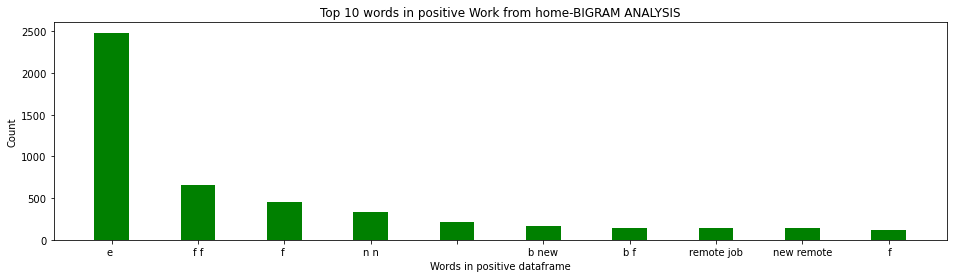

In [185]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive Work from home-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

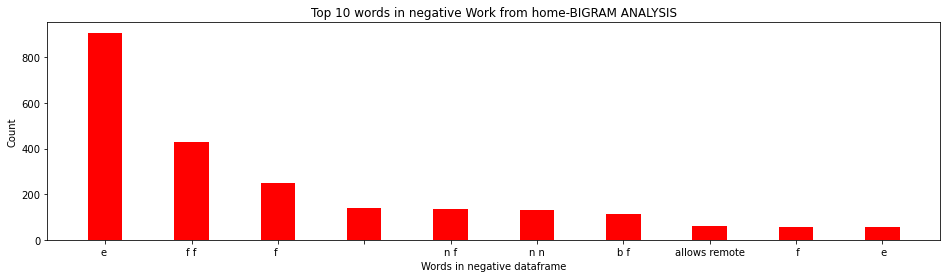

In [186]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative Work from home-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

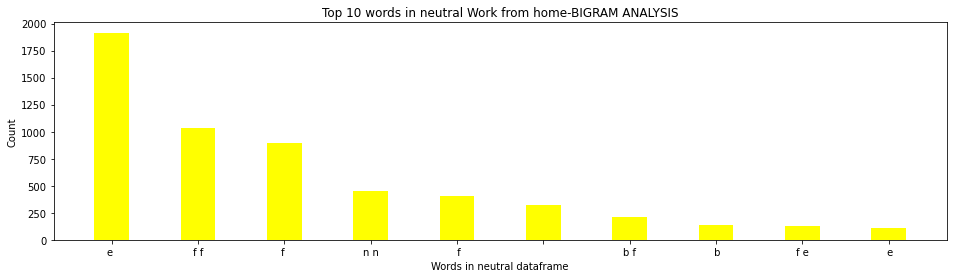

In [187]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral Work from home-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [188]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'nightlife', 'gokarna', 'eciting', 'filled', 'euberant', 'fun', 'entertainment', 'one', 'best', 'ways', 'e', '']
Sentence after removing stopwords: ['b', 'full', 'stack', 'software', 'engineer', 'nat', 'compass', 'pathways', 'nthe', 'full', 'stack', 'software', 'engineer', 'responsible', 'deliverin', 'e', '']
Sentence after removing stopwords: ['b', 'business', 'world', 'rapidly', 'changed', 'operating', 'models', 'response', 'pandemic', 'many', 'employees', 'needed', 'e', '']
Sentence after removing stopwords: ['b', 'cio', 'helena', 'nimmo', 'shares', 'thoughts', 'businesses', 'make', 'hybrid', 'work', 'success', 'best', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'full', 'stack', 'developer', 'unbounce', 'nare', 'passionate', 'building', 'reliable', 'scalable', 'systems', 'tackling', 'e', '']
Sentence after removing stopwords: ['b', 'much', 'wood', 'cozy', 'f', 'f', '', 'interesting', 'approach', 'layout', 'e', '', 'ef', 'b', '

Sentence after removing stopwords: ['b', 'love', 'view', 'homeoffice', 'lovewhatido']
Sentence after removing stopwords: ['b', 'customer', 'suppooperations', 'specialist', 'full', 'time', 'hybrid', 'remote', 'nat', 'calabrio', 'inc', 'n', 'n', 'customerservice', 'e', '']
Sentence after removing stopwords: ['b', 'discover', 'best', 'ways', 'successful', 'freelance', 'earn', 'full', 'time', 'income', 'get', 'work', 'done', 'time', 'e', '']
Sentence after removing stopwords: ['b', 'full', 'stack', 'developer', 'f', '', 'react', 'amp', 'node', 'js', 'cosuno', 'berlin', 'germany', 'allows', 'remote']
Sentence after removing stopwords: ['b', 'stunning', 'eecutive', 'chair', 'back', 'stock', 'available', 'purchase', 'direct', 'website', 'c', 'e', '']
Sentence after removing stopwords: ['b', 'seriously', 'reported', 'benefit', 'remote', 'work', 'spontaneous', 'chocolate', 'chip', 'pancake', 'zoom', 'break', 'homeoffice']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate

Sentence after removing stopwords: ['b', 'check', 'free', 'make', 'seconds', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'got', 'night', 'planned', 'cuddling', 'playing', 'babies', 'good', 'one', 'pamelafoland', 'selfie', 'e', '']
Sentence after removing stopwords: ['b', 'electriclit', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'free', 'video', 'reveals', 'break', 'massive', 'opportunity', 'online', 'marketing', 'advance', 'tech', 'skills', 'required', 'e', '']
Sentence after removing stopwords: ['b', 'grab', 'total', 'commission', 'system', 'right', 'get', 'worth', 'bonuses', 'gt', 'gt', 'gt']
Sentence after removing stopwords: ['b', 'people', 'already', 'early', 'bird', 'wow', 'f', 'f', '', 'b', 'ad', 'digitalasset', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'chill', 'lounge', 'lofi', 'focus'

Sentence after removing stopwords: ['b', 'dictionary', 'word', 'domain', 'looking', 'new', 'owner', 'pm', 'discuss', 'n', 'n', 'malinger', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'original', 'abstract', 'ais', 'available', 'art', 'n', 'green', 'n', 'blues', 'n', 'orange', 'n', 'abstracta', 'ebayfinds', 'e', '']
Sentence after removing stopwords: ['b', 'able', 'begin', 'work', 'day', 'wandering', 'along', 'nearby', 'coffee', 'shop', 'imagine', 'open', 'e', '']
Sentence after removing stopwords: ['b', 'fascinating', 'interview', 'newyorker', 'chrisherd', 'remote', 'working', 'v', 'traditional', 'offices', 'balanc', 'e', '']
Sentence after removing stopwords: ['b', 'careersingov', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome

Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'midweight', 'u', 'ui', 'designer', 'kyero', 'n', 'vacancy', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'tools', 'need', 'effectively', 'work', 'remotely', 'employees', 'n', 'nhere', 'essent', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'catching', 'yesterday', 'early', 'music', 'show', 'bbcradio', 'lucieskeaping', 'orquestra', 'ba', 'e', '']
Sentence after removing stopwords: ['b', 'mindset', 'need', 'successful', 'remote', 'work', 'according', 'new', 'cambridge', 'study', 'wfh', 'n', 'gt', 'e', '']
Sentence after removing stopwords: ['b', 'life', 'worth', 'living', 'unless', 'willing', 'take', 'big', 'chances', 'go', 'broke', 'eliot', 'wiggington', 'nmy', 'e', '']
Sentence after removing stopwords: ['b', 'hospitality', 'businesses', 'becoming', 'less', 'seasonal', 'result', 'hire', 'differently', 'britnmorse', 'e', '']
Sentence after removing stopwords: ['b', 'purple', 'i

Sentence after removing stopwords: ['b', 'fourth', 'bedroom', 'good', 'size', 'enough', 'double', 'bed', 'furniture', 'currently', 'used', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'desk', 'today', 'fan', 'remote', 'working', 'ready', 'return', 'workplace', 'want', 'air', 'vie', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingsponsoring', 'internetmarketing', 'perfect', 'secrets', 'finding', 'potential', 'e', '']
Sentence after removing stopwords: ['b', 'go', 'space', 'hour', 'epic', 'futuristic', 'space', 'music', 'mi', 'epic', 'sci', 'fi', 'hy', 'via', 'youtube', 'e', '']
Sentence after removing stopwords: ['b', 'surprise', 'n', 'npeople', 'really', 'seen', 'benefit', 'work', 'life', 'balance', 'productivity', 'happin', 'e', '']
Sentence after removing stopwords: ['b', 'postly', 'fresh', 'new', 'method', 'designed', 'give', 'online', 'business', 'fast', 'proven', 'results', 'n', 'nget', 'today', 'plus', 'e', '']
Sentence aft

Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'top', 'notch', 'branding', 'company', 'chennai', 'digital', 'pro', 'world', 'via', 'youtube', 'n', 'n', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'sencomm', 'offers', 'headsets', 'video', 'solutions', 'ncheck', 'office', 'page', 'see', 'solutions', 'e', '']
Sentence after removing stopwords: ['b', 'amazing', 'tips', 'hartleysrooms', 'find', 'good', 'work', 'life', 'balance', 'especially', 'home', 'office', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'massive', 'varied', 'effect', 'people', 'found', 'blessing', 'others', 'much', 'e', '']
Sentence after removing stopwords: ['b', 'nice', 'video

Sentence after removing stopwords: ['b', 'step', 'free', 'traffic', 'system', 'makes', 'us', 'per', 'day', 'works', 'even', 'zero', 'tech', 'skills', 'amp', 'zero', 'eperience', 'wa', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'money', 'watching', 'youtube', 'may', 'new', 'way', 'n', 'n', 'makemoneyonline', 'covid', 'e', '']
Sentence after removing stopwords: ['b', 'stop', 'focussing', 'pitfalls', 'simply', 'inspires', 'good', 'youbelonghere', 'e', '']
Sentence after removing stopwords: ['b', 'audioengine', 'speakers', 'deliver', 'high', 'quality', 'stereo', 'sound', 'desktop', 'hi', 'fi', 'system', 'suitable', 'wired', 'e', '']
Sentence after removing stopwords: ['b', 'right', 'light', 'right', 'time', 'everything', 'etraordinary', 'almostfriday', 'n', 'n', 'light', 'lazymorning', 'needcoffee', 'e', '']
Sentence after removing stopwords: ['b', 'communicate', 'priorities', 'broad', 'timeframes', 'slideuplift', 'e', '', 'creatively', 'designed', 'net', 'late', 'templates'

Sentence after removing stopwords: ['b', 'list', 'seven', 'general', 'public', 'epectations', 'upcoming', 'indian', 'budget', 'sag', 'infotech', 'offic', 'e', '']
Sentence after removing stopwords: ['b', 'nice', 'video', 'related', 'free', 'make', 'seconds', 'workathome', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'carve', 'permanent', 'space', 'home', 'office', 'make', 'place', 'enjoy', 'feel', 'pe', 'e', '']
Sentence after removing stopwords: ['b', 'wonder', 'person', 'wfh', 'hot', 'water', 'bottle', 'neck', 'workingfromhome', 'trapezoidinjury', 'lovemyjob']
Sentence after removing stopwords: ['b', 'choosing', 'right', 'virtual', 'office', 'space', 'n', 'business', 'operate', 'n', 'facilities', 'available', 'e', '']
Sentence after removing stopwords: ['b', 'people', 'workfromhome', 'workfromanywhere', 'workremote', 'lots', 'reasons', 'including', 'vastly', 'good', 'appoint', 'e', '']
Sentence after removing stopwords: ['b', 'schoolofmotion', 'asked', 'us', 'mod

Sentence after removing stopwords: ['b', 'chair', 'grand', 'n', 'n', 'moderndesign', 'officespace', 'workspace', 'furnituredesign', 'officefurniture', 'manufacturers', 'chair', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'welp', 'really', 'snow', 'f', 'f', '', 'e', '', 'outside', 'today', 'grab', 'etra', 'hours', 'work', 'f', 'f', '', 'f', 'f', 'f', '', 'workfromhomelife', 'f', 'f', '', 'c']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'thing', 'working', 'home', 'day', 'time', 'proper', 'early', 'morning', 'dog', 'walk', 'e', '', 'usuall', 'e', '']
Sentence after removing stopwords: ['b', 'clienttrack', 'n', 'tweeted', 'new', 'remote', 'j

Sentence after removing stopwords: ['b', 'jobsearchtips', 'understand', 'new', 'opportunities', 'gt', 'gt', 'remote', 'job', 'work', 'brie', 'reynolds', 'e', '']
Sentence after removing stopwords: ['b', 'live', 'workshop', 'steps', 'k', 'year', 'days', 'smartphone', 'ad', 'digital', 'e', '']
Sentence after removing stopwords: ['b', 'usually', 'marketing', 'courses', 'costly', 'mine', 'totally', 'free', 'gt', 'enjoy', 'retweet', 'please', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'infrastructure', 'security', 'engineer', 'shopify', 'n', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'work', 'home', 'shifted', 'new', 'norm', 'creating', 'convenient', 'workspace', 'home', 'become', 'required', 'improve', 'e', '']
Sentence after removing stopwords: ['b', 'l

Sentence after removing stopwords: ['b', 'need', 'office', 'chair', 'going', 'cause', 'nearly', 'year', 'old', 'back', 'ache', 'whilst', 'workingfromhome', 'wh', 'e', '']
Sentence after removing stopwords: ['b', 'wishing', 'friday', 'free', 'last', 'minute', 'inbo', 'notifications', 'hear', 'dreaded', 'ding', 'e', '']
Sentence after removing stopwords: ['b', 'favorite', 'standing', 'desk', 'option', 'workfromhome', 'remotework', 'wfh', 'homeoffice']
Sentence after removing stopwords: ['b', 'let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['b', 'work', 'home', 'whole', 'vibe', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'energy', 'energytwitter', 'workingfromhome']
Sentence after removing stopwords: ['b', 'honest', 'opinion', 'please', 'f', 'f', '', 'still', 'surprised', 'answers', 'n', 'n', 'homeoffice', 'poll', 'employeeengagement', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 's

Sentence after removing stopwords: ['b', 'enough', 'workingfromhome', 'help', 'finding', 'best', 'office', 'options', 'citycentre', 'e', '']
Sentence after removing stopwords: ['b', 'see', 'link', 'power', 'house', 'mailer', 'revealed', 'workfromhome', 'fast', 'email', 'list']
Sentence after removing stopwords: ['b', 'training', 'make', 'money', 'online', 'f', 'f', '', 'e', 'wealthy', 'ownboss', 'onlinebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'best', 'ways', 'reduce', 'cost', 'kitchen', 'renovation']
Sentence after removing stopwords: ['b', 'treat', 'space', 'new', 'side', 'table', 'unique', 'space', 'hand', 'poured', 'resin', 'choice', 'colour', 'e', '']
Sentence after removing stopwords: ['b', 'late', 'nights', 'lab', 'creative', 'customcigarpicks', 'workfromhome', 'rmdcigaraccessories']
Sentence after removing stopwords: ['b', 'good', 'thursday', 'pamelafoland', 'selfie', 'smile', 'homewithmypets', 'workingfromhome', 'fiverrseller', 'e', '']
Sentence aft

Sentence after removing stopwords: ['b', 'still', 'looking', 'amazing', 'contentcreator', 'become', 'tiktok', 'manager', 'n', 'npass', 'along', 'hit', 'link', 'e', '']
Sentence after removing stopwords: ['b', 'love', 'read', 'narrate', 'audiobooks', 'home', 'via', 'wahmrevolution', 'booklovers', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'free', 'earn', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'eclusive', 'e', '', 'n', 'na', 'sneak', 'peak', 'neopod', 'e', '', 'information', 'come', 'f', 'f', '', '', 'n', 'nyou', 'get', 'vivid', 'pods', 'f', 'f', '', 'e', '']
Sentence after removing stopwords: ['b', 'welcome', 'professional', 'meeting', 'setup', 'f', 'f', 'c', 'b', 'homeoffice']
Sentence after removing stopwords: ['b', 'quickly', 'learn', 'construct', 'really', 'good', 'cta', 'want', 'receive', 'etra', 'potential', 'clients', 'venture', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'job', 'dro

Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'useful', 'software', 'business', 'marketing', 'leadgenration', 'accounting', 'businessdevelopment', 'many', 'e', '']
Sentence after removing stopwords: ['b', 'adapt', 'energy', 'room', 'good', 'influence', 'energy', 'room', 'n']
Sentence after removing stopwords: ['b', 'jurassicdanie', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'looking', 'online', 'job', 'find', 'one', 'right', 'stagetting', 'paid', 'live', 'chat', 'assistant', 'use', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'strong', 'amp', 'smart', 'need', 'offer', 'ncall', 'n', 'n', 'business', 'nairobi', 'kenya', 'kot', 'kenyamoore', 'e', '']
Sentence after removing stopwords: ['b', 'e', 'c', 'today', '

Sentence after removing stopwords: ['b', 'new', 'video', 'n', 'nhp', 'spectre', '', 'review', 'best', 'laptop', 'apprecia', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'boss', 'really', 'snuggly', 'today']
Sentence after removing stopwords: ['b', 'check', 'free', 'make', 'seconds', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'supervisor', 'hard', 'work', 'lol', 'lucy', 'miss', 'go', 'back', 'office', 'workfromhome', 'f', 'f', '', '']
Sentence after removing stopwords: ['b', 'right', 'plan', 'days', 'working', 'days', 'retirement', 'e', '', 'ai', 'e', '', 'thinking', 'december', 'e', '', 'ai', 'thi', 'e', '']
Sentence after removing stopwords: ['b', 'hi', 'guys', 'make', 'sure', 'paof', 'reddit', 'community', 'freelance', 'freelancing', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'addition', 'homeoffice', 'mayhemmade', 'horned', 'skull', 'hangingplanter', 'love', 'copper', 'glows', 'e', '']
Sentenc

Sentence after removing stopwords: ['b', 'new', 'rules', 'could', 'prevent', 'thousands', 'refugees', 'joining', 'close', 'family', 'uk', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'four', 'inter', 'link', 'hearts', 'represents', 'love', 'strong', 'bond', 'family', 'pillows', 'great', 'around', 'home', 'e', '']
Sentence after removing stopwords: ['b', 'protechltd', 'thanks', 'follow', 'much', 'appreciated', 'wherever', 'sit', 'rugbuddy', 'rug', 'heater', 'footbuddy', 'e', '']
Sentence after removing stopwords: ['b', 'check', 'awesome', 'new', 'remote', 'writingjobs', 'humana', 'facebook', 'trimble', 'hundreds', 'e', '']
Sentence after removing stopwords: ['b', 'today', 'affirmation', 'important', 'n', 'workfromhomelife', 'e', '']
Sentence after removing stopwords: ['b', 'great', 'read', 'many', 'good', 'tips', 'many', 'people', 'working', 'home', 'must', 'read', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'digital', 'designer', 'nat', 'hays', 'speci

Sentence after removing stopwords: ['b', 'chair', 'easy', 'n', 'n', 'moderndesign', 'officespace', 'workspace', 'furnituredesign', 'officefurniture', 'manufacturers', 'chair', 'e', '']
Sentence after removing stopwords: ['b', 'let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['b', 'want', 'learntocode', 'sure', 'whether', 'teach', 'join', 'coding', 'bootcamp', 'f', 'f', '', 'f', 'f', '', 'bb', 'laid', 'p', 'e', '']
Sentence after removing stopwords: ['b', 'broadcasting', 'jobs', 'available', 'careerbarn', 'apply', 'production', 'assistant', 'news', 'reporter', 'customer', 'service', 'represent', 'e', '']
Sentence after removing stopwords: ['b', 'today', 'national', 'havefunatworkday', 'ideas', 'make', 'workplace', 'little', 'fun', 'e', '']
Sentence after removing stopwords: ['b', 'favorite', 'redragon', 'product', 'n', 'ncomment', 'f', 'f', '', '', 'n', 'n', 'n', 'n', 'desksetup', 'setup', 'homeoffice', 'gadgets', 'e', '']
Sentence

Sentence after removing stopwords: ['b', 'customers', 'kind', 'customer', 'service', 'problems', 'diffuse', 'situation', 'people', 'e', '', 'leave', 'e', '']
Sentence after removing stopwords: ['b', 'know', 'say', 'hope', 'yes', 'noes', 'okay', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'equisite', 'leatherette', 'velvet', 'plush', 'liner', 'fabric', 'ergonomic', 'design', 'creates', 'superior', 'fit', 'e', '']
Sentence after removing stopwords: ['b', 'swear', 'working', 'home', 'made', 'super', 'lazy', 'workingfromhome']
Sentence after removing stopwords: ['b', 'employee', 'working', 'home', 'may', 'able', 'claim', 'ta', 'relief', 'bills', 'pay', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'tricks', 'good', 'internet', 'speeds', 'n', 'n', 'wfh', 'workingfromhome', 'tech', 'lifehacks', 'tips', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'improve', 'home', 'office', 'eamples

Sentence after removing stopwords: ['b', 'time', 'energy', 'focus', 'resources', 'disposal', 'every', 'day', 'noel', 'dejusus', 'n', 'great', 'resources', 'f', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'homebusiness', 'internetmarketing', 'fast', 'way', 'get', 'indefinite', 'web', 'site', 'visitors', 'conten', 'e', '']
Sentence after removing stopwords: ['b', 'node', 'js', 'developer', 'nat', 'softpath', 'technologies', 'llc', 'nrole', 'node', 'js', 'developer', 'ep', 'yrs', 'location', 'oh', 'remote', 'hire', 'type', 'full', 'e', '']
Sentence after removing stopwords: ['b', 'thinkhub', 'e', '', 'advanced', 'contentsharing', 'thinkhub', 'supports', 'hybrid', 'collaboration', 'blended', 'room', 'e', '']
Sentence after removing stopwords: ['b', 'landiscomm', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'ellipsis', 'marketing', 'ltd', '

Sentence after removing stopwords: ['b', 'e', '', 'ready', 'quit', 'job', 'good', 'never', 'work', 'another', 'company', 'day', 'life', 'dm', 'workingfromhome']
Sentence after removing stopwords: ['b', 'balance', 'productivity', 'tough', 'periods', 'change', 'challenging', 'times', 'n']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'free', 'training', 'get', 'first', 'fb', 'fans', 'step', 'system', 'turn', 'new', 'k', 'fans', 'customers', 'e', '']
Sentence after removing stopwords: ['b', 'free', 'leads', 'sign', 'ups', 'figures', 'affiliate', 'commissions', 'anyone', 'joined', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'gain', 'essential', 'people', 'management', 'skills', 'motivate', 'inspire', 'performance', 'modern', 'workplace', 'e', '']
Sentence after removing stopwords: ['b', 'save', 'home', 'office', 'furniture', 'fri

Sentence after removing stopwords: ['b', 'beautiful', 'practical', 'teapot', 'infuser', 'ideal', 'making', 'aromatic', 'delicious', 'tea', 'n', 'nlink', 'e', '']
Sentence after removing stopwords: ['b', 'structionsite', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'post', 'ads', 'internet', 'often', 'reap', 'big', 'profits', 'cool', 'marketing', 'software', 'saves', 'e', '']
Sentence after removing stopwords: ['b', 'announcement', 'fresh', 'plans', 'overhaul', 'london', 'headquarters', 'citigroup', 'providing', 'vision', 'e', '']
Sentence after removing stopwords: ['b', 'software', 'developer', 'new', 'graduate', 'nat', 'ceridian', 'nceridian', 'global', 'leader', 'human', 'capital', 'management', 'technology', 'si', 'e', '']
Sentence after removing stopwords: ['b', 'thinking', 'homeoffice', 'remodel', 'get', 'creative', 'workspace']
Sentence after removing stop

Sentence after removing stopwords: ['b', 'c', 'aservice', 'delivery', 'manager', 'role', 'available', 'amazing', 'candidates', 'ready', 'demonstrate', 'knowledge', 'ta', 'e', '']
Sentence after removing stopwords: ['b', 'mediocre', 'marketers', 'think', 'terms', 'campaigns', 'great', 'marketers', 'think', 'terms', 'growth', 'frameworks', 'n', 'money', 'e', '']
Sentence after removing stopwords: ['b', 'entertainment', 'science', 'history', 'news', 'writer', 'nat', 'static', 'media', 'ngrunge', 'looking', 'enthusiastic', 'hardworking', 'free', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'consultant', 'risk', 'analytic', 'amp', 'solutions', 'nat', 'ey', 'nat', 'ey', 'chance', 'build', 'career', 'unique', 'yo', 'e', '']
Sentence after removing stopwords: ['b', 'listed', 'welcome', 'paradise', 'point', 'luuryhomes', 'dreamhome', 'homeoffice', 'workfromhome', 'bayarea', 'e', '']
Sentence after removing stopwords: ['b', 'days', 'office', 'wherever', 'find', 'space', 'really', 

Sentence after removing stopwords: ['b', 'e', '', 'aare', 'looking', 'fully', 'remote', 'position', 'f', 'f', 'c', 'e', 'n', 'f', 'f', '', 'aa', 'f', 'f', '', 'b', 'craving', 'sunny', 'weather', 'easy', 'going', 'lifestyle', 'tapas', 'pael', 'e', '']
Sentence after removing stopwords: ['b', 'jobale', 'workfromhome', 'n', 'naftermetoo', 'developing', 'website', 'include', 'guides', 'describing', 'legal', 'options', 'e', '']
Sentence after removing stopwords: ['b', 'web', 'designer', 'jobs', 'available', 'careerbarn', 'apply', 'graphic', 'designer', 'web', 'designer', 'designer', 'e', '']
Sentence after removing stopwords: ['b', 'full', 'stack', 'developer', 'indigo', 'slate', 'nat', 'indigo', 'slate', 'full', 'stack', 'developers', 'devoted', 'problem', 'solvers', 'responsi', 'e', '']
Sentence after removing stopwords: ['b', 'foodinstitute', 'looking', 'top', 'talent', 'work', 'remotely', 'home', 'new', 'hires', 'collaborate', 'closely', 'e', '']
Sentence after removing stopwords: ['b',

Sentence after removing stopwords: ['b', 'let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['b', 'surprising', 'surprising', 'signals', 'story', 'thegreatresignation', 'lack', 'workingfromhome', 'shows', 'e', '']
Sentence after removing stopwords: ['b', 'good', 'morning', 'mr', 'parcel', 'man', 'f', 'f', '', 'b', 'f', 'f', 'f', 'f', '', '', 'n', 'n', 'workingfromhomelife', 'workingfromhome', 'workinginpyjamas']
Sentence after removing stopwords: ['b', 'thursday', 'thoughts', 'positive', 'psychology', 'optimism', 'n', 'nlet', 'light', 'shine', 'ndan', 'n']
Sentence after removing stopwords: ['b', 'new', 'research', 'wildgooseevents', 'found', 'women', '', 'likely', 'feel', 'stagnant', 'career', 'since', 'w', 'e', '']
Sentence after removing stopwords: ['b', 'longtime', 'remote', 'manager', 'shares', 'simple', 'ways', 'bosses', 'make', 'workfromhome', 'teams', 'effective', 'ba', 'e', '']
Sentence after removing stopwords: ['b', 'mond

Sentence after removing stopwords: ['b', 'modern', 'single', 'handle', 'bathroom', 'faucet', 'n', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'makehomecozy', 'home', 'homeliving', 'e', '']
Sentence after removing stopwords: ['b', 'even', 'working', 'home', 'becomes', 'much', 'needed', 'slack', 'offices', 'e', '']
Sentence after removing stopwords: ['b', 'mental', 'health', 'needs', 'good', 'understood', 'taken', 'seriously', 'businesses', 'resources', 'provided', 'go', 'e', '']
Sentence after removing stopwords: ['b', 'online', 'class', 'goes', 'right', 'direction', 'students', 'begin', 'take', 'screenshot', 'f', 'f', 'e', '', 'e', '', '', 'ef', 'b', 'f', 'n', 'n', 'onlineeams', 'onlineclasses', 'e', '']
Sentence after removing stopwords: ['b', 'look', 'free', 'earn', 'minutes', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'financial', 'controller', 'kyero', 'n', 'remotejob', 'hiring', 'workfromh

Sentence after removing stopwords: ['b', 'giveaway', 'day', 'doyourdata', 'super', 'eraser', 'win', 'amp', 'mac', 'via', 'kostni', 'spartipp', 'e', '']
Sentence after removing stopwords: ['b', 'farewell', 'full', 'time', 'office', 'employment', 'n', 'business', 'vp', 'businessnews', 'hybridwork', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'search', 'engine', 'optimization', 'funny', 'thing', 'n', 'nyou', 'know', 'works', 'strategy', 'c', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'need', 'worry', 'career', 'anymore', 'partime', 'app', 'find', 'best', 'job', 'opportunities', 'n', 'ncoming', 'soon', 'e', '']
Sentence after removing stopwords: ['b', 'went', 'outside', 'house', 'first', 'time', 'since', 'yesterday', 'morning', 'e', '', 'f', 'f', 'b', 'f', 'f', '', '', 'workfromhome']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'check', 'free', 'get', 'paid', 'today', 'workathome', 'workfromhome', 'homebusiness', 'e', '']
Sentence after removing stopwords: ['b', 'lead', 'full', 'stack', 'developer', 'f', '', 'react', 'amp', 'node', 'js', 'cosuno', 'berlin', 'germany', 'allows', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'cstayour', 'affiliate', 'marketing', 'business', 'get', 'first', 'sale', 'days', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'necessary', 'many', 'jobs', 'industries', 'post', 'pandemic', 'households', 'continuing', 'reval', 'e', '']
Sentence after removing stopwords: ['b', 'would', 'like', 'know', 'never', 'run', 'fresh', 'prospects', 'ever', 'good', 'news', 'page', 'free', 'repow', 'e', '']
Sentence after removing stopwords: ['b', 'surge', 'omicron', 'variant', 'many', 'businesses', 'switching', 'back', 'workfromhome', 'revisit', 'blog', 'e', 'e', '']
Sentence after removing stopwords: ['b', 'joshg',

Sentence after removing stopwords: ['b', 'struggling', 'perfect', 'hybrid', 'bb', 'marketing', 'events', 'check', 'resource', 'lane', 'ellis', 'toprank', 'e', '']
Sentence after removing stopwords: ['b', 'halifa', 'private', 'office', 'nchoose', 'two', 'unique', 'leg', 'options', 'leg', 'amp', 'v', 'leg', 'nmetal', 'features', 'avail', 'colors', 'e', '']
Sentence after removing stopwords: ['b', 'claregerada', 'cdcglobal', 'guardian', 'ghs', 'nihorwh', 'nincreased', 'congenital', 'syphilis', 'amp', 'pregnant', 'women', 'sero', 'positivity', 'fo', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'learn', 'plus', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'week', 'new', 'moneymonday', 'mantra', 'nrepeat', 'enough', 'money', 'freely', 'enjoy', 'day', 'day', 'life', 'n', 'f', 'f', '', 'aa', 'f', 'f', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'b

Sentence after removing stopwords: ['b', 'strong', 'amp', 'smart', 'need', 'offer', 'ncall', 'n', 'n', 'business', 'nairobi', 'kenya', 'kot', 'kenyamoore', 'e', '']
Sentence after removing stopwords: ['b', 'anonnadutt', 'abdus', 'biharhealthdept', 'bbchealth', 'nincrease', 'congenital', 'syphilis', 'amp', 'pregnant', 'women', 'sero', 'positivity', 'e', '']
Sentence after removing stopwords: ['b', 'fresh', 'datapoint', 'shows', 'red', 'hot', 'america', 'e', '', 'housingmarket', 'workfromhome', 'revolution', 'e', '']
Sentence after removing stopwords: ['b', 'licensed', 'life', 'insurance', 'agent', 'full', 'time', 'remote', 'sales', 'nat', 'assurance', 'iq', 'nenjoy', 'selling', 'term', 'life', 'insurance', 'final', 'epe', 'e', '']
Sentence after removing stopwords: ['b', 'product', 'software', 'engineer', 'nat', 'wolters', 'kluwer', 'njob', 'description', 'summary', 'direct', 'supervision', 'assists', 'designing', 'e', '']
Sentence after removing stopwords: ['b', 'nice', 'nominated', 'o

Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'senior', 'director', 'analytics', 'twilio', 'n', 'hiring', 'workfromhome']
Sentence after removing stopwords: ['b', 'wins', 'celebrating', 'week', 'friend', 'f', 'f', '', 'n', 'winwednesday', 'fempreneur', 'workingfromhome', 'empowerment', 'winwfh', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'two', 'new', 'eciting', 'opportunities', 'opened', 'join', 'billi', 'team', 'n', 'nwe', 'looking', 'ui', 'u', 'designer', 'vp', 'e', '']
Sentence after removing stopwords: ['b', 'joy', 'techie', 'bestfriends', 'involved', 'enthusiastic', 'technology', 'development', 'e', '']
Sentence after removing stopwords: ['b', 'well', 'keep', 'head', 'straight', 'home', 'important', 'success', 'right', 'tools', 'mostly', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'unde

Sentence after removing stopwords: ['b', 'make', 'money', 'typing', 'writing', 'speaking', 'e', '', 'best', 'data', 'entry', 'jobs', 'f', 'f', '', 'bb', 'f', 'f', '', '', 'n', 'workfromhome', 'dataentryjobs', 'e', '']
Sentence after removing stopwords: ['b', 'makemoneyonline', 'workfromhome', 'need', 'gain', 'many', 'hundreds', 'superior', 'sales', 'opportunities', 'view', 'busin', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'time', 'reinvent', 'life', 'n', 'letsgooilers', 'e', '']
Sentence after removing stopwords: ['b', 'k', 'hq', 'sound', 'happy', 'hopeful', 'laid', 'back', 'bossa', 'nova', 'cafe', 'music', 'perfect', 'st', 'via', 'youtube', 'e', '']
Sentence after removing stopwords: ['b', 'using', 'techniques', 'brains', 'able', 'pick', 'apainformation', 'reassemble', 'like', 'pieces', 'puzzle', 'e', '']
Sentence after removing stopwords: ['b', 'pick', 'new', 'monitor', 'working', 'home', 'f', 'f', '', 'bc', 'f', 'f', '', 'b', 'nyou', 'interact', 'coworkers', 'flat',

Sentence after removing stopwords: ['b', 'today', 'new', 'feline', 'supurrvisor', 'tillymitten', 'catsoftwitter', 'workingfromhome', 'tuedocat']
Sentence after removing stopwords: ['b', 'work', 'besties', 'workingfromhome', 'make', 'rich', 'colleague', 'e', '']
Sentence after removing stopwords: ['b', 'see', 'full', 'project', 'gt', 'gt', 'office', 'interior', 'bringing', 'transparency', 'open', 'plan', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'new', 'computer', 'tutor', 'repair', 'epejoins', 'ohana', 'honolulu', 'hawaii']
Sentence after removing stopwords: ['b', 'dreamy', 'oh', 'comfy', 'maggie', 'shirt', 'perfect', 'laidback', 'days', 'layering', 'jumpers', 'n', 'n', 'theshirtcompany', 'e', '']
Sentence after removing stopwords: ['b', 'tips', 'spice', 'work', 'home', 'life', 'pretty', 'soon', 'systematic', 'built', 'pleasures', 'e', '']
Sentence after removing stopwords: ['b', 'video', 'talk', 'new', 'service', 'made', 'available', 'stripe', 'makes', 'online'

Sentence after removing stopwords: ['b', 'systems', 'administrator', 'vtm', 'group', 'njob', 'description', 'salary', 'vtm', 'group', 'large', 'hightech', 'firm', 'beaverton', 'area', 'see', 'e', '']
Sentence after removing stopwords: ['b', 'could', 'fire', 'boss', 'live', 'dream', 'e', 'waiter', 'yes', 'could', 'watch', 'e', '']
Sentence after removing stopwords: ['b', 'interested', 'learning', 'design', 'team', 'help', 'revamp', 'home', 'office', 'space', 'contact', 'us', 'e', '']
Sentence after removing stopwords: ['b', 'dropshipping', 'work', 'nif', 'e', '', 'curious', 'powerful', 'marketing', 'strategy', 'dropshipping', 'si', 'e', '']
Sentence after removing stopwords: ['b', 'devisridhar', 'mansukhmandviya', 'nandalipika', 'nincrease', 'congenital', 'syphilis', 'amp', 'pregnant', 'women', 'sero', 'positivity', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'best', 'printers', 'home', 'use', 'n', 'nfor', 'details', 'bestprinter', 'e', '']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'offices', 'reopening', 'remember', 'keep', 'hydrated', 'make', 'immunity', 'strong', 'n', 'n', 'n', 'n', 'h', 'water', 'e', '']
Sentence after removing stopwords: ['b', 'simple', 'prospecting', 'framework', 'confidently', 'connect', 'amp', 'build', 'instant', 'rappowith', 'prospects', 'e', '']
Sentence after removing stopwords: ['b', 'us', 'solve', 'great', 'resignation', 'create', 'good', 'jobs', 'labor', 'secretary', 'marty', 'walsh', 'says']
Sentence after removing stopwords: ['b', 'affiliate', 'marketing', 'fast', 'way', 'multiple', 'streams', 'income', 'n', 'nwant', 'stabuilding', 'great', 'online', 'busin', 'e', '']
Sentence after removing stopwords: ['b', 'aws', 'java', 'full', 'stack', 'developer', 'nat', 'cognizant', 'n', 'aws', 'full', 'stack', 'developer', 'remote', 'location', 'canada', 'must', 'legally', 'au', 'e', '']
Sentence after removing stopwords: ['b', 'full', 'stack', 'developer', 'nat', 'daysmasoftware', 'llc', 'ndash', 'p

Sentence after removing stopwords: ['b', 'child', 'need', 'new', 'laptop', 'working', 'home', 'elearning', 'save', 'money', 'e', '']
Sentence after removing stopwords: ['b', 'enjoy', 'weekend', 'keep', 'fighting', 'proper', 'wages', 'stock', 'crypto', 'rights', 'n', 'workingfromhome', 'cryptocurrency', 'amc', 'e', '']
Sentence after removing stopwords: ['b', 'since', 'us', 'still', 'home', 'half', 'home', 'half', 'office', 'e', '', 'important', 'make', 'sure', 'e', '']
Sentence after removing stopwords: ['b', 'let', 'earn', 'free', 'cash', 'gift', 'cards', 'together', 'signup']
Sentence after removing stopwords: ['b', 'seamless', 'set', 'nsize', 'l', 'n', 'n', 'n', 'wonho', 'gymmotivation', 'gymlife', 'running', 'bbtvi', 'e', '']
Sentence after removing stopwords: ['b', 'advanced', 'technology', 'security', 'n', 'n', 'tvg', 'tvgcoin', 'cryptocurrency', 'vinda', 'earn', 'workfromhome', 'investment', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'wfh', 'stay', 'e',

Sentence after removing stopwords: ['b', 'mindset', 'everything', 'every', 'day', 'commence', 'deep', 'breath', 'smile', 'fresh', 'start', 'n', 'nwhen', 'e', '', 'obvious', 'e', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'job', 'kundendienstmitarbeiter', 'portugal', 'location', 'lisbon', 'salary', 'pm', 'pm']
Sentence after removing stopwords: ['b', 'look', 'free', 'make', 'today', 'workathome', 'workfromhome', 'homebusiness', 'internetmarketing', 'e', '']
Sentence after removing stopwords: ['b', 'pa', 'nplease', 'share', 'tweet', 'us', 'get', 'good', 'services', 'paying', 'non', 'behalf', 'e', '']
Sentence after removing stopwords: ['b', 'sales', 'eecutive', 'life', 'sciences', 'safety', 'technology', 'amp', 'professional', 'service', 'solutions', 'nat', 'iqvia', 'njoin', 'us', 'ecitin', 'e', '']
Sentence after removing stopwords: ['b', 'simonw', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome

Sentence after removing stopwords: ['b', 'trust', 'guaranteed', 'true', 'connection', 'benefits', 'real', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'f', 'f', '', '', 'nlearn', 'visiting', 'e', '']
Sentence after removing stopwords: ['b', 'vnctalk', 'e', '', '', 'real', 'time', 'businesscommunication', 'many', 'teams', 'still', 'collaborating', 'virtually', 'e', '']
Sentence after removing stopwords: ['b', 'share', 'laugh', 'funny', 'comedy', 'laugh', 'laughter', 'mondaymotivation', 'winter', 'springbreak', 'workingfromhome', 'workout', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'want', 'home', 'best', 'high', 'paying', 'stay', 'home', 'jobs', 'right', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'f', 'f', '', 'b', 'e', '']
Sentence after removing stopwords: ['b', 'eternalizing', 'thoughts', 'list', 'helps', 'free', 'mind', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'happy', 'wedn

Sentence after removing stopwords: ['b', 'try', 'f', 'f', 'f', '', 'luck', 'f', 'f', '', 'f', 'f', '', 'every', 'hour', 'f', 'f', '', 'af', 'f', 'f', '', '', 'playing', 'f', 'f', 'e', 'ae', 'f', 'f', '', 'b', 'simple', 'f', 'f', '', '', 'f', 'f', '', 'game', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'af', 'f', 'f', '', 'could', 'win', 'f', 'f', '', 'bd', 'e', '', '', 'free', 'f', 'f', '', '', 'bit', 'e', '']
Sentence after removing stopwords: ['b', 'nodejs', 'developer', 'resourcesoft', 'inc', 'nrequirements', 'years', 'eperience', 'full', 'stack', 'developer', 'eperience', 'e', '']
Sentence after removing stopwords: ['b', 'accept', 'success', 'nit', 'becomes', 'jealous', 'amp', 'naccept', 'nit', 'becomes', 'inspiration', 'n', 'n', 'naccepta', 'e', '']
Sentence after removing stopwords: ['b', 'e', 'ad', 'edwards', 'also', 'offers', 'two', 'hour', 'workshop', 'providing', 'insight', 'common', 'virtual', 'hybrid', 'team', 'challenges', 'best', 'e', '']
Sentence after removing s

Sentence after removing stopwords: ['b', 'team', 'earning', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'f', 'f', '', '', 'n', 'nlet', 'take', 'action', 'f', 'f', '', 'f', 'f', 'f', 'f', '', 'b', 'f', 'f', '', 'b', 'f', 'f', '', 'f', 'f', 'f', 'bb', 'e', '', 'f', 'f', '', 'bb', 'n', 'n', 'e', 'c', '', 'digitalmarketingtips', 'startup', 'success', 'businessowner', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'home', 'zoom', 'video', 'calls', 'well', 'good', 'find', 'situation', 'ca', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', 'n', 'jobs', 'agriculture', 'industry', 'hotels', 'e', '']
Sentence after removing stopwords: ['b', 'amid', 'rising', 'number', 'cases', 'lot', 'us', 'back', 'wfh', 'may', 'hectic', 'many', 'us', 'ar', 'e', '']
Sentence after removing stopwords: ['b', 'sure', 'whose', 'looking', 'today', 'duvetday', 'workingfromhome', 'anietylife', 'dogmom']
Sentence after removing stopwords: ['b', 'recent', 'c

Sentence after removing stopwords: ['b', 'give', 'best', 'networking', 'tips', 'advice', 'e', 'ac', '', 'ef', 'b', 'f', 'f', 'f', '', '', 'f', 'f', '', 'b', 'workfromhome', 'income']
Sentence after removing stopwords: ['b', 'easy', 'tips', 'help', 'get', 'one', 'step', 'close', 'dream', 'job', 'times', 'video', 'interviews', 'new', 'e', '']
Sentence after removing stopwords: ['b', 'webcheckout', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs', 'wfh', 'reignydayjobs', 'remotework', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'fun', 'office', 'otherwise', 'n', 'aptarafridayfun', 'aptaradrivethedrive', 'january', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'underground', 'affiliate', 'marketing', 'system', 'guarantees', 'first', 'commission', 'today', 'pays', 'e', 'e', 'ef', 'b', 'f', 'learn', 'plus', 'e', '']
Sentence after removing stopwords: ['b', 'willstaney', 'n', 'tweeted', 'new', 'remote', 'job', 'incluzion', 'remotejobs'

Sentence after removing stopwords: ['b', 'senior', 'legal', 'counsel', 'employment', 'labour', 'law', 'nat', 'canada', 'post', 'postes', 'canada', 'njob', 'requisition', 'id', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'critical', 'ebooks', 'keys', 'success', 'working', 'freelance', 'rebuild', 'finances', 'post', 'cv', 'pa', 'e', '']
Sentence after removing stopwords: ['b', 'top', 'tips', 'improve', 'amazon', 'earnings', 'laptoplifestyle', 'wealthy', 'travel', 'e', '']
Sentence after removing stopwords: ['b', 'nice', 'video', 'related', 'free', 'get', 'paid', 'seconds', 'workathome', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'ordered', 'writers', 'toolkit', 'lots', 'great', 'forms', 'templates', 'amp', 'checklists', 'keep', 'track', 'amp', 'organized', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'upgrade', 'aesthetic', 'desk', 'leon', 'scribalu', 'rose', 'gold', 'rollerball', 'pen', 'gt', 'gt']
Sentence after removing stopwords: ['b

Sentence after removing stopwords: ['b', 'switched', 'person', 'full', 'time', 'remote', 'also', 'changed', 'location', 'curious', 'people', 'e', '']
Sentence after removing stopwords: ['b', 'leather', 'eecutive', 'chair', 'assembled', 'greenbelt', 'nget', 'free', 'quote', 'call', 'n', 'officechair', 'officefurniture', 'e', '']
Sentence after removing stopwords: ['b', 'able', 'find', 'job', 'following', 'procedures', 'going', 'give', 'indi', 'e', '']
Sentence after removing stopwords: ['b', 'ah', 'joys', 'surprise', 'office', 'visitor', 'n', 'nbut', 'love', 'happened', 'kim', 'ford', 'n', 'ncheck', 'evolve', 'e', '']
Sentence after removing stopwords: ['b', 'creative', 'ways', 'make', 'money', 'e', '', '', 'effective', 'affiliate', 'marketing', 'nutshell']
Sentence after removing stopwords: ['b', 'everything', 'need', 'know', 'neck', 'pain', 'nneck', 'muscles', 'easily', 'strained', 'poor', 'posture', 'sleeping', 'u', 'e', '']
Sentence after removing stopwords: ['b', 'warm', 'place', '

Sentence after removing stopwords: ['b', 'senior', 'full', 'stack', 'developer', 'nat', 'weir', 'motion', 'metrics', 'nsenior', 'full', 'stack', 'developer', 'motion', 'metrics', 'international', 'e', '']
Sentence after removing stopwords: ['b', 'freelance', 'writer', 'remote', 'jerry', 'nabout', 'role', 'jerry', 'ranked', 'linkedin', 'one', 'top', 'technology', 'startups', 'e', '']
Sentence after removing stopwords: ['b', 'many', 'careers', 'require', 'strong', 'internet', 'connection', 'specialized', 'training', 'great', 'time', 'consider', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'home', 'medical', 'billing', 'coding', 'jobs', 'quick', 'med', 'claims', 'review', 'medical', 'coding', 'workfromhome', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'ebac', 'dehumidifier', 'condensation', 'useful', 'article', 'using', 'ebac', 'dehumidifiers', 'n', 'n', 'damp', 'e', '']
Sentence after removing stopwords: ['b', 'hiring', 'nsign', 'middleman', 'free', 'charge', '

Sentence after removing stopwords: ['b', 'hire', 'us', 'recruitment', 'needs', 'n', 'cost', 'effective', 'n', 'time', 'saving', 'n', 'quality', 'hiring', 'n', 'competitive', 'advant', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'give', 'important', 'role', 'leader', 'keep', 'hope', 'alive', 'thanks', 'emilieel', 'reminding', 'us', 'th', 'e', '']


In [189]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'javascript', 'developer', 'hybrid', 'model', 'office', 'vs', 'remote', 'nat', 'summit', 'group', 'solutions', 'llc', 'njavascript', 'developer', 'locat', 'e', '']
Sentence after removing stopwords: ['b', 'morning', 'f', 'f', '', 'homeoffice', 'realized', 'small', 'desk']
Sentence after removing stopwords: ['b', 'forsage', 'illegal', 'ndo', 'check', 'video', 'clear', 'doubts', 'also', 'information', 'contact', 'gi', 'e', '']
Sentence after removing stopwords: ['b', 'dark', 'side', 'hustling', 'n', 'n', 'bloggingcommunity', 'writingcommunity', 'workingfromhome', 'digitalnomad']
Sentence after removing stopwords: ['b', 'shes', 'right', 'nand', 'theres', 'nothing', 'wrong', 'n', 'n', 'solidity', 'web', 'blockchaingaming', 'softwaredevelopment', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'late', 'medium', 'piece', 'impact', 'working', 'grubhub', 'workingfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'actively', 'seeking

Sentence after removing stopwords: ['b', 'small', 'businesses', 'spine', 'economy', 'know', 'begin', 'one', 'laptop', 'learn', 'favori', 'e', '']
Sentence after removing stopwords: ['b', 'fullstack', 'developer', 'envato', 'meico', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e', '']
Sentence after removing stopwords: ['b', 'activate', 'c', 'e', '', 'cmultiple', 'streams', 'e', '', 'autopilot', 'traffic', 'amp', 'sales', 'inside', 'one', 'dashboard', 'seconds', 'less', 'visit', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'customer', 'service', 'representative', 'connect', 'nat', 'sysco', 'canada', 'inc', 'nreports', 'customer', 'service', 'manager', 'location', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'angular', 'usereperience', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'zenklub', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '

Sentence after removing stopwords: ['b', 'need', 'ppl', 'mute', 'meeting', 'e', '', 'e', '', 'hard', 'workingfromhome']
Sentence after removing stopwords: ['b', 'opportunities', 'remote', 'program', 'manager', 'healthcare', 'industry', 'san', 'francisco', 'san', 'francisco', 'telecommute', 'e', '']
Sentence after removing stopwords: ['b', 'quest', 'help', 'taes', 'share', 'nugget', 'information', 'small', 'business', 'owners', 'deduct', 'e', '']
Sentence after removing stopwords: ['b', 'seriously', 'considering', 'wearing', 'joeyb', 'shades', 'virtual', 'meetings', 'morning', 'spread', 'bengals', 'fandom', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'notarize', 'hiring', 'remote', 'seo', 'analyst', 'notarize', 'remotework', 'remotejob', 'workfromhome', 'marin', 'semrush', 'sem', 'e', '']
Sentence after removing stopwords: ['b', 'matter', 'long', 'journey', 'aql', 'c', '', 'springs', 'hydrate', 'n', 'n', 'n', 'n', 'h', 'water', 'mineralwater', 'aqle', 'e', '']
Senten

Sentence after removing stopwords: ['b', 'senior', 'pm', 'banking', 'cloud', 'migration', 'remote', 'nat', 'head', 'resourcing', 'ltd', 'nsenior', 'project', 'manager', 'banking', 'cloud', 'mi', 'e', '']
Sentence after removing stopwords: ['b', 'apple', 'delivers', 'record', 'earnings', 'live', 'coverage', 'trading', 'plain', 'english', 'uncle', 'bruce', 'n']
Sentence after removing stopwords: ['b', 'remote', 'job', 'hyperlab', 'ab', 'hiring', 'senior', 'frontend', 'developer', 'n', 'napply']
Sentence after removing stopwords: ['b', 'want', 'remote', 'junior', 'talent', 'acquisition', 'specialist', 'testgorilla', 'workfromhome', 'allotherremote', 'n', 'n']
Sentence after removing stopwords: ['b', 'late', 'briefing', 'discusses', 'recently', 'published', 'draft', 'scheme', 'right', 'request', 'remote', 'working', 'bill', 'e', '']
Sentence after removing stopwords: ['b', 'hidden', 'desk', 'turn', 'room', 'homeoffice', 'interiordesign']
Sentence after removing stopwords: ['b', 'typical', 

Sentence after removing stopwords: ['b', 'australian', 'retailers', 'association', 'growing', 'team', 'ara', 'actively', 'promotes', 'fleible', 'working', 'e', '']
Sentence after removing stopwords: ['b', 'field', 'quality', 'manager', 'remote', 'nat', 'raytheon', 'intelligence', 'amp', 'space', 'nraytheon', 'intelligence', 'space', 'ris', 'opportunity', 'e', '']
Sentence after removing stopwords: ['b', 'foster', 'serendipitous', 'innovation', 'hybrid', 'remote', 'teams', 'wfh', 'n', 'gt', 'workfromhome']
Sentence after removing stopwords: ['b', 'secret', 'online', 'success', 'make', 'money', 'online', 'makemoneyonline', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'job', 'lolly', 'co', 'hiring', 'senior', 'frontend', 'developer', 'n', 'napply', 'css', 'e', '']
Sentence after removing stopwords: ['b', 'companies', 'cutting', 'back', 'office', 'space', 'futureofwork', 'office', 'remotework', 'workingfromhome']
Sentence after removing stopwords: ['b', 'legi

Sentence after removing stopwords: ['b', 'transactional', 'attorney', 'ape', 'systems', 'ntitle', 'transactional', 'attorney', 'location', 'remote', 'contract', 'duration', 'month', 'w', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'f', 'trueaccord', 'hiring', 'remote', 'content', 'marketer', 'trueaccord', 'remotework', 'remotejob', 'workfromhome', 'saasmarketing', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'project', 'management', 'future', 'collaborative', 'teamwork', 'read', 'remote', 'project', 'manager', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'colleague', 'lazy', 'workingfromhome']
Sentence after removing stopwords: ['b', 'software', 'engineering', 'manager', 'linq', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'python', 'developer', 'cybercoders', 'nif', 'python', 'developer', 'years', 'eperience', 'please', 'read', 'base', 'e', '']
Sentence after removing stop

Sentence after removing stopwords: ['b', 'enveritasorg', 'hiring', 'remote', 'interaction', 'designer', 'data', 'visualization', 'engineer', 'us', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'uncomfortable', 'eperiencing', 'back', 'pain', 'desk', 'nwe', 'wide', 'range', 'office', 'chairs', 'choose', 'e', '']
Sentence after removing stopwords: ['b', 'thought', 'plane', 'taking', 'behind', 'nnope', 'work', 'laptop', 'fan', 'forgot', 'put', 'sleep', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'workfromhome', 'homebusiness', 'internetmarketing', 'foregoing', 'special', 'web', 'site', 'traffic', 'generation', 'secret', 'reveal', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'big', 'consequences', 'working', 'desk', 'job', 'poor', 'blood', 'circulation', 'nhere', 'ways', 'prevent', 'poo', 'e', '']
Sentence after removing stopwords: ['b', 'oh', 'hey', 'working', 'hard', 'n', 'catsoftwitter', 'workfromhome', 'homeoffice', 'coworker', 'meowsofcanada'

Sentence after removing stopwords: ['b', 'restrictions', 'slowly', 'lifted', 'people', 'encouraged', 'head', 'back', 'office', 'large', 'number', 'e', '']
Sentence after removing stopwords: ['b', 'sales', 'representative', 'cold', 'calling', 'nat', 'renewal', 'andersen', 'noutside', 'sales', 'consultant', 'residential', 'renewal', 'ander', 'e', '']
Sentence after removing stopwords: ['b', 'website', 'design', 'n', 'nbuy', 'pay', 'late', 'e', 'ad', '', 'ncall', 'tet', 'n', 'n', 'losangeles', 'houston', 'sanantonio', 'riverside', 'e', '']
Sentence after removing stopwords: ['b', 'buildbookhq', 'hiring', 'looking', 'remote', 'senior', 'product', 'manager', 'workfromhome', 'product', 'n', 'n']
Sentence after removing stopwords: ['b', 'sometimes', 'e', '', 'small', 'things', 'make', 'day', 'f', 'f', '', 'c', 'working', 'home', 'never', 'even', 'met', 'coworker', 'kne', 'e', '']
Sentence after removing stopwords: ['b', 'looking', 'desk', 'maimize', 'small', 'office', 'space', 'consider', 'fl

Sentence after removing stopwords: ['b', 'home', 'office', 'taken', 'couover', 'secret', 'policy', 'seizing', 'channel', 'crossing', 'asylum', 'seekers', 'phones', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', '', '', 'outsystems', 'sasdlpy', 'n', 'f', 'f', 'f', '', 'ef', 'b', 'f', 'mind', 'source', 'n', 'f', 'f', 'aa', '', 'n', 'f', 'f', 'f', 'workfromhome', 'e', '', '', 'remote', 'n', 'napply', 'e', '']
Sentence after removing stopwords: ['b', 'virtual', 'assistants', 'used', 'help', 'large', 'small', 'businesses', 'grow', 'n', 'beyondstaff', 'virtualassistant', 'e', '']
Sentence after removing stopwords: ['b', 'key', 'requirement', 'set', 'company', 'remote', 'work', 'knowledge', 'base', 'one', 'buy', 'e', '']
Sentence after removing stopwords: ['b', 'beyonc', 'c', 'crazy', 'love', 'ft', 'jay', 'z', 'via', 'youtube', 'workout', 'workoutmotivation', 'workoutwednesday', 'workingfromhome']

Sentence after removing stopwords: ['b', 'late', 'blogpost', 'spoke', 'suzy', 'sanders', 'founder', 'franchisor', 'alchemyvauk', 'suzy', 'revealed', 'secr', 'e', '']
Sentence after removing stopwords: ['b', 'hahaha', 'happens', 'boss', 'needs', 'work', 'shonotice', 'deadline', 'quality', 'suffers', 'n', 'hr', 'e', '']
Sentence after removing stopwords: ['b', 'software', 'developer', 'nat', 'euro', 'projects', 'recruitment', 'nsoftware', 'developer', 'fully', 'remote', 'based', 'role', 'software', 'developer', 'jobs', 'e', '']
Sentence after removing stopwords: ['b', 'common', 'mistake', 'comes', 'saving', 'time', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'remote', 'jobs', 'retirement', 'need', 'know', 'brie', 'weiler', 'reynolds']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'jobalert', 'n', 'n', 'f', 'f', '', 'e', '', 'f', 'f', '', 'bb', 'senior', 'e', ''

Sentence after removing stopwords: ['b', 'opportunities', 'remote', 'program', 'manager', 'healthcare', 'industry', 'san', 'jose', 'ca', 'san', 'jose', 'telecommute', 'e', '']
Sentence after removing stopwords: ['b', 'dear', 'businesses', 'stop', 'blaming', 'covid', 'poor', 'customer', 'service', 'f', 'f', 'b', 'n', 'nthe', 'pandemic', 'long', 'ecuse', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'suppo', 'amp', 'software', 'engineer', 'ny', 'metro', 'area', 'americas', 'canonical', 'allows', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'behind', 'scenes', 'theroyalbeat', 'n', 'nwe', 'asked', 'mirror', 'e', '', 'royal', 'editor', 'rjmyers', 'take', 'princeharry', 'e', '', 'bat', 'e', '']
Sentence after removing stopwords: ['b', 'guidance', 'workfromhome', 'ends', 'today', 'plan', 'b', 'measures', 'long', 'place', 'england', 'n', 'nhere', 'e', '', 'handl', 'e', '']
Sentence after removing stopwords: ['b', 'three', 'years', 'twelve', 'back', 'issues', 'nour'

Sentence after removing stopwords: ['b', 'companies', 'adding', 'job', 'titles', 'focused', 'remote', 'hybridwork', 'eperiences', 'shift', 'workfromhome', 'becomes', 'e', '']
Sentence after removing stopwords: ['b', 'curlytalesindia', 'nkamiya', 'jani', 'n', 'things', 'avoid', 'regrets', 'n', 'n', 'health', 'n', 'communication', 'e', '']
Sentence after removing stopwords: ['b', 'small', 'businesses', 'backbone', 'economy', 'know', 'staone', 'laptop', 'find', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'loses', 'case', 'stripping', 'citizenship', 'without', 'notice']
Sentence after removing stopwords: ['b', 'senior', 'javascript', 'developer', 'remote', 'doe', 'nat', 'anonymous', 'nposition', 'senior', 'javascript', 'developer', 'remote', 'newcastle', 'c', 'ak', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'command', 'center', 'day']
Sentence after removing stopwords: ['b', 'fully', 'remote', 'company', 'see', 'increased', 'productivity', 'daily'

Sentence after removing stopwords: ['b', 'medical', 'coding', 'jobs', 'home', 'leicode', 'get', 'remote', 'medical', 'coding', 'jobs', 'medicalcoding', 'medical', 'coding', 'e', '']
Sentence after removing stopwords: ['b', 'another', 'piece', 'feedback', 'mental', 'health', 'managers', 'ran', 'week', 'n', 'n', 'humanresources', 'e', '']
Sentence after removing stopwords: ['b', 'software', 'engineer', 'suse', 'allows', 'remote', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'remote', 'working', 'charities', 'need', 'know', 'check', 'blog', 'remoteworking', 'e', '']
Sentence after removing stopwords: ['b', 'eecutive', 'recruiter', 'ajilon', 'nplease', 'note', 'position', 'remote', 'become', 'hybrid', 'wfh', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'work', 'version', 'article', 'today', 'remotework', 'e', '']
Sentence after removing stopwords: ['b', 'virtual', 'assistant', 'person', 'provides

Sentence after removing stopwords: ['b', 'thinking', 'working', 'remotely', 'seven', 'truths', 'consider', 'taking', 'plunge', 'e', '']
Sentence after removing stopwords: ['b', 'another', 'teams', 'meeting', 'muted', 'afternoon', 'due', 'carefree', 'cat', 'tiptoeing', 'net', 'door', 'e', '', 'cat', 'flap', 'stealin', 'e', '']
Sentence after removing stopwords: ['b', 'remote', 'jobs', 'work', 'home', 'moms', 'pay', 'well', 'eperience', 'required']
Sentence after removing stopwords: ['b', 'want', 'make', 'money', 'home', 'hate', 'talking', 'phone', 'read', 'blog', 'post', 'learn', 'non', 'phone', 'work', 'e', '']
Sentence after removing stopwords: ['b', 'must', 'business', 'slow', 'sit', 'back', 'complain', 'get', 'work', 'futu', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'spearhead', 'anti', 'encryption', 'public', 'comms', 'campaign', 'repoclaims', 'efforts', 'led', 'advertising', 'firm', 'e', '']
Sentence after removing stopwords: ['b', 'markets', 'drop', 'ris

Sentence after removing stopwords: ['b', 'hiring', 'senior', 'golang', 'developer', 'rollee', 'remotework', 'f', 'f', '', 'aa', 'f', 'f', '', 'ba', 'remote', 'saas', 'workfromhome']
Sentence after removing stopwords: ['b', 'getting', 'still', 'quiet', 'past', 'may', 'work', 'well', 'days', 'might', 'need', 'connection', 'conversation', 'e', '']
Sentence after removing stopwords: ['b', 'deep', 'learning', 'researcher', 'nlp', 'remote', 'assemblyai', 'san', 'francisco', 'ca', 'allows', 'remote']
Sentence after removing stopwords: ['b', 'ever', 'changing', 'covid', 'restrictions', 'hard', 'keep', 'take', 'look', 'late', 'working', 'home', 'g', 'e', '']
Sentence after removing stopwords: ['b', 'new', 'remote', 'job', 'area', 'sales', 'manager', 'enterprise', 'remote', 'uk', 'gitlab', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'workfromhome', 'homebusiness', 'internetmarketing', 'circumstances', 'anymore', 'trouble', 'receiving', 'web', 'e', '']
Sentence after removing st

Sentence after removing stopwords: ['b', 'drpaulcolton', 'usually', 'nights', 'year', 'end', 'feb', 'homeoffice']
Sentence after removing stopwords: ['b', 'scala', 'software', 'engineer', 'mid', 'level', 'lead', 'jack', 'henry', 'amp', 'associates', 'inc', 'c', 'ae', 'allows', 'remote', 'e', '']
Sentence after removing stopwords: ['b', 'actively', 'hiring', 'seo', 'specialists', 'thegrowupgroup', 'marketing', 'team', 'remotely', 'work', 'napply', 'today', 'hrd', 'growup', 'com', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'update', 'nationalityandbordersbill', 'n', 'nthe', 'bill', 'making', 'way', 'ukhouseoflords', 'read', 'late', 'f', 'f', '', '', 'e', '']
Sentence after removing stopwords: ['b', 'office', 'fails', 'impress', 'clients', 'maybe', 'take', 'look', 'us', 'different', 'options', 'including', 'e', '']
Sentence after removing stopwords: ['b', 'remeet', 'total', 'game', 'changer', 'remote', 'work', 'software', 'application', 'completely', 'novel', 'way', '

In [190]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'ways', 'staa', 'business', 'without', 'tech', 'savvy', 'n', 'nsee', 'blog', 'post', 'n']
Sentence after removing stopwords: ['b', 'time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'mlm', 'networkmarketing', 'e', '']
Sentence after removing stopwords: ['b', 'corporate', 'development', 'associate', 'stitch', 'fi', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'project', 'administrator', 'secretary', 'nat', 'veritas', 'partnership', 'ltd', 'njob', 'title', 'project', 'administrator', 'secretary', 'location', 'hom', 'e', '']
Sentence after removing stopwords: ['b', 'learn', '', 'line', 'income', 'starting', 'today', 'join', 'workfromhome', 'earnonline', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'money', 'blog', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e', '']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'guest', 'bedroom', 'home', 'office', 'concept', 'board', 'homeoffice', 'workfromhome', 'interiordesign', 'decor', 'design', 'conceptboard', 'e', '']
Sentence after removing stopwords: ['b', 'dolo', 'also', 'eases', 'pain', 'caused', 'job', 'rejection', 'n', 'nasking', 'friend', 'f', 'f', '', '', 'n', 'n', 'jobseeker', 'tuesdayvibe', 'workingfromhome', 'hr']
Sentence after removing stopwords: ['b', 'might', 'counterintuitive', 'aspect', 'gtd', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'sign', 'share', 'petition', 'let', 'work', 'towards', 'signatures', 'n']
Sentence after removing stopwords: ['b', 'working', 'home', 'give', 'employees', 'etra', 'dose', 'motivation', 'personalized', 'miniatures', 'n', 'wfh', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'model', 'prefer', 'n', 'nfull', 'time', 'office', 'nwork', 'home', 'na', 'hyb

Sentence after removing stopwords: ['b', 'ui', 'u', 'designer', 'frontend', 'developer', 'wordpress', 'w', 'homeoffice', 'fest', 'n', 'pagestreetlegalsolutions', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'remote', 'jobs', 'eperience', 'needed', 'near', 'e', '', 'n', 'e', '', 'nconnect', 'marketerdna', 'e', '', 'n', 'e', '', 'n', 'workfromhome', 'workfromhomemom', 'e', '']
Sentence after removing stopwords: ['b', 'governments', 'pushing', 'return', 'offices', 'post', 'pandemic', 'need', 'wake', 'smell', 'caffeine', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'trends', 'designer', 'perspectives', 'gt']
Sentence after removing stopwords: ['b', 'work', 'home', 'vs', 'work', 'anywhere', 'via', 'youtube', 'n', 'n', 'hr', 'workingfromhome', 'workfromanywhere', 'e', '']
Sentence after removing stopwords: ['b', 'feeling', 'mum', 'working', 'home', 'f', 'f', 'f', 'f', 'f', '', 'b', 'f', 'f', '', 'dogsoftwitter', 'homeoffice']
Sentence after remo

Sentence after removing stopwords: ['b', 'research', 'proven', 'history', 'tvg', 'f', 'f', '', 'af', 'n', 'n', 'tvg', 'tvgcoin', 'cryptocurrency', 'vinda', 'earn', 'workfromhome', 'investment', 'trending', 'e', '']
Sentence after removing stopwords: ['b', 'vp', 'sales', 'widerfunnel', 'nwho', 'widerfunnel', 'organization', 'intends', 'prove', 'evidencebased', 'decis', 'e', '']
Sentence after removing stopwords: ['b', 'ultimatedms', 'f', 'f', '', 'e', 'c', 'n', 'n', 'n', 'n', 'dm', 'us', 'updates', 'follow', 'us', 'f', 'f', '', 'e', '']
Sentence after removing stopwords: ['b', 'companies', 'hire', 'medical', 'coders', 'get', 'medical', 'coding', 'jobs', 'medicalcoding', 'medicalbilling', 'medical', 'e', '']
Sentence after removing stopwords: ['b', 'click', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e', '']
Sentence after removing stopwords: ['b', 'workfromhome', 'tradeoni', 'learn', 'trade', 'fore', 'tradeology', 'fore', 'fore', 'systems', 'make', 'money', 'e', '

Sentence after removing stopwords: ['b', 'tools', 'use', 'productive', 'produce', 'income', 'used', 'play', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'mindvalley', 'scam', 'affiliate', 'marketing', 'humanity', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'like']
Sentence after removing stopwords: ['b', 'stocking', 'workingfromhome', 'supplies', 'allofthecoffee', 'coffee', 'familycourts', 'barristets', 'e', '']
Sentence after removing stopwords: ['b', 'researchers', 'get', 'work', 'done', 'home', 'campus', 'n', 'n', 'poll', 'polloftheday', 'spjimrfpm', 'scholars', 'e', '']
Sentence after removing stopwords: ['b', 'learn', 'eactly', 'started', 'make', 'money', 'home', 'days', 'rtplz', 'makemoneyonline', 'e', '']
Sentence after removing stopwords: ['b', 'learn', 'eactly', 'started', 'make', 'money', 'home', 'days', 'rtplz', 'makemoneyonline', 

Sentence after removing stopwords: ['b', 'desk', 'chair', 'gaming', 'chair', 'chair', 'chair', 'chair', 'chairs', 'f', 'f', '', 'get', 'partner', 'discount', 'code', 'bell', 'e', '']
Sentence after removing stopwords: ['b', 'returned', 'office', 'week', 'work', 'home', 'guidance', 'ditched', 'england', 'feel', 'sense', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'build', 'work', 'home', 'business', 'scale', 'create', 'life', 'dream', 'family', 'e', '']
Sentence after removing stopwords: ['b', 'productivitycast', 'four', 'day', 'workweek', 'productivity', 'n']
Sentence after removing stopwords: ['b', 'home', 'office', 'signs', 'c', 'deal', 'ibm', 'suppocore', 'border', 'force', 'platform', 'contract', 'covers', 'ongoing', 'maintenance', 'e', '']
Sentence after removing stopwords: ['b', 'thankfully', 'e', '', 'eperienced', 'current', 'job', 'f', 'f', '', 'c', 'f', 'f', 'f', 'bd', 'though', 'handle', 'n', 'n', 'remotejobs', 'e', '']
Sentence after removing stopwords: ['b', '

Sentence after removing stopwords: ['b', 'another', 'week', 'reliable', 'carriers', 'coming', 'clutch', 'f', 'f', '', 'aa', 'n', 'nthey', 'help', 'us', 'serve', 'thousands', 'families', 'gr', 'e', '']
Sentence after removing stopwords: ['b', 'ariana', 'grande', 'focus', 'via', 'youtube', 'focusing', 'today', 'workingfromhome', 'workoutathome', 'staircase']
Sentence after removing stopwords: ['b', 'hostgator', 'scam', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'earnmoneyonline', 'e', '']
Sentence after removing stopwords: ['b', 'officesupplies', 'homeoffice', 'model', 'beauty', 'plastic', 'organizer', 'pencils']
Sentence after removing stopwords: ['b', 'customer', 'service', 'advisor', 'work', 'home', 'nat', 'adecco', 'ncustomer', 'service', 'advisor', 'client', 'market', 'leading', 'energy', 'pro', 'e', '']
Sentence after removing stopwords: ['b', 'stayour', 'freight', 'forwarding', 'business', 'freightforwarding', 'ownbusiness', 'e', '']
S

Sentence after removing stopwords: ['b', 'airtelpresence', 'airtelindia', 'airtelnews', 'ettelecom', 'vittalgopal', 'airtel', 'workingfromhome', 'sunilbhartimittal', 'e', '']
Sentence after removing stopwords: ['b', 'know', 'n', 'n', 'securiumsolutions', 'workfromhome', 'remotework', 'wfh', 'interestingfacts', 'knowledge', 'didyouknow', 'e', '']
Sentence after removing stopwords: ['b', 'office', 'essentials', 'f', 'f', '', 'c', 'n', 'nwhat', 'desk', 'essentials', 'n', 'n', 'corinthiamoments', 'homeoffice']
Sentence after removing stopwords: ['b', 'see', 'four', 'walls', 'every', 'day', 'make', 'eciting', 'n', 'nour', 'furniture', 'specialists', 'help', 'design', 'e', '']
Sentence after removing stopwords: ['b', 'waynebhay', 'womenruleever', 'realchattycat', 'valkoe', 'derekguberney', 'marykathy', 'fiestysister', 'firemana', 'e', '']
Sentence after removing stopwords: ['b', 'fab', 'qistan', 'wood', 'wireless', 'phone', 'holder', 'stand', 'need', 'working', 'home', 'e', '']
Sentence afte

Sentence after removing stopwords: ['b', 'congratulations', 'samera', 'madam', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'n', 'arisingstars', 'phygitallife', 'teamcapital', 'teamolympian', 'e', '']
Sentence after removing stopwords: ['b', 'workingfromhome', 'changed', 'us', 'forever']
Sentence after removing stopwords: ['b', 'make', 'money', 'business', 'learn', 'strategies', 'make', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'mlmsuccess', 'workfromhome', 'networkmarketingsponsoring', 'never', 'going', 'hassles', 'getting', 'traffic', 'e', '']
Sentence after removing stopwords: ['b', 'anyone', 'looking', 'staand', 'grow', 'digital', 'business', 'n', 'n', 'built', 'figure', 'online', 'business', 'using', 'noth', 'e', '']
Sentence after removing stopwords: ['b', 'said'

Sentence after removing stopwords: ['b', 'workfromhome', 'networkmarketingsponsoring', 'internetmarketing', 'supreme', 'basics', 'getting', 'potential', 'custom', 'e', '']
Sentence after removing stopwords: ['b', 'went', 'today', 'coordinated', 'headband', 'sweatpants', 'workfromhome']
Sentence after removing stopwords: ['b', 'nbr', 'yoga', 'set', 'pcs', 'n', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'massage', 'rela', 'makehomecozy', 'home', 'homeliving', 'e', '']
Sentence after removing stopwords: ['b', 'road', 'recovery', 'coronavirus', 'ensure', 'e', '', 'omicron', 'warning', 'signs', 'may', 'r', 'e', '']
Sentence after removing stopwords: ['b', 'crowd', 'gathering', 'back', 'door', 'intimidated', 'f', 'f', '', 'ac', 'homeoffice']
Sentence after removing stopwords: ['b', 'freelance', 'motion', 'designer', 'homeoffice', 'n', 'motiondesign', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'would', 'prefer', 'say', 'e', 'ac', '', 'wfh', 'n', 

Sentence after removing stopwords: ['b', 'home', 'office', 'simple', 'folding', 'computer', 'desk', 'home', 'decor', 'n', 'n', 'homeofficeideas', 'e', '']
Sentence after removing stopwords: ['b', 'mortgage', 'advisor', 'lsl', 'property', 'services', 'njob', 'profile', 'mortgage', 'advisor', 'durham', 'low', 'fell', 'primis', 'mortgage', 'network', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'e', '', 'cthose', 'e', '', 'windows', 'updates', 'f', 'f', '', '', 'windows', 'stillwaiting', 'workingonupdates', 'workingfromhome']
Sentence after removing stopwords: ['b', 'could', 'additional', 'income', 'stream', 'check', 'affiliate', 'marketing', 'beginners', 'workfromhome', 'wahm']
Sentence after removing stopwords: ['b', 'doodling', 'vent', 'astuff', 'n', 'n', 'drawing', 'artist', 'wip', 'workingfromhome', 'comics', 'sketches', 'oc']
Sentence after removing stopwords: ['b', 'home', 'office', 'accused', 'e', '', 'bullying', 'e', '', '', 'asylum', 'seekers', 'handing', 'phones', '

Sentence after removing stopwords: ['b', 'flipuk', 'jamielainguk', 'spencermatthews', 'bbcsounds', 'philstocker', 'finished', 'session', 'went', 'meeting', 'e', '']
Sentence after removing stopwords: ['b', 'pelicans', 'siers', 'e', 'c', '', 'nmichigan', 'state', 'illinois', 'e', 'c', 'nclemson', 'vs', 'duke', 'e', 'c', '', 'nkansas', 'state', 'baylor', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'inspires', 'creativity', 'luuryhomes', 'n', 'homesofinstagram', 'flliving', 'flluury', 'interiordesign', 'e', '']
Sentence after removing stopwords: ['b', 'provider', 'customer', 'service', 'representative', 'work', 'home', 'nat', 'unitedhealthcare', 'nif', 'located', 'within', 'island', 'e', '']
Sentence after removing stopwords: ['b', 'tips', 'amp', 'tricks', 'customize', 'onenote', 'n', 'companywiki', 'coronavirus', 'cortana', 'covid', 'e', '']
Sentence after removing stopwords: ['b', 'restaurant', 'job', 'openings', 'careerbarn', 'apply', 'crew', 'member', 'customer

Sentence after removing stopwords: ['b', 'got', 'go', 'work', 'e', '', 'inch', 'snow', 'e', '', 'ef', 'b', 'f', 'f', 'f', '', '', 'snowday', 'snow', 'nycsnow', 'snowstorm', 'winter', 'haitian', 'e', '']
Sentence after removing stopwords: ['b', 'manager', 'media', 'strategy', 'cineple', 'inc', 'ncompany', 'description', 'life', 'cineple', 'cineple', 'synonymous', 'entertainm', 'e', '']
Sentence after removing stopwords: ['b', 'freelance', 'senior', 'adirector', 'branding', 'homeoffice', 'corporatedesignanding', 'corporatedesign', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'given', 'millions', 'dollars', 'payment', 'net', 'week', 'current', 'job', 'would', 'go', 'back', 'work', 'e', '']
Sentence after removing stopwords: ['b', 'amazon', 'robotics', 'automation', 'engineer', 'co', 'op', 'fall', 'july', 'december', 'nat', 'amazon', 'njob', 'summary', 'description', 'e', '']
Sentence after removing stopwords: ['b', 'network', 'transformation', 'finance', 'hybri

Sentence after removing stopwords: ['b', 'workfromhome', 'youtube', 'software', 'software', 'home', 'onsite', 'computer', 'lessons', 'training', 'busines', 'e', '']
Sentence after removing stopwords: ['b', 'join', 'team', 'business', 'mlm', 'entrepreneur', 'marketing', 'networking', 'e', '']
Sentence after removing stopwords: ['b', 'french', 'hand', 'lithograph', 'woman', 'reading', 'letter', 'etsy', 'france', 'pumpjackpiddlewick', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'bc', 'save', 'lazada', 'home', 'office', 'desks', 'amp', 'chairs', 'n', 'n', 'homeoffice', 'n', 'nasalazadayan', 'n', 'legitsalazmall', 'n', 'n']
Sentence after removing stopwords: ['b', 'congratulations', 'sreejisha', 'lenin', 'madam', 'f', 'f', 'e', 'f', 'f', 'e', 'f', 'f', '', 'f', 'f', 'f', '', 'f', 'f', 'f', '', 'f', 'f', 'f', '', 'f', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', 'e', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', 'f', 'f', '', '

Sentence after removing stopwords: ['b', 'sainteustache', 'sainthube', 'oregon', 'might', 'homeoffice', 'must', 'breville', 'besl', 'barista', 'epress', 'espre', 'e', '']
Sentence after removing stopwords: ['b', 'benefits', 'freelancing', 'n', 'n', 'improved', 'skill', 'n', 'n', 'fleibility', 'n', 'n', 'eposure', 'n', 'n', 'independence', 'n', 'n', 'jobseekerswednesday', 'e', '']
Sentence after removing stopwords: ['b', 'ale', 'stewawent', 'year', 'month', 'months', 'n', 'nwatch', 'video', 'e', '']
Sentence after removing stopwords: ['b', 'use', 'two', 'browsers', 'one', 'work', 'one', 'play', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'published', 'add', 'e', '', 'income', 'via', 'hub', 'page', 'n', 'medtwitter', 'medium', 'e', '']
Sentence after removing stopwords: ['b', 'subscript', 'client', 'partner', 'sales', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newj

Sentence after removing stopwords: ['b', 'attending', 'virtual', 'scentsy', 'world', 'tour', 'houston', 'n', 'nready', 'get', 'learn', 'n', 'n', 'scentsyspirit', 'scentsyworldtour', 'e', '']
Sentence after removing stopwords: ['b', 'become', 'business', 'owner', 'zero', 'home', 'business', 'startup', 'fees', 'homebusiness', 'workfromhome']
Sentence after removing stopwords: ['b', 'click', 'onlinebusiness', 'affiliate', 'makemoneyonline', 'entrepreneur', 'e', '']
Sentence after removing stopwords: ['b', 'coursepay', 'review', 'f', 'f', '', 'b', 'bonus', 'f', 'f', '', 'b', 'coursepay', 'demo', 'f', 'f', '', 'b', 'coursepay', 'reviews', 'f', 'f', '', 'b', 'ho']
Sentence after removing stopwords: ['b', 'visit', 'know', 'registration', 'opens', 'soon', 'n', 'n', 'remotework', 'workingfromhome', 'digitalnomad', 'e', '']
Sentence after removing stopwords: ['b', 'need', 'support', 'n', 'nsyedtasolutionspk', 'gmail', 'com', 'n', 'ta', 'incometa', 'fbr', 'registration', 'workfromhome', 'e', '']


Sentence after removing stopwords: ['b', 'morning', 'cornwall', 'nocommute', 'workingfromhome']
Sentence after removing stopwords: ['b', 'workingfromhome', 'mandate', 'eases', 'wrkafterlockdwn', 'research', 'continues', 'collect', 'data', 'workers', 'e', '', '', 'eperien', 'e', '']
Sentence after removing stopwords: ['b', 'node', 'js', 'software', 'developer', 'mogo', 'nmogo', 'ts', 'nasdaq', 'mogo', 'empowering', 'one', 'million', 'members', 'simple', 'e', '']
Sentence after removing stopwords: ['b', 'non', 'woven', 'storage', 'bo', 'closet', 'n', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'gardening', 'makehomecozy', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'ahh', 'e', '', 'poured', 'steaming', 'cup', 'fave', 'coffee', 'local', 'roaster', 'would', 'settle', 'e', '']
Sentence after removing stopwords: ['b', 'someone', 'passed', 'work', 'mama', 'today', 'e', '', 'ba', 'ef', 'b', 'f', 'n', 'n', 'cats', 'catsoftwitter', 'workingfromhome']
Sentence 

Sentence after removing stopwords: ['b', 'giveaway', 'day', 'blob', 'studio', 'via', 'kostni', 'spartipp', 'software', 'tools', 'tool', 'e', '']
Sentence after removing stopwords: ['b', 'saving', 'e', 'c', 'f', 'f', 'n', 'n', 'webdeveloper', 'webdev', 'student', 'teen', 'workingfromhome', 'swag', 'trending', 'promote']
Sentence after removing stopwords: ['b', 'guidance', 'urging', 'people', 'work', 'home', 'wherever', 'possible', 'scotland', 'relaed', 'monday', 'e', '']
Sentence after removing stopwords: ['b', 'sr', 'c', 'net', 'developer', 'javascript', 'nat', 'systems', 'nsr', 'c', 'net', 'developer', 'javascript', 'angularjsjquery', 'write', 'v', 'e', '']
Sentence after removing stopwords: ['b', 'telemarketing', 'eecutive', 'office', 'angels', 'noffice', 'angels', 'london', 'bridge', 'looking', 'telemarketing', 'eecutive', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'work', 'days', 'wish', 'dog', 'itsadogslife', 'noworries', 'relaed', 'workingfromhome']
Sentence after r

Sentence after removing stopwords: ['b', 'pessimist', 'sees', 'difficulty', 'every', 'opportunity', 'nthe', 'optimist', 'sees', 'opportunity', 'every', 'difficulty', 'e', '', '', 'winston', 'c', 'e', '']
Sentence after removing stopwords: ['b', 'senior', 'javascript', 'software', 'engineer', 'frontend', 'nat', 'interfacing', 'nrole', 'senior', 'javascript', 'frontend', 'developer', 'job', 'type', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'make', 'per', 'sale', 'nstapromoting', 'product', 'converts', 'like', 'beast', 'naccess', 'gt', 'e', '']
Sentence after removing stopwords: ['b', 'working', 'product', 'photography', 'home', 'office', 'today', 'e', '', 'quiet', 'kids', 'school', 'almost', 'fe', 'e', '']
Sentence after removing stopwords: ['b', 'hardworking', 'dining', 'rooms', 'serve', 'agallery', 'lounge', 'homeoffice', 'display', 'space', 'amp', 'stor', 'e', '']
Sentence after removing stopwords: ['b', 'plan', 'b', 'try', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'w

Sentence after removing stopwords: ['b', 'fans', 'calendar', 'workingfromhome', 'sent', 'photo', 'today', 'one', 'showing', 'calendar', 'page', 'e', '']
Sentence after removing stopwords: ['b', 'work', 'said', 'e', '', 'cha', 'ha', 'sleeps', 'anymore', 'e', '', 'f', 'f', '', 'e', 'workgrind', 'workingfromhome', 'workoverload']
Sentence after removing stopwords: ['b', 'write', 'amp', 'publish', 'books', 'one', 'year', 'plus', 'bonus', 'ebook', 'one', 'month', 'author', 'promo', 'code', 'mthprom', 'e', '']
Sentence after removing stopwords: ['b', 'simplify', 'recruitment', 'process', 'nget', 'touch', 'job', 'interview', 'employer', 'e', '']
Sentence after removing stopwords: ['b', 'companies', 'hire', 'medical', 'coders', 'get', 'medical', 'coding', 'jobs', 'medicalcoding', 'medicalbilling', 'medical', 'e', '']
Sentence after removing stopwords: ['b', 'dear', 'downingstreet', 'seeing', 'pm', 'open', 'resolving', 'issues', 'please', 'could', 'someone', 'ukhomeoffice', 'help', 'e', '']
Sen

Sentence after removing stopwords: ['b', 'product', 'manager', 'sonatype', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'reduce', 'january', 'blues', 'working', 'home', 'januaryblues', 'workingfromhome']
Sentence after removing stopwords: ['b', 'calling', 'mturk', 'workers', 'ncredit', 'zebra', 'n', 'n', 'mturk', 'workfromhome', 'gigeconomy', 'gigwork', 'crowdsource', 'e', '']
Sentence after removing stopwords: ['b', 'home', 'office', 'accused', 'e', '', 'bullying', 'e', '', '', 'asylum', 'seekers', 'handing', 'phones', 'homeoffice', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'home', 'office', 'f', 'f', '', 'dtag', 'us', 'workfromhome', 'space', 'n', 'nalso', 'forget', 'schedul', 'e', '']
Sentence after removing stopwords: ['b', 'basically', 'covid', 'taught', 'n', 'n', 'e', '', 'remotework', 'happening', 'net', 'n', 'n', 'e', '', 'learning', 'online', 'skill', 'along', 'yo', 'e', '']
Sentence after re

Sentence after removing stopwords: ['b', 'stayour', 'online', 'fitness', 'product', 'store', 'c', 'n', 'n']
Sentence after removing stopwords: ['b', 'celebrating', 'achievements', 'help', 'focus', 'help', 'motivate', 'increase', 'self', 'esteem', 'e', '']
Sentence after removing stopwords: ['b', 'fully', 'insulated', 'langham', 'gardenoffice', 'traditional', 'style', 'ape', 'roof', 'desk', 'height', 'windows', 'includ', 'e', '']
Sentence after removing stopwords: ['b', 'homeoffice', 'dreams', 'made']
Sentence after removing stopwords: ['b', 'senior', 'software', 'engineer', 'e', '', '', 'enterprise', 'semaphore', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'workingfromhome', 'ta', 'loophole', 'looks', 'like', 'e', '', 'going', 'narrowed', 'closed', 'completely', 'rtoday']
Sentence after removing stopwords: ['b', 'wish', 'sell', 'online', 'course', 'e', '', 'additional', 'option', 'sell', 'someone', 'else', 'e', '', 

Sentence after removing stopwords: ['b', 'deadline', 'everywhere', 'f', 'f', '', 'ad', 'month', 'n', 'work', 'workingfromhome', 'artist', 'dartist']
Sentence after removing stopwords: ['b', 'makemoneyonline', 'workfromhome', 'ecstatic', 'demonstrate', 'anyone', 'following', 'assist', 'gr', 'e', '']
Sentence after removing stopwords: ['b', 'f', 'f', '', 'dmany', 'times', 'freelancers', 'end', 'taking', 'work', 'agreed', 'need', 'money', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'coffee', 'brewing', 'arsenal', 'n', 'coffeetime', 'homeoffice', 'tuesdayvibe']
Sentence after removing stopwords: ['b', 'finished', 'updating', 'calendars', 'week', 'already', 'looking', 'forward', 'weekend', 'f', 'f', 'n', 'mondaymood', 'mondayvibes', 'e', '']
Sentence after removing stopwords: ['b', 'reactjs', 'frontend', 'web', 'developer', 'nat', 'cvs', 'health', 'njob', 'description', 'cvs', 'health', 'enterprise', 'digital', 'seeks', 'change', 'way', 'e', '']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'study', 'bcg', 'found', 'companies', 'diverse', 'management', 'teams', 'generate', 'revenue', 'innovation', 'e', '']
Sentence after removing stopwords: ['b', 'eliir', 'backend', 'developer', 'sketch', 'remotejobs', 'jobs', 'nomad', 'workfromhome', 'digitalnomad', 'newjobs']
Sentence after removing stopwords: ['b', 'agree', 'try', 'f', 'f', '', 'f', 'f', '', 'aa', 'makemoneyonline', 'makemoneyonlinefree', 'makemoneyonlinenow', 'makemoneyfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'playing', 'office', 'n', 'nmy', 'son', 'think', 'n', 'nme', 'oh', 'reason', 'n', 'n', 'cobrakai', 'e', '']
Sentence after removing stopwords: ['b', 'room', 'need', 'business', 'home', 'office', 'workstations', 'laboratory', 'accommodation', 'e', '']
Sentence after removing stopwords: ['b', 'uk', 'accused', 'leaving', 'eu', 'citizens', 'limbo', 'post', 'breit', 'residence', 'news', 'eucitizens', 'e', '']
Sentence after removing stopwords: ['b', 'zoom', 

Sentence after removing stopwords: ['b', 'limit', 'mind', 'n', 'workfromhomelife', 'e', '']
Sentence after removing stopwords: ['b', 'however', 'also', 'wish', 'human', 'would', 'get', 'computer', 'throw', 'ball', 'often', 'e', '']
Sentence after removing stopwords: ['b', 'number', 'one', 'reason', 'homeoffice', 'n', 'shepardhuts']
Sentence after removing stopwords: ['b', 'go', 'fourth', 'time', 'months', 'temporarily', 'working', 'home', 'ever', 'end', 'e', '']
Sentence after removing stopwords: ['b', 'year', 'working', 'au', 'company', 'workfromhome', 'freelance', 'worker', 'finally', 'offered', 'paid', 'vac', 'e', '']
Sentence after removing stopwords: ['b', 'finding', 'balance', 'n', 'workingmom', 'lifestrugles', 'entrepreneur', 'e', '']
Sentence after removing stopwords: ['b', 'change', 'got', 'back', 'track', 'n', 'ni', 'started', 'write', 'hours', 'tasks', 'n', 'n', 'e', '', 'keeps', 'track', 'n', 'e', '', 'keep', 'hone', 'e', '']
Sentence after removing stopwords: ['b', 'pn', '

Sentence after removing stopwords: ['b', 'systems', 'engineer', 'mobile', 'al', 'leidos', 'ndescription', 'job', 'description', 'join', 'team', 'committed', 'mission', 'sear', 'e', '']
Sentence after removing stopwords: ['b', 'helps', 'keep', 'homeoffice', 'organized', 'functional']
Sentence after removing stopwords: ['b', 'find', 'job', 'openings', 'careerbarn', 'category', 'contains', 'jobs', 'find', 'categories', 'jobopenings', 'e', '']
Sentence after removing stopwords: ['b', 'gtd', 'app', 'comes', 'around', 'developer', 'interpretation', 'book', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'stan', 'discord', 'community', 'manager', 'creator', 'economy', 'startup', 'remotejobs', 'jobs', 'nomad', 'e', '']
Sentence after removing stopwords: ['b', 'form', 'e', '', 'link', 'interestcheck', 'ph', 'hiring', 'hiringale', 'workfromhome', 'hiringadmin', 'admin', 'e', '']
Sentence after removing stopwords: ['b', 'company', 'h

Sentence after removing stopwords: ['b', 'lucrative', 'part', 'time', 'job', 'ideas', 'women', 'atulhost', 'job', 'jobs', 'workingfromhome', 'business', 'service']
Sentence after removing stopwords: ['b', 'cafe', 'bossa', 'nova', 'jazz', 'instrumental', 'bossa', 'nova', 'music', 'work', 'study', 'via', 'youtube', 'e', '']
Sentence after removing stopwords: ['b', 'indeed', 'f', 'f', '', 'f', 'positions', 'allow', 'work', 'home', 'without', 'industry', 'eperience', 'n', 'ncheck', 'f', 'f', '', 'bd', 'ef', 'b', 'f', 'e', '']
Sentence after removing stopwords: ['b', 'f', '', 'f', 'f', '', '', 'f', '', 'f', '', 'f', '', '', 'f', '', '', 'f', '', 'ab', 'f', '', '', 'f', '', 'f', '', 'f', '', '', 'f', '', 'c', 'f', '', 'f', '', 'f', '', 'b', 'f', '', 'f', '', 'aa', 'f', '', 'f', '', '', 'f', '', '', 'f', '', 'ab', 'f', '', '', 'f', '', 'f', '', '', 'f', '', 'f', '', '', 'f', '', 'f', '', 'f', '', 'f', '', 'e', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'f', '', 'e', 'f', '

Sentence after removing stopwords: ['b', 'e', '', 'ef', 'b', 'fdon', 'e', '', 'miss', 'e', '', 'ef', 'b', 'f', 'n', 'nhmrc', 'reportedly', 'reviewing', 'rule', 'allows', 'people', 'worked', 'home', 'l', 'e', '']
Sentence after removing stopwords: ['b', 'nothing', 'comple', 'mystery', 'productivity', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'feel', 'like', 'working', 'today', 'f', 'f', '', '', 'f', 'f', '', 'ab', 'n', 'n', 'workfromhome', 'worklife']
Sentence after removing stopwords: ['b', 'systems', 'engineer', 'scrum', 'master', 'nat', 'matchtech', 'nour', 'client', 'defence', 'contractor', 'requiring', 'scrum', 'master', 'join', 'e', '']
Sentence after removing stopwords: ['b', 'trymyui', 'scam', 'earn', 'bucks', 'feedbacks', 'n', 'n', 'affiliatemarketing', 'workfromhome', 'onlinemarketing', 'blog', 'motivation', 'e', '']
Sentence after removing stopwords: ['b', 'twitterbusiness', 'nam

Sentence after removing stopwords: ['b', 'guess', 'working', 'sunday', 'since', 'morning', 'ef', 'bc', 'b', 'ef', 'bf', '', 'ef', 'bf', 'ef', 'bc', '', 'n', 'n', 'workingfromhome', 'work', 'workfromhome', 'sleepy']
Sentence after removing stopwords: ['b', 'find', 'workfromhome', 'jobs', 'escouk', 'search', 'vacancies', 'n', 'ninfo']
Sentence after removing stopwords: ['b', 'looking', 'guidance', 'remotework', 'hybridwork', 'approaches', 'postacute', 'seniorcare', 'organization', 'e', '']
Sentence after removing stopwords: ['b', 'contact', 'locallyowned', 'nu', 'yar', 'construction', 'home', 'renovations', 'additions', 'homeoffice', 'amp', 'improvements', 'e', '']
Sentence after removing stopwords: ['b', 'accomplishments', 'going', 'online', 'necessitates', 'smaand', 'often', 'like', 'guide', 'e', '']
Sentence after removing stopwords: ['b', 'productive', 'working', 'home', 'repofrom', 'upwork', 'showed', 'majority', 'managers', 'felt', 'e', '']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'virtual', 'assistant', 'investment', 'company', 'n', 'ndo', 'struggle', 'find', 'enough', 'hours', 'da', 'e', '']
Sentence after removing stopwords: ['b', 'cad', 'currency', 'converter', 'website', 'n', 'f', 'f', 'c', 'f', 'worldwide', 'shipping', 'f', 'f', 'c', 'f', 'f', '', 'afwe', 'thought', 'neat', 'click', 'come', 'eplore', 'e', '']
Sentence after removing stopwords: ['b', 'two', 'things', 'define', 'nozbe', 'teams', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'e', '']
Sentence after removing stopwords: ['b', 'want', 'build', 'work', 'home', 'business', 'scale', 'create', 'life', 'dream', 'family', 'e', '']
Sentence after removing stopwords: ['b', 'biztips', 'workfromhome', 'convenient', 'way', 'build', 'infinite', 'internet', 'traffic', 'facts', 'website', 'e', '']
Sentence after removing stopwords: ['b', 'glazed', 'vitrified', 'tiles', 'e', 'c', 'n', 'n', 'mm', 'n', 'n', 'f', 'f', 'c'

Sentence after removing stopwords: ['b', 'people', 'wfh', 'feel', 'working', 'n', 'workingfromhome', 'wfh', 'hybridworking', 'worklifebalance', 'newnormal', 'e', '']
Sentence after removing stopwords: ['b', 'hey', 'pldtcares', 'frm', 'twitter', 'suppocalled', 'yesterday', 'reyan', 'believe', 'name', 'supposed', 'check', 'w', 'e', '']
Sentence after removing stopwords: ['b', 'wordpress', 'profi', 'homeoffice', 'freelance', 'n', 'webdesign', 'dasauge', 'jobs', 'e', '', '']
Sentence after removing stopwords: ['b', 'share', 'gems', 'like', 'minded', 'parents', 'parenting', 'discussion', 'workfromhome', 'education', 'workingmom']
Sentence after removing stopwords: ['b', 'designs', 'n', 'c', 'bb', 'business', 'e', '']
Sentence after removing stopwords: ['b', 'getting', 'used', 'newnormal', 'workingfromhome', 'google', 'make', 'office', 'business', 'address', 'time', 'e', '']
Sentence after removing stopwords: ['b', 'e', '', 'worn', 'bra', 'twice', 'let', 'e', '', 'goooooo', 'workfromhome']
S

Sentence after removing stopwords: ['b', 'business', 'opportunity', 'business', 'transfer', 'consulting', 'needed']
Sentence after removing stopwords: ['b', 'stagetting', 'paid', 'multiple', 'paypal', 'payments', 'daily', 'lettercopy', 'n', 'nenter', 'name', 'e', '']
Sentence after removing stopwords: ['b', 'remoteworks', 'freelancing', 'workfromhome', 'work', 'remotejob', 'remotework', 'wordpresswebsite', 'wordpressdesign', 'e', '']
Sentence after removing stopwords: ['b', 'coffee', 'gura', 'f', 'f', '', '', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'incoming', 'n', 'n', 'nooffice', 'n', 'homeoffice', 'n', 'workfromhome', 'n', 'nozbeteams', 'n', 'ipadonly', 'n', 'personalproductivity', 'n', 'productivity']
Sentence after removing stopwords: ['b', 'ways', 'make', 'people', 'like', 'n', 'ncheck', 'post', 'n', 'workfromhome']
Sentence after removing stopwords: ['b', 'workfromhomelife', 'workfromhomehack', 'ni', 'reminder', 'someone', 'today', 'stuck', 'asked',

Sentence after removing stopwords: ['b', 'f', 'f', 'aguys', 'shopee', 'lazada', 'sale', 'na', 'n', 'f', 'f', '', '', 'parttimejob', 'workfromhome', 'e', '']
Sentence after removing stopwords: ['b', 'whilst', 'work', 'home', 'benefits', 'also', 'downside', 'read', 'oblog', 'know', 'team', 'work', 'fro', 'e', '']
Sentence after removing stopwords: ['b', 'save', 'plumeria', 'flowers', 'orchids', 'wood', 'look', 'file', 'folder', 'set', 'via', 'zazzle', 'e', '']
Sentence after removing stopwords: ['b', 'revealed', 'billion', 'dollar', 'loophole', 'npays', 'every', 'minutes', 'n']
Sentence after removing stopwords: ['b', 'check', 'lynda', 'robinson', 'video', 'tiktok', 'lynmarie', 'homeoffice']
Sentence after removing stopwords: ['b', 'fore', 'makemoneyonline', 'stocks', 'realestate', 'workfromhome', 'finance', 'stockmarket', 'makemoney', 'investor', 'ncheck', 'e', '']
Sentence after removing stopwords: ['b', 'jobale', 'workfromhome', 'n', 'nto', 'apply', 'n', 'n']
Sentence after removing s

Sentence after removing stopwords: ['b', 'typing', 'rest', 'palms', 'e', '', '', 'wrists', 'e', '', '', 'palm', 'support', 'nlet', 'e', '', 'talk', 'ergonomic', 'products', 'e', '']
Sentence after removing stopwords: ['b', 'someone', 'tells', 'reading', 'books', 'watching', 'netfli', 'relaation', 'working', 'publicati', 'e', '']
Sentence after removing stopwords: ['b', 'ahh', 'e', '', 'poured', 'steaming', 'cup', 'fave', 'coffee', 'local', 'roaster', 'would', 'settle', 'e', '']
Sentence after removing stopwords: ['b', 'pov', 'boomer', 'meeting', 'still', 'e', '', 'know', 'zoom', 'pdf', 'n', 'n', 'workingfromhome']
Sentence after removing stopwords: ['b', 'perpetual', 'every', 'year', 'gifts', 'school', 'office', 'student', 'university', 'homeoffice', 'calendar', 'officestationary', 'e', '']
Sentence after removing stopwords: ['b', 'create', 'ecommerce', 'business', 'scratch', 'capital', 'investments', 'using', 'simple', 'amazon', 'shopify', 'system', 'e', '']
Sentence after removing st

Sentence after removing stopwords: ['b', 'usa', 'workingfromhome', 'perfume', 'n', 'nget', 'inbo']
Sentence after removing stopwords: ['b', 'distinctions', 'work', 'personal', 'life', 'vanished', 'overnight', 'people', 'working', 'wherever', 'could', 'fi', 'e', '']
Sentence after removing stopwords: ['b', 'ramp', 'process', 'designed', 'empower', 'team', 'outfit', 'tools', 'need', 'succeed', 'e', '']
Sentence after removing stopwords: ['b', 'starbucks', 'change', 'sizes', 'amount', 'sleep', 'f', 'f', '', '', 'coffee', 'doordash', 'coffeehouse', 'stansdonutschi', 'coffeetime', 'e', '']
Sentence after removing stopwords: ['b', 'something', 'keep', 'learning', 'repeatedly', 'still', 'want', 'believe', 'n', 'n', 'workingfromhome', 'work', 'n', 'nthe', 'e', '']
Sentence after removing stopwords: ['b', 'hey', 'ever', 'procrastinated', 'f', 'f', '', 'atips', 'may', 'help', 'n', 'thursdaythoughts', 'productive', 'motivation', 'letstalk', 'e', '']
Sentence after removing stopwords: ['b', 'grove

Sentence after removing stopwords: ['b', 'time', 'management', 'secrets', 'college', 'students', 'undergr', 'amazon', 'worklifebalance', 'e', '']
Sentence after removing stopwords: ['b', 'nomorehomeoffice', 'back', 'homeoffice', 'weeks', 'n', 'neplore', 'share', 'moments', 'e', 'e', 'c']
Sentence after removing stopwords: ['b', 'e', '', 'truth', 'womenworkharder', 'equality', 'women', 'workplace', 'workingfromhome', 'pandemic', 'covid', 'womenwin']
Sentence after removing stopwords: ['b', 'e', '', 'worn', 'one', 'bit', 'workfromhome']
Sentence after removing stopwords: ['b', 'homeoffice', 'immigrationandasylum', 'home', 'office', 'accused', 'e', '', 'bullying', 'e', '', '', 'asylum', 'seekers', 'handing', 'phones', 'judici', 'e', '']
Sentence after removing stopwords: ['b', 'oh', 'god', 'oh', 'god', 'oh', 'god', 'opensea', 'n', 'nfts', 'igotnfts', 'ease', 'igotdreams', 'dreams', 'followyourdreams', 'justdoit', 'e', '']
Sentence after removing stopwords: ['b', 'one', 'definite', 'wfh', 

In [191]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [192]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_neutral.csv",mode='w',index=False,header=False)

In [193]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",mode='a',index=False,header=False)

In [194]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\workfromhome\WFH_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(48951, 2)

In [195]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [196]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [197]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

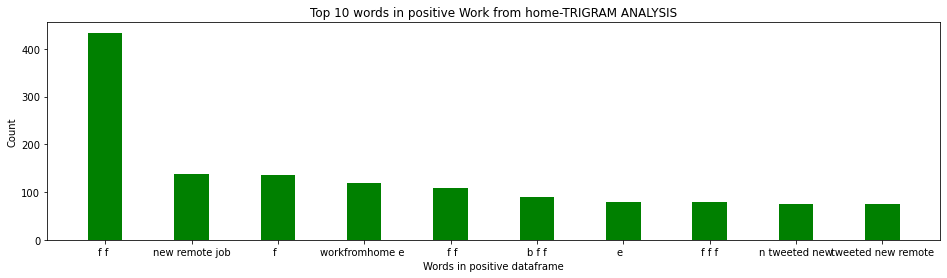

In [198]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive Work from home-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

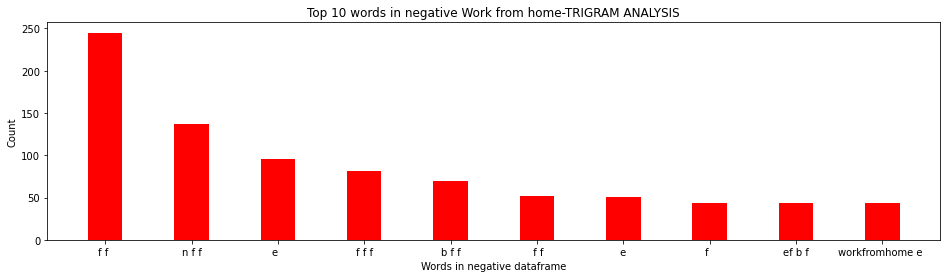

In [199]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative Work from home-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

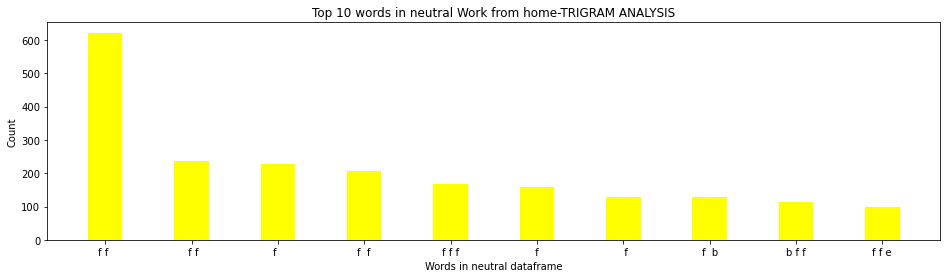

In [200]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral Work from home-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()